# Phase 4 Project.

# Table of Contents.
## 1. Business Problem Overview.
## 2. Proposed Solution.
## 3. Datasets Download Links.
## 4. Datasets EDA and Cleaning.
### &nbsp; 4.1. Traffic Crashes: `Crashes` Overview, EDA, Cleaning. 
### &nbsp; 4.2. Traffic Crashes: `Drivers` Overview, EDA, Cleaning. 
### &nbsp; 4.3. Traffic Crashes: `Vehicles` Overview, EDA, Cleaning.
### &nbsp; 4.4. Traffic Crashes: Merging `Drivers`, `Crashes`, `Vehicles`, EDA, Cleaning.
## 5. Data Transformation For Classification.
## 6. Modelling.
## 7. Results.
## 8. Conclusion.

## 1. Business Problem Overview.

Your task is to:

Build a model that can predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any interesting patterns.

## 2. Proposed Solution.

## 3. Datasets Download Links.

* [Traffic Crashes: Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data).
* [Traffic Crashes: People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data).
* [Traffic Ctashes: Vehicle](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data).

## 4. Datasets EDA and Cleaning.

In this section of the notebook we'll load the datasets and do a brief EDA.
We'll take a look at the datasets, we'll list columns and unique values for categorical columns. This would give us a better understanding of the datasets structures and amount of cleaning we might have to do for each set.

### Loading datasets. 

In [3]:
# importing modules
import pandas as pd
import numpy as np
import os

# Data directory
dir_data = './Data'

# filenames
data_crashes = 'Traffic_Crashes_-_Crashes_20240719.csv'
data_people = 'Traffic_Crashes_-_People_20240719.csv'
data_vehicles = 'Traffic_Crashes_-_Vehicles_20240719.csv'

# path to files
path_crashes = os.path.join(dir_data, data_crashes)
path_people = os.path.join(dir_data, data_people)
path_vehices = os.path.join(dir_data, data_vehicles)

# loading datasets
df_crashes = pd.read_csv(path_crashes, low_memory=False)
df_people = pd.read_csv(path_people, low_memory=False)
df_vehicles = pd.read_csv(path_vehices, low_memory=False)

#### Supplemental function to display unique categorical column values in a dataframe.

In [4]:
# function will display unique values for all categorical columns in a dataframe.
def display_categorical_vals(df):
    # select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # print categorical columns and their unique values
    for col in categorical_columns:
        unique_values = df[col].unique()
        print(f"Column '{col}' has unique values: {unique_values}")

## 4.1. Overview of Vehicle Crashes: Crashes. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [5]:
# view datasets
df_crashes.head()

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2           NO CONTROLS             CLEAR           DAYLIGHT   
3           NO CONTROLS             CLEAR           DAYLIGHT   
4           NO CONTROLS             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0              REAR END                            OTHER  ...   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
2          PEDALCYCLIST                      NOT DIVIDED  ...   
3            PEDESTRIAN                          ONE-WAY  ...   
4          FIXED OBJECT                            OTHER  ...   

   INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          1.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    1.0              0.0         12                 6   
1                    1.0              0.0         14                 7   
2                    1.0              0.0         17                 6   
3                    1.0              0.0          8                 3   
4                    1.0              0.0         10                 6   

  CRASH_MONTH   LATITUDE  LONGITUDE                                  LOCATION  
0           8        NaN        NaN                                       NaN  
1           7  41.854120 -87.665902  POINT (-87.665902342962 41.854120262952)  
2           8  41.942976 -87.761883  POINT (-87.761883496974 41.942975745006)  
3          11        NaN        NaN                                       NaN  
4           8        NaN        NaN                                       NaN  

[5 rows x 48 columns]

In [6]:
# print column names
df_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [7]:
# unique values for categorical columns.
display_categorical_vals(df_crashes)

Column 'CRASH_RECORD_ID' has unique values: ['6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345'
 '5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22'
 '61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934'
 ...
 '61c8dcd63fae60613bc9ec526fa901420cbe99a6d35840052c27bbd0cf1f8d6af74ff575276d3795f26878601232f6b9297b250a3499b62a96373e068134d21a'
 'bc2876dcd7c4098806301cb646232eb8f65c86a4f418b70f90391ab5dee6c889b5511da3e2c3666f19cc4e30df20e078ac9234cca189952b3dd18716dacaafd4'
 '6dee8823d4ae96624b741428681d19f50b5960418b6d790275e76ec34ee74f1b85ea13fab7248a863dc3761b4c1a7d96a18e6c8b1bd5777d665971ec3ab5598c']
Column 'CRASH_DATE_EST_I' has unique values: [nan 'Y' 'N']
Column 'CRASH_DATE' has unique values: ['08/18/2023 12:50:00 PM' '07/29/2023 02:45:00 PM'
 '08/18/2

#### Supplemental function displaying % `NaNs` for each column.

In [8]:
def display_df_nans(df_input):
# display % NaN for each column

    # calculate the percentage of NaN values for each column
    nan_percentage = df_input.isna().mean() * 100

    # create a new DataFrame with the column name and percentage of NaNs
    nan_df = pd.DataFrame({'Column Name': nan_percentage.index, '% NaN': nan_percentage.values})

    # sort the filtered DataFrame by '% NaN' in descending order
    nan_df_filtered = nan_df.sort_values(by='% NaN', ascending=False).reset_index(drop=True)

    # display the result
    print(nan_df_filtered)

In [9]:
# display NaNs for df_crashes
display_df_nans(df_crashes)

                      Column Name      % NaN
0               WORKERS_PRESENT_I  99.854605
1                       DOORING_I  99.688505
2                  WORK_ZONE_TYPE  99.562293
3                     WORK_ZONE_I  99.432923
4                  PHOTOS_TAKEN_I  98.657636
5              STATEMENTS_TAKEN_I  97.731457
6              NOT_RIGHT_OF_WAY_I  95.414488
7                CRASH_DATE_EST_I  92.559334
8          INTERSECTION_RELATED_I  77.075950
9                        LANE_CNT  76.721175
10                  HIT_AND_RUN_I  68.674597
11                    REPORT_TYPE   3.034121
12                       LOCATION   0.702764
13                      LONGITUDE   0.702764
14                       LATITUDE   0.702764
15             MOST_SEVERE_INJURY   0.220257
16                 INJURIES_TOTAL   0.218736
17                 INJURIES_FATAL   0.218736
18        INJURIES_INCAPACITATING   0.218736
19    INJURIES_NON_INCAPACITATING   0.218736
20  INJURIES_REPORTED_NOT_EVIDENT   0.218736
21        

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: Crashes` has 48 columns and 854910 data entries;
* The dataset has a primary key `CRASH_RECORD_ID`.
* The dataset has a target column `PRIM_CONTRIBUTORY_CAUSE` and a similar column `SEC_CONTRIBUTORY_CAUSE`.

* The dataset contains information about the road conditions, traffic devices, road type. 
* Ten columns contain mostly NaN values (>60%).

Let's investigate the values in `PRIM_CONTRIBUTORY_CAUSE` and `SEC_CONTRIBUTORY_CAUSE`. Learning about the contributory causes will help us decide what cilumns to keep and what coluns to drop.

### Overview of value distributions in  `PRIM_CONTRIBUTORY_CAUSE`.

In [10]:
# get the counts of unique values and sort them
cause_counts = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")    

UNABLE TO DETERMINE: 333286
FAILING TO YIELD RIGHT-OF-WAY: 94094
FOLLOWING TOO CLOSELY: 82805
NOT APPLICABLE: 45362
IMPROPER OVERTAKING/PASSING: 42405
FAILING TO REDUCE SPEED TO AVOID CRASH: 35991
IMPROPER BACKING: 33397
IMPROPER LANE USAGE: 30556
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 28879
IMPROPER TURNING/NO SIGNAL: 28518
DISREGARDING TRAFFIC SIGNALS: 16722
WEATHER: 12643
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 10844
DISREGARDING STOP SIGN: 9221
DISTRACTION - FROM INSIDE VEHICLE: 5827
EQUIPMENT - VEHICLE CONDITION: 5298
PHYSICAL CONDITION OF DRIVER: 5049
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 4845
DRIVING ON WRONG SIDE/WRONG WAY: 4608
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED): 3992
DISTRACTION - FROM OUTSIDE VEHICLE: 3465
ROAD ENGINEERING/SURFACE/MARKING DEFECTS: 2070
EXCEEDING AUTHORIZED SPEED LIMIT: 1982
DISREGARDING OTHER TRAFFIC SIGNS: 1843
ROAD CONSTRUCTION/MAINTENANCE: 1810
EXCEEDING SAFE SPEED FOR

### Overview of value distributions in  `SEC_CONTRIBUTORY_CAUSE`.

In [11]:
# get the counts of unique values and sort them
cause_counts = df_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")

NOT APPLICABLE: 351974
UNABLE TO DETERMINE: 308480
FAILING TO REDUCE SPEED TO AVOID CRASH: 31664
FAILING TO YIELD RIGHT-OF-WAY: 27120
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 26362
FOLLOWING TOO CLOSELY: 22514
IMPROPER OVERTAKING/PASSING: 13217
IMPROPER LANE USAGE: 12054
WEATHER: 9666
IMPROPER TURNING/NO SIGNAL: 8802
IMPROPER BACKING: 6839
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 5342
DISREGARDING TRAFFIC SIGNALS: 3477
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 2660
PHYSICAL CONDITION OF DRIVER: 2592
DISTRACTION - FROM INSIDE VEHICLE: 2561
DISREGARDING STOP SIGN: 2494
DRIVING ON WRONG SIDE/WRONG WAY: 1785
EQUIPMENT - VEHICLE CONDITION: 1733
EXCEEDING AUTHORIZED SPEED LIMIT: 1473
EXCEEDING SAFE SPEED FOR CONDITIONS: 1438
DISTRACTION - FROM OUTSIDE VEHICLE: 1409
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED): 1386
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE): 1025
ROAD CONSTRUCTION/MAINTENANCE: 992
DISREGARDING OTHER 

### Overview of value distributions in  `SEC_CONTRIBUTORY_CAUSE` when `PRIM_CONTRIBUTORY_CAUSE` is either unknown or undetermined.

In [12]:
df_crashes_undetermined = \
df_crashes[df_crashes['PRIM_CONTRIBUTORY_CAUSE'].isin(['UNABLE TO DETERMINE', 'NOT APPLICABLE'])]

# get the counts of unique values and sort them
cause_counts = df_crashes_undetermined['SEC_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")

UNABLE TO DETERMINE: 198516
NOT APPLICABLE: 170666
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 1844
FAILING TO REDUCE SPEED TO AVOID CRASH: 1069
WEATHER: 890
FAILING TO YIELD RIGHT-OF-WAY: 753
FOLLOWING TOO CLOSELY: 728
IMPROPER LANE USAGE: 715
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE): 374
PHYSICAL CONDITION OF DRIVER: 371
IMPROPER OVERTAKING/PASSING: 360
IMPROPER BACKING: 354
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 230
IMPROPER TURNING/NO SIGNAL: 216
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 158
EQUIPMENT - VEHICLE CONDITION: 138
DISTRACTION - FROM INSIDE VEHICLE: 106
DISREGARDING TRAFFIC SIGNALS: 106
RELATED TO BUS STOP: 97
ROAD CONSTRUCTION/MAINTENANCE: 88
BICYCLE ADVANCING LEGALLY ON RED LIGHT: 88
ANIMAL: 82
DRIVING ON WRONG SIDE/WRONG WAY: 77
DISTRACTION - FROM OUTSIDE VEHICLE: 77
DISREGARDING STOP SIGN: 76
EXCEEDING AUTHORIZED SPEED LIMIT: 69
ROAD ENGINEERING/SURFACE/MARKING DEFECTS: 59
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (US

#### Takeaways on `PRIM_CONTRIBUTORY_CAUSE`, `SEC_CONTRIBUTORY_CAUSE`.

* Over 77% (~661000) of target column `PRIM_CONTRIBUTORY_CAUSE` has either undetermined/unknown values.
* When `PRIM_CONTRIBUTORY_CAUSE` is unknown on undetermined, more than half of values in  `SEC_CONTRIBUTORY_CAUSE` are unknown/undetermined as well, meaning that we cannot add/substitute it.

If we attemnpt to group together similar `PRIM_CONTRIBUTORY_CAUSE`, then we should be able to select other relevant columns from the `df_crashes`.

| Contributing Factors                         | Primary Cause                                                                                                               | Relevant Columns                                                    |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| Speed-related, weather condition-related:    | FAILING TO REDUCE SPEED TO AVOID CRASH, EXCEEDING AUTHORIZED SPEED LIMIT, EXCEEDING SAFE SPEED FOR CONDITIONS                 | POSTED_SPEED_LIMIT, 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH' |
| Weather-related, vision-related              | WEATHER, VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                                                | 'WEATHER_CONDITION', 'LIGHTING_CONDITION'                           |
| Disregarding traffic signs or road markings  | DISREGARDING STOP SIGN, DISREGARDING TRAFFIC SIGNALS, DISREGARDING OTHER TRAFFIC SIGNS, DISREGARDING ROAD MARKINGS, DISREGARDING YIELD SIGN | "INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I'"                      |
| Improper vehicle operation                   | IMPROPER OVERTAKING/PASSING, IMPROPER LANE USAGE, IMPROPER TURNING/NO SIGNAL, IMPROPER BACKING, TURNING RIGHT ON RED, OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, DRIVING ON WRONG SIDE/WRONG WAY, FOLLOWING TOO CLOSELY, RELATED TO BUS STOP, BICYCLE ADVANCING LEGALLY ON RED LIGHT, FAILING TO YIELD RIGHT-OF-WAY | 'NOT_RIGHT_OF_WAY_I', POSTED_SPEED_LIMIT, 'FIRST_CRASH_TYPE', CRASH_TYPE' |
| Driving experience                           | DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                                                          |                                                                     |
| Distraction Outside                          | DISTRACTION - FROM OUTSIDE VEHICLE, EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, ANIMAL                                 |                                                                     |
| Distraction Inside                           | DISTRACTION - FROM INSIDE VEHICLE, CELL PHONE USE OTHER THAN TEXTING, DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.) |                                                                     |
| Physical condition of Driver (or DUI)        | PHYSICAL CONDITION OF DRIVER, UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED), HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE) |                                                                     |
| Vehicle malfunction                          | EQUIPMENT - VEHICLE CONDITION                                                                                                |                                                                     |
| Road malfunction                             | ROAD CONSTRUCTION/MAINTENANCE, ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                                      | "WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT'" |


### Next steps: perform EDA on `df_crashes` to determine best filtering options.

* We're challenged with the overall amount of undetermined\unapplicable crash causes. Approximately ~650.000 entries have undetermined\unapplicable `PRIM_CONTRIBUTORY_CAUSE`, and about half of those entries also have undetermined\unapplicable `SEC_CONTRIBUTORY_CAUSE`. If we were to filter ou all crashes without a cause, we would lose over 40% of the data.

* We would want to retain the entries where crash causes were undetermined/na, because they are valid options. 

### Crashes EDA: Visualizing Primary Cause Determination by Injury Severity and Damages.

* We won't be able to build a model that would correctly predict the primary cause for every possible crash with over half of primary causes being unknown. 
* Crashes with severe and fatal injuries have the most devastating impact, from emotional toll to the lives being lost, to severely impacted traffic flow and the greater use of system resources.
* Serious crashes prompt detailed investigation.
* Crashes with damages over $1000 more likely to involve multiple vehicles and require LEO presence and towing.


In [13]:
# Grouping primary causes into 3 general categories: Determined, Unable to Determine, Not Applicable.
# group 'PRIM_CONTRIBUTORY_CAUSE' into three categories: 'Unable to Determine', 'Not Applicable', and 'Determined'
df_crashes['CAUSE_GROUP'] = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'Unable to Determine' \
                                                                        if x == 'UNABLE TO DETERMINE' else \
                                                                        'Not Applicable' if x == 'NOT APPLICABLE' else \
                                                                        'Determined')


### Defining count plot function for df_crashes.

This function will display a countplot of values `X` groupped by values `Y` (if present) in pallete `set_palette`.

In [14]:
# supplimental plotting function displaying various distribution of damages and injuries in df_crashes

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


def countplot_df_crashes(df_crashes, X, Y=None, set_palette='bone'):
    # create the plot figure and axes
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # check if Y is provided, and adjust the count plot accordingly
    if Y is not None:
        sns.countplot(data=df_crashes, x=X, hue=Y, palette=set_palette, ax=ax)
        ax.set_title(f'Distribution by {Y}', fontsize=30)
        ax.legend(loc='upper right', fontsize=20)  # legend top right corner
    else:
        sns.countplot(data=df_crashes, x=X, palette=set_palette, ax=ax)
        ax.set_title(f'Distribution of {X}', fontsize=30)
    
    # axis fonts and size plot elements
    ax.set_xlabel(X, fontsize=25, fontstyle='italic')
    ax.set_ylabel('Count (Thousands)', fontsize=25, fontstyle='italic')
    
    # format Y-axis to show values in thousands (10^3)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    
    # set ticks to be in italic
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=20, fontstyle='italic')
    plt.setp(ax.get_yticklabels(), fontsize=20, fontstyle='italic')

    # add count numbers on top of bars formatted in thousands (x.xK)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()/1000:.1f}K',  # format in thousands and add "K"
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=17, color='black', xytext=(0, 5), 
                    textcoords='offset points', rotation=60)
    # adjust layout without showing the plot
    plt.tight_layout()

    # return figure and axes objects for further modification
    return fig, ax

### Crashed EDA: Exploring Damages, Injuries.

We'll look into how Damages, Injuries, and Primary Contributory Causes relate to eachother.

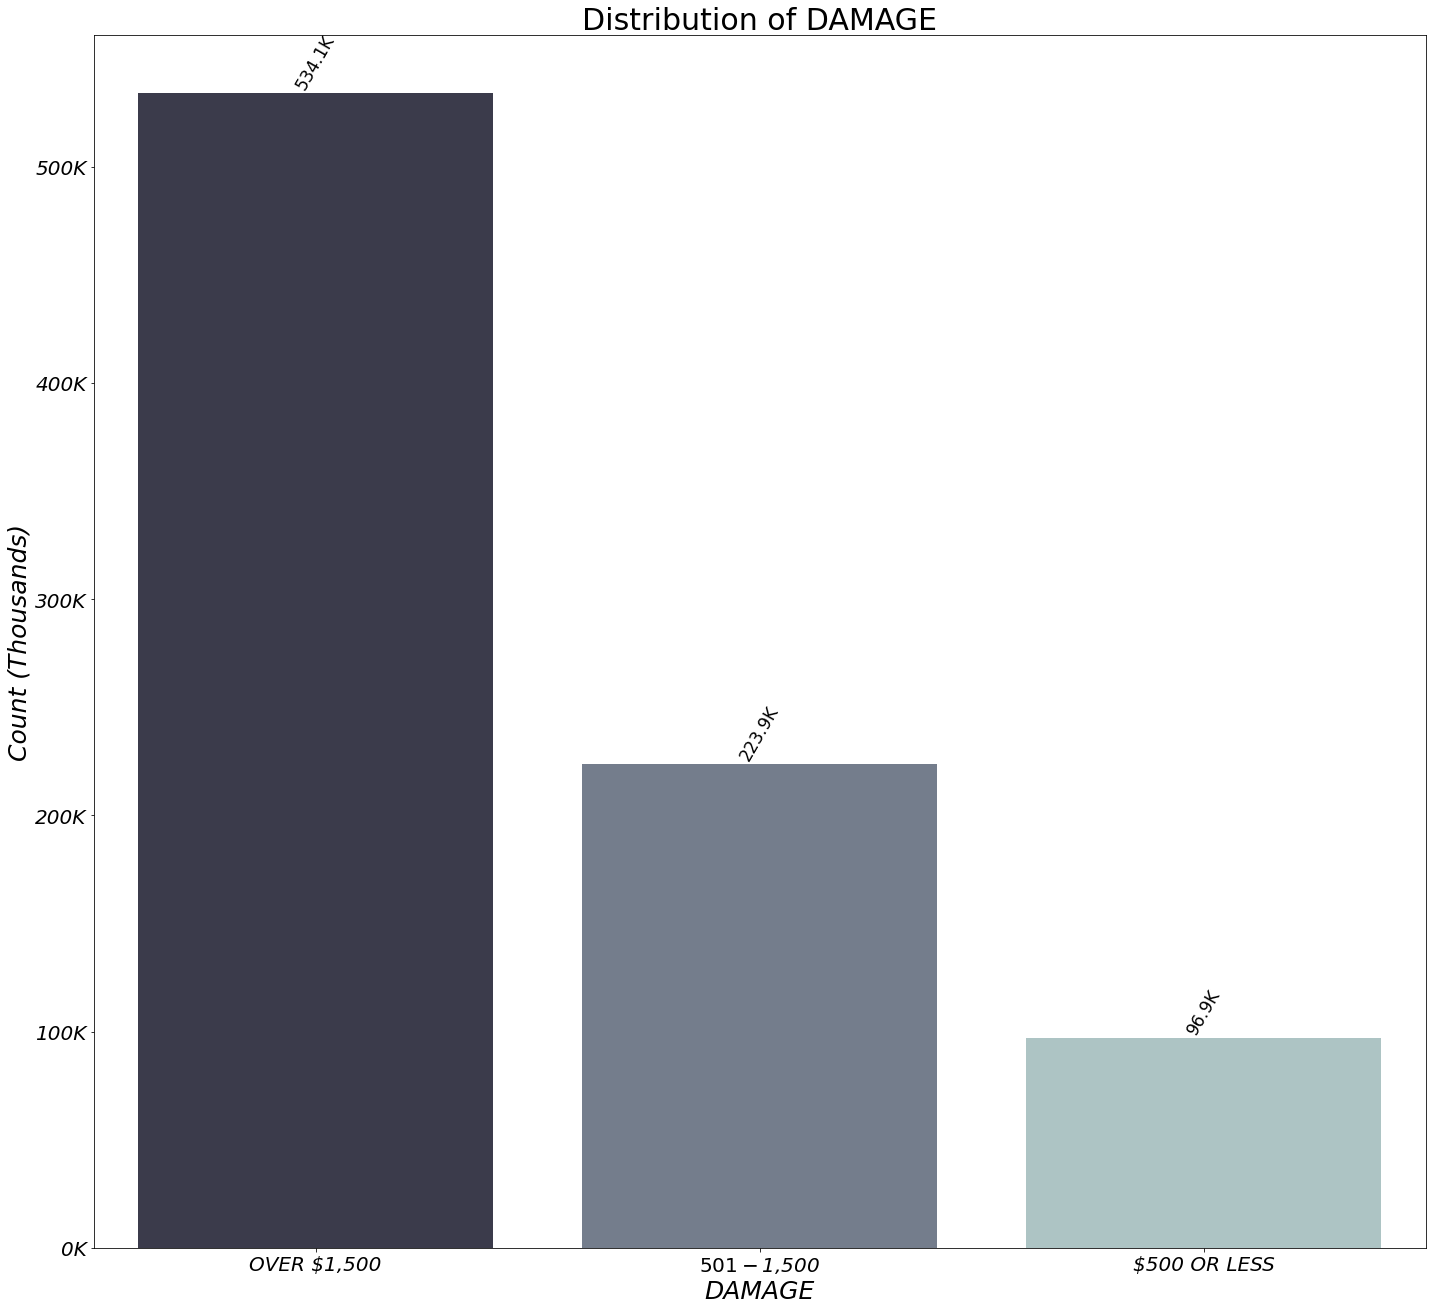

In [15]:
# count plot for 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'DAMAGE')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

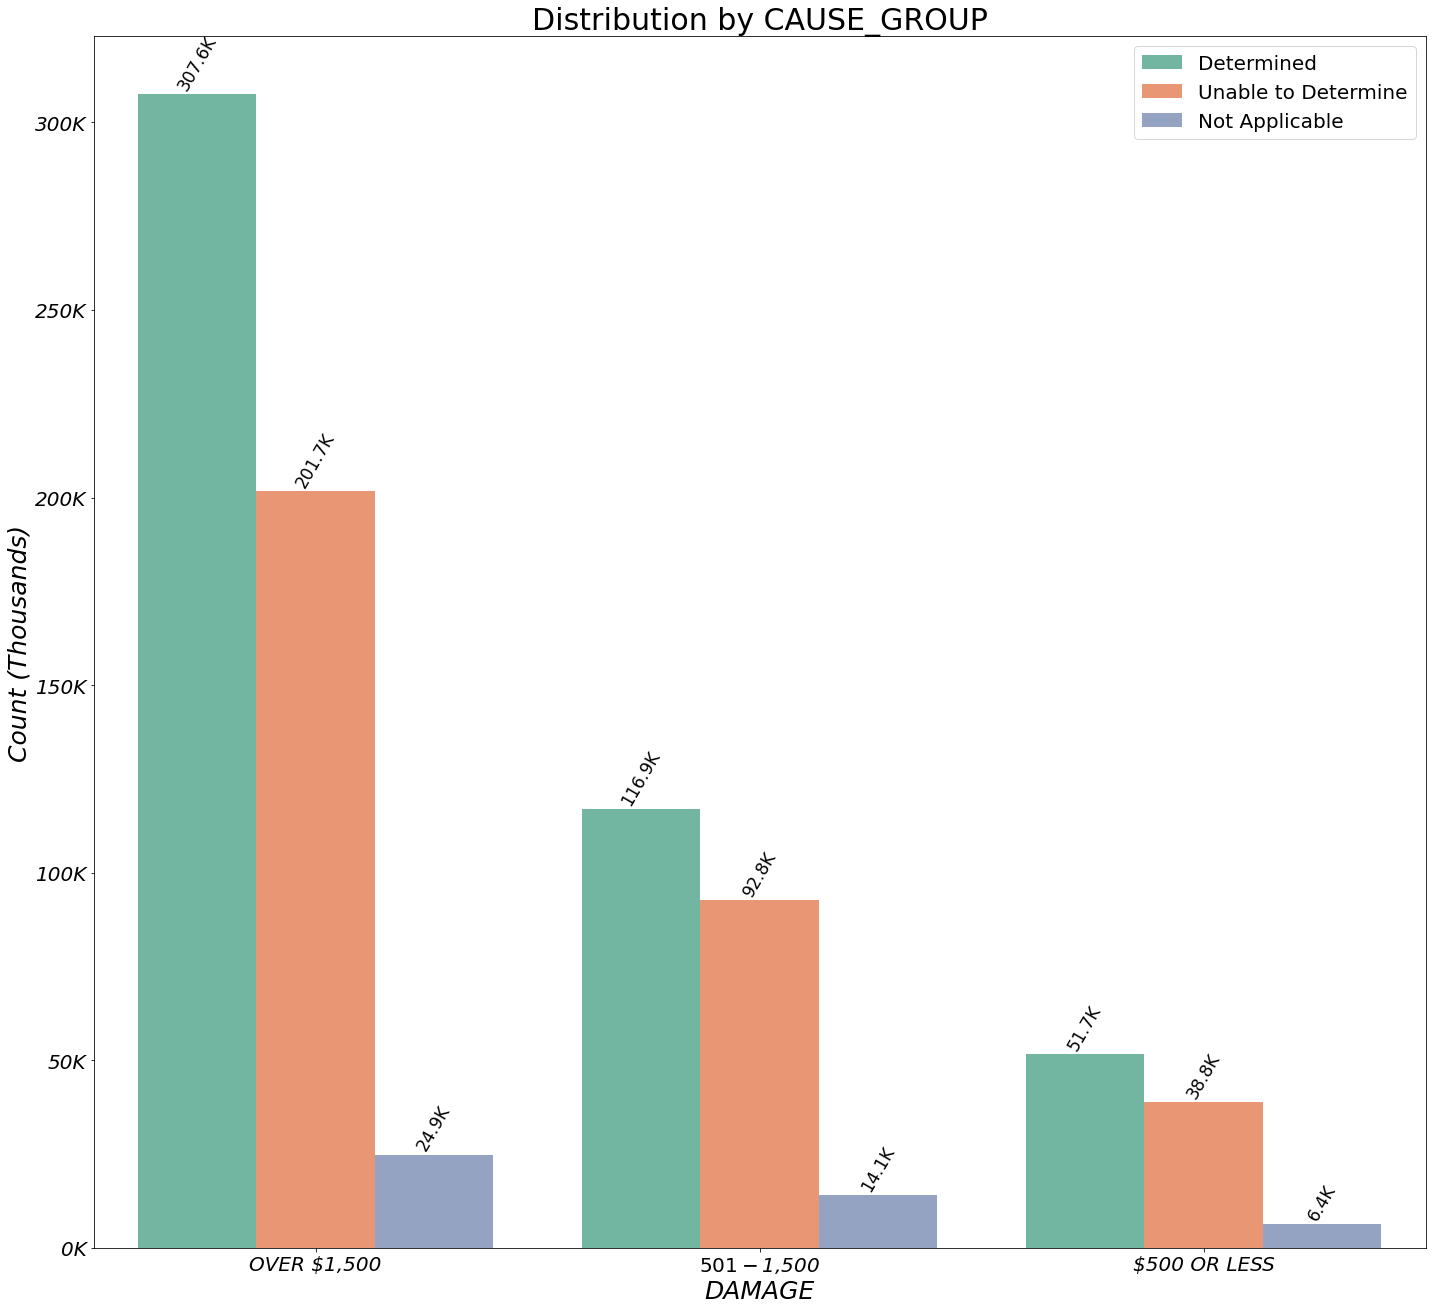

In [16]:
# count plot for 'DAMAGES' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'DAMAGE', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

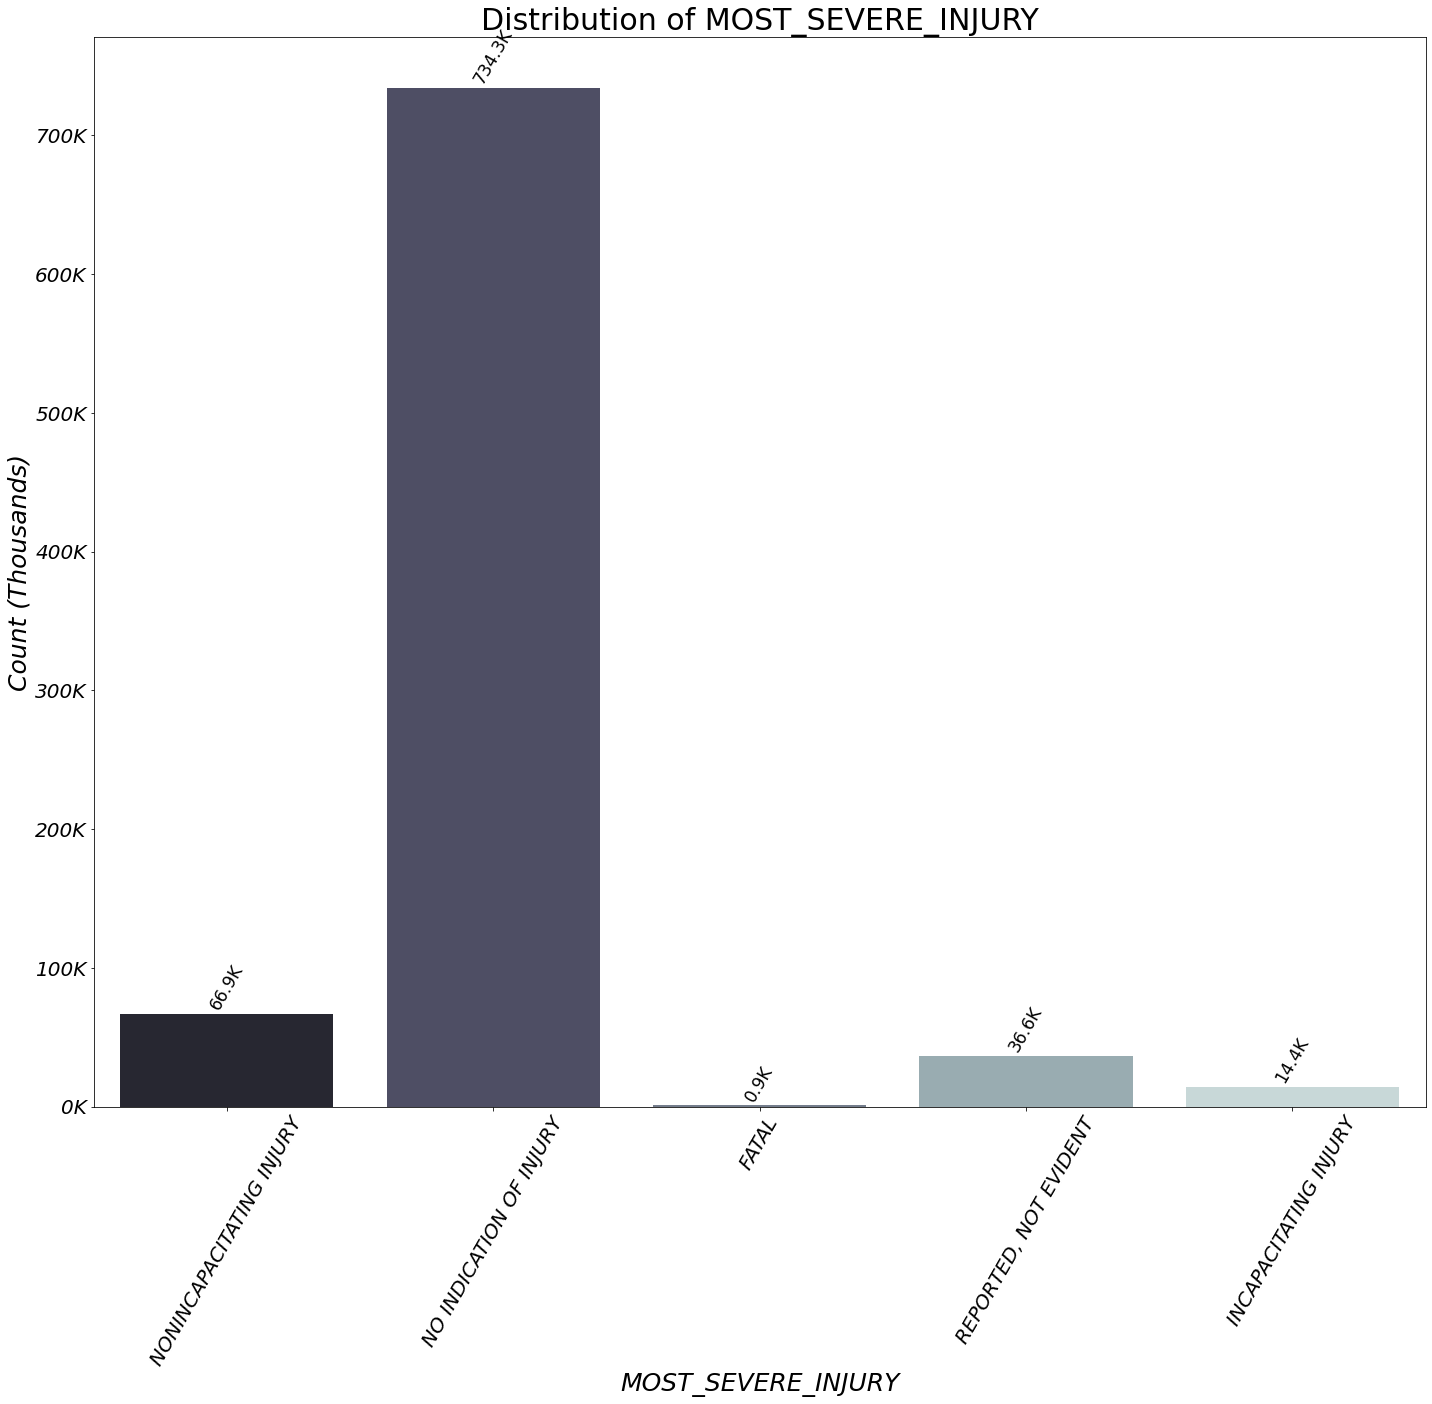

In [17]:
# count plot for 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'MOST_SEVERE_INJURY')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

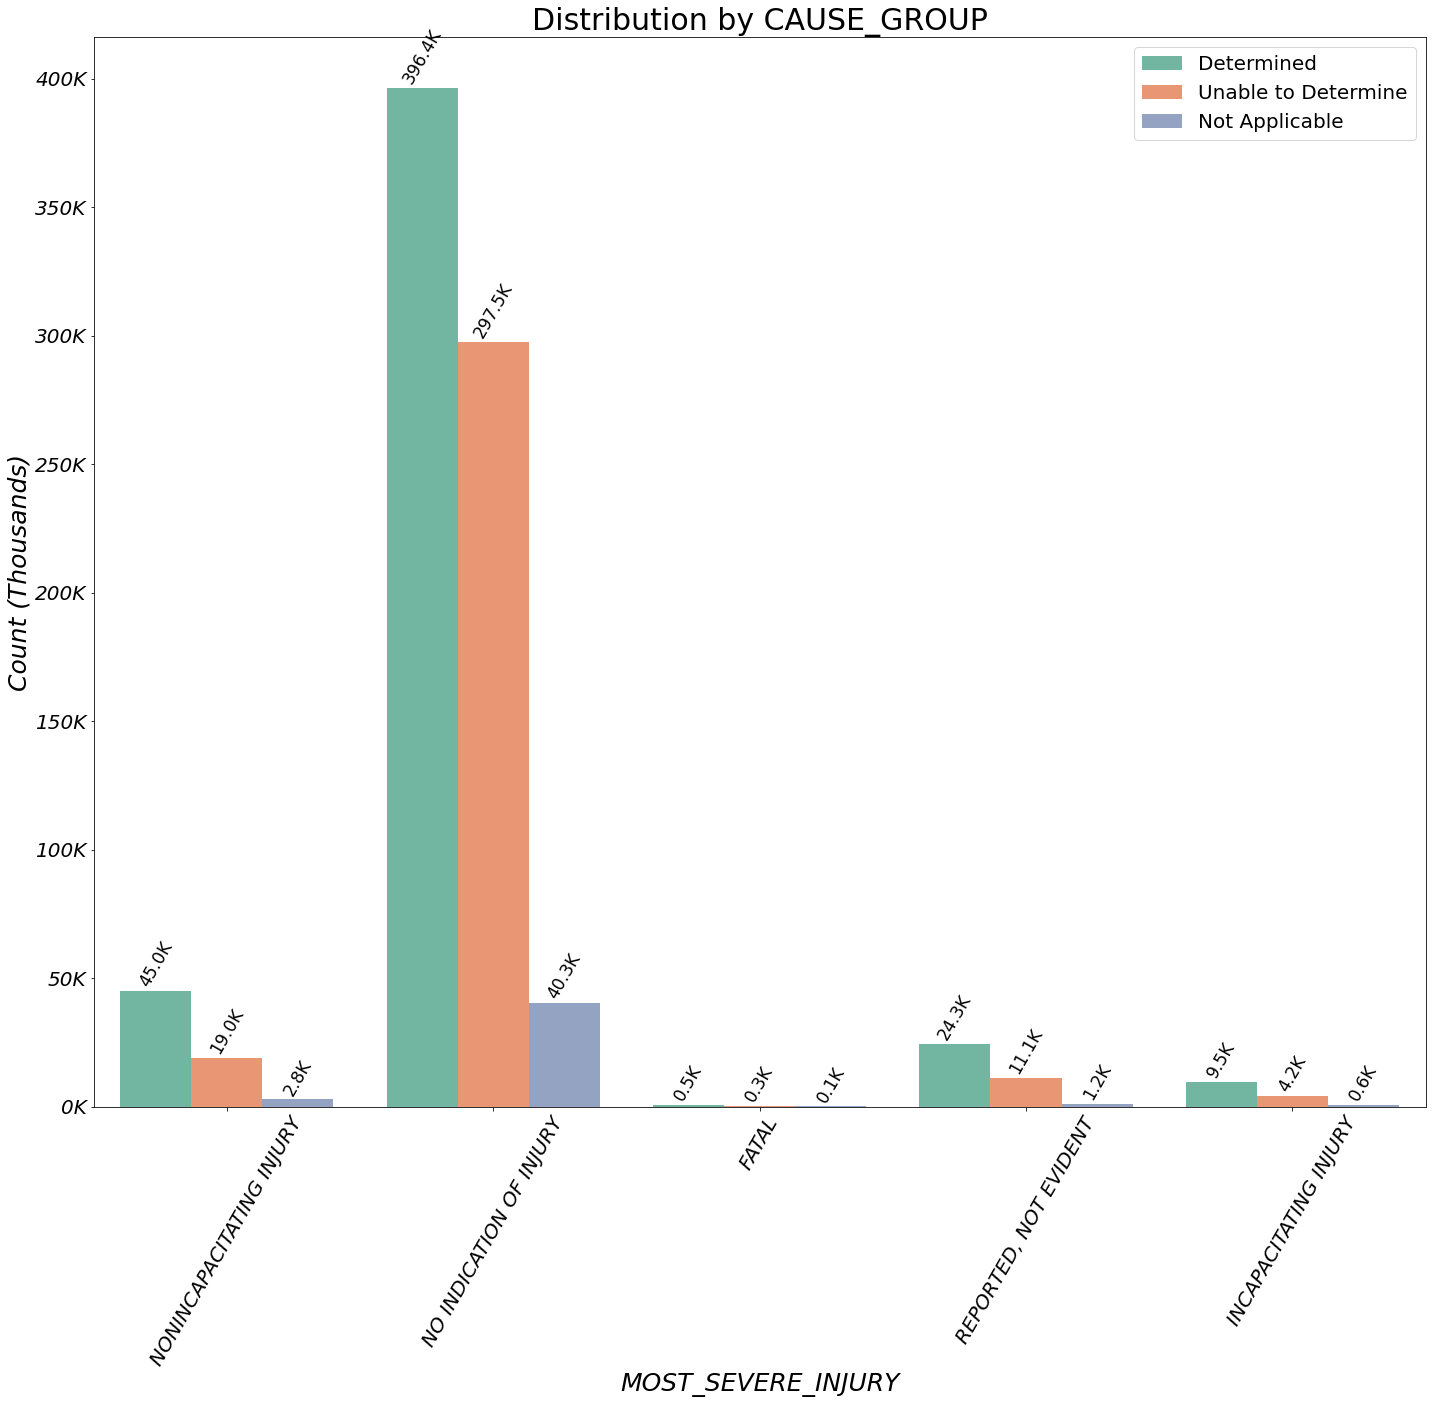

In [18]:
# count plot for MOST_SEVERE_INJURY by CAUSE_GROUP
fig, ax = countplot_df_crashes(df_crashes, 'MOST_SEVERE_INJURY', 'CAUSE_GROUP', 'Set2')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages.

* The majority of crashes have extensive damages (530k).
* The overwhelming majority of crashes have no injuries (730k).
* Crashes with extensive damages have better (2:1) Determined vs Undetermined cause ratio, whereas the lower damages have close to 1:1 ratio.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Posted Speed Limit.

Let's take a look at what are the logged speed limits.

In [19]:
(df_crashes['POSTED_SPEED_LIMIT']).value_counts()

30    629419
35     56933
25     54441
20     35617
15     30448
10     20020
40      8165
0       7507
45      5677
5       4811
55       847
50       260
3        211
9         96
39        88
99        66
60        50
1         41
24        38
2         29
32        19
65        18
34        16
33        13
11        11
26         9
36         8
6          7
70         6
7          5
22         4
18         4
14         4
12         3
29         3
4          2
31         2
23         2
38         2
8          2
62         1
63         1
46         1
44         1
16         1
49         1
Name: POSTED_SPEED_LIMIT, dtype: int64

Since the location is US, most common speed limits would be:

* 20 mph for School, Park, Business/Downtown.
* 25 mph for Residential.
* 30 - 35 mph for Urban.
* 40, 45, 50, 55mph for Expressway.
* 60, 65, 70 mph for Highway.

Although most of these numbers are present, we can also see some bogus entries (1-14) perhaps indicating the speed limit code, 99 indicating no entry, 0 indicating stationary vehicle.

#### Apply mapping to values in 1-14 range and filter out remaining.  

In [20]:
# define the mapping of report codes to speed limits (only values from 1 to 14)
speed_limit_mapping = {
    0: 0,
    1: 5,
    2: 10,
    3: 15,
    4: 20,
    5: 25,
    6: 30,
    7: 35,
    8: 40,
    9: 45,
    10: 50,
    11: 55,
    12: 60,
    13: 65,
    14: 70
}

# apply the mapping only to values in the range 1-14
df_crashes['posted_speed_limit_(mph)'] = df_crashes['POSTED_SPEED_LIMIT'].apply(
    lambda x: speed_limit_mapping[x] if x in speed_limit_mapping else x)

# filter out rows where 'Posted Speed Limit (mph)' is not in the speed limit mapping values
# convert mapping values to a set for faster lookup
valid_speed_limits = set(speed_limit_mapping.values())  

df_filtered = df_crashes[df_crashes['posted_speed_limit_(mph)'].isin(valid_speed_limits)]

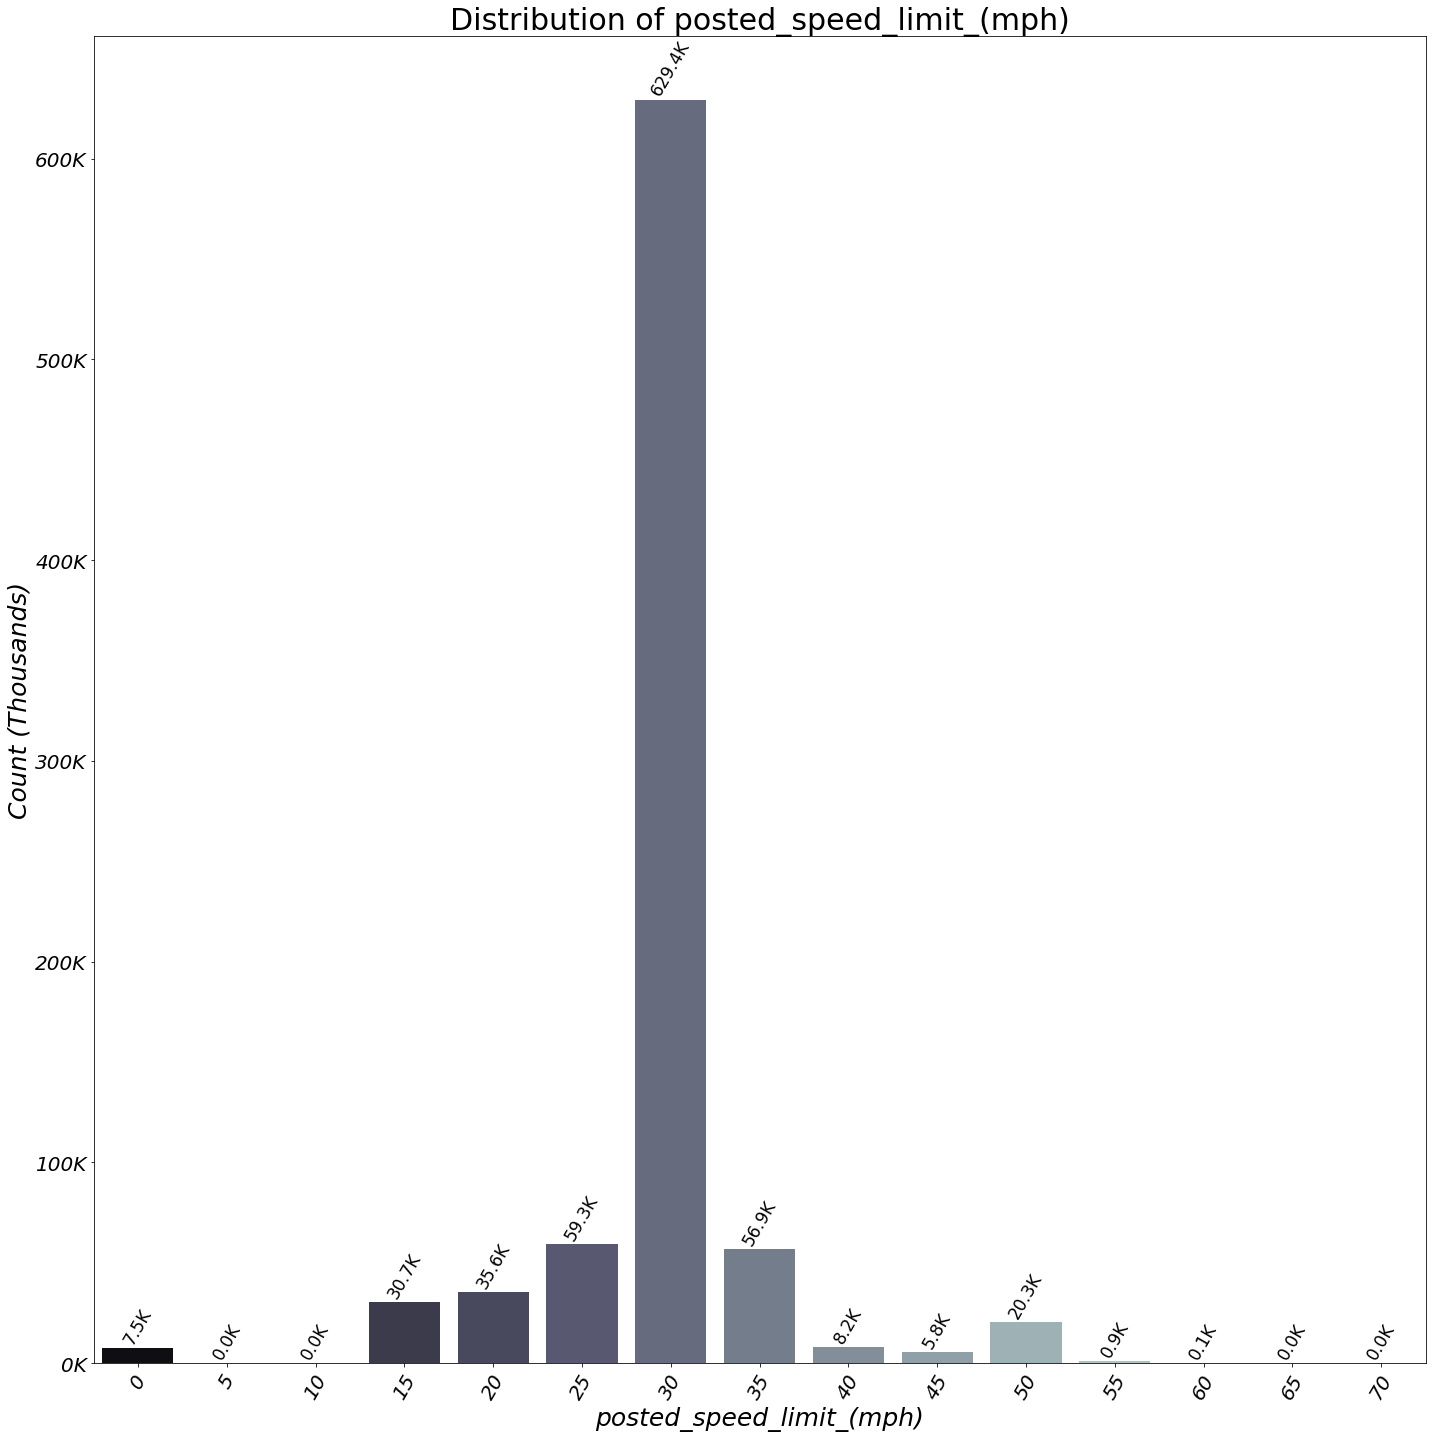

In [21]:
# count plot for 'posted_speed_limit_(mph)'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

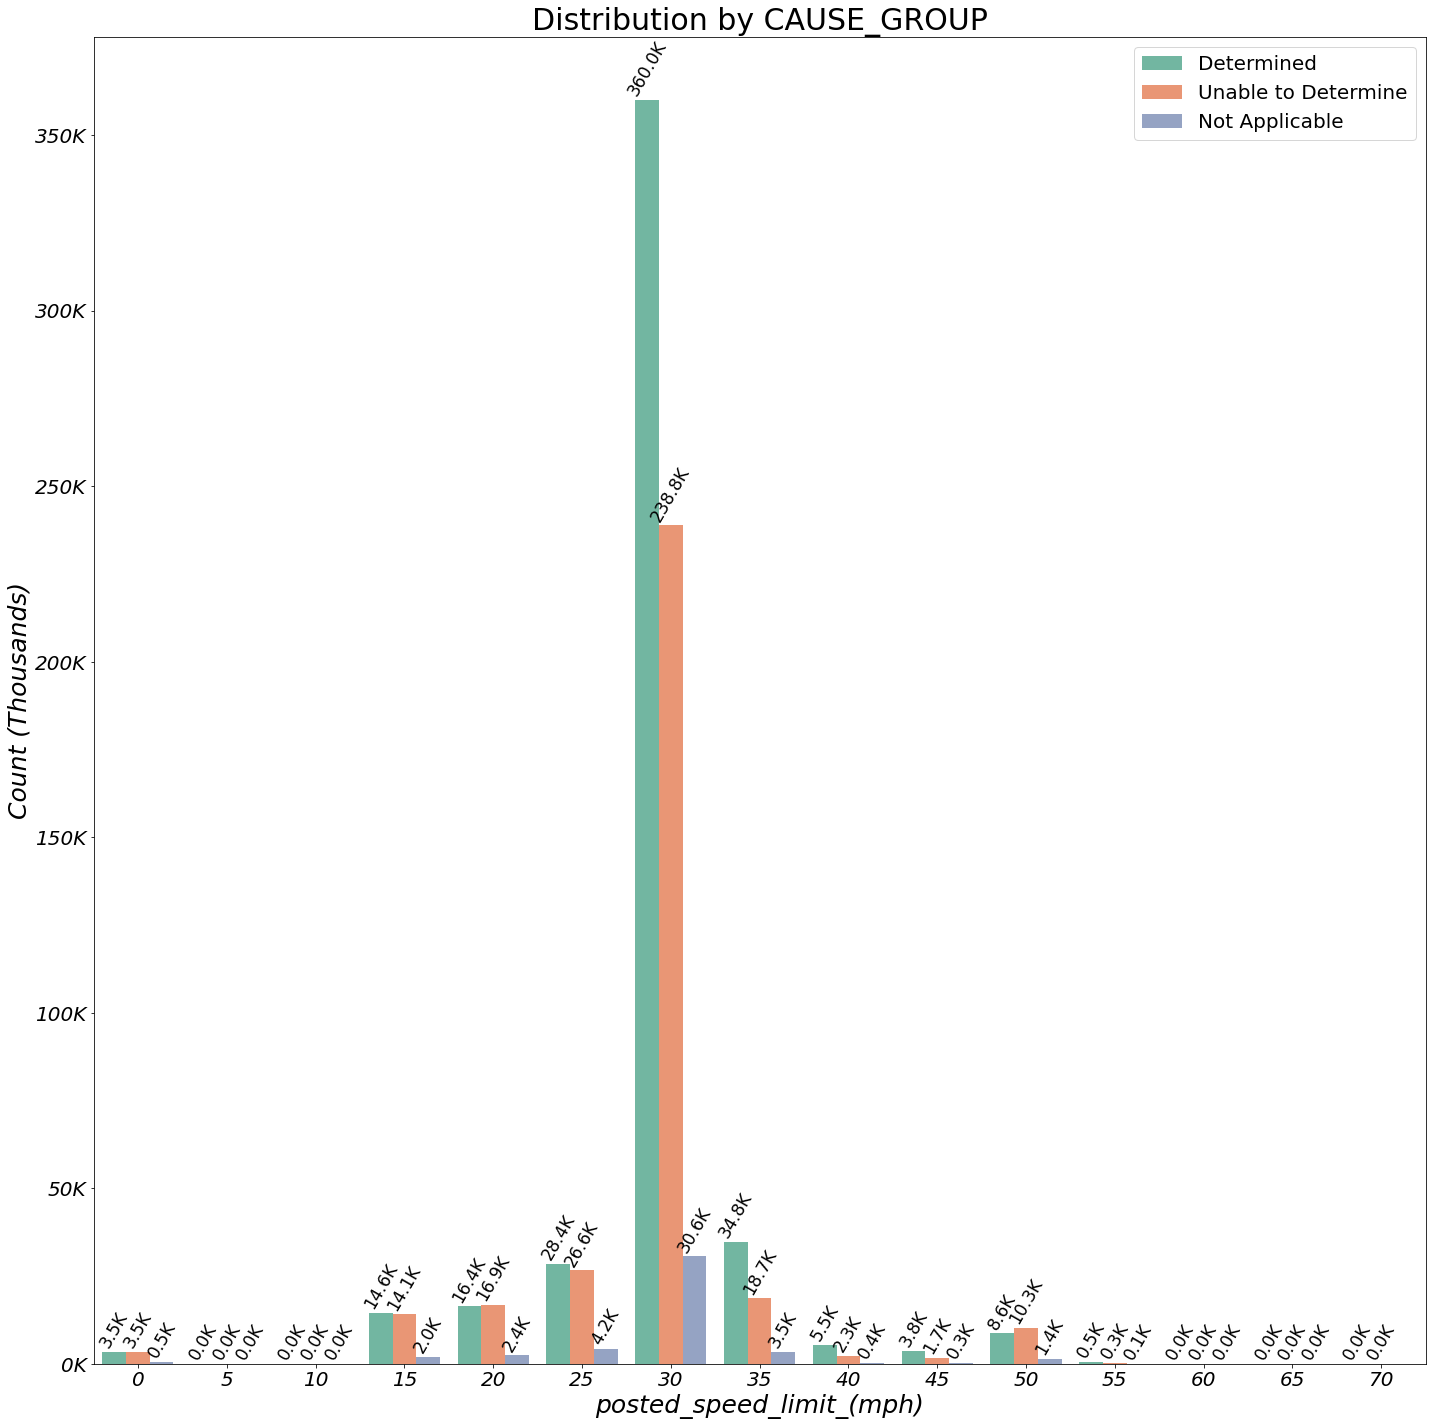

In [22]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'CAUSE_GROUP', 'Set2')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

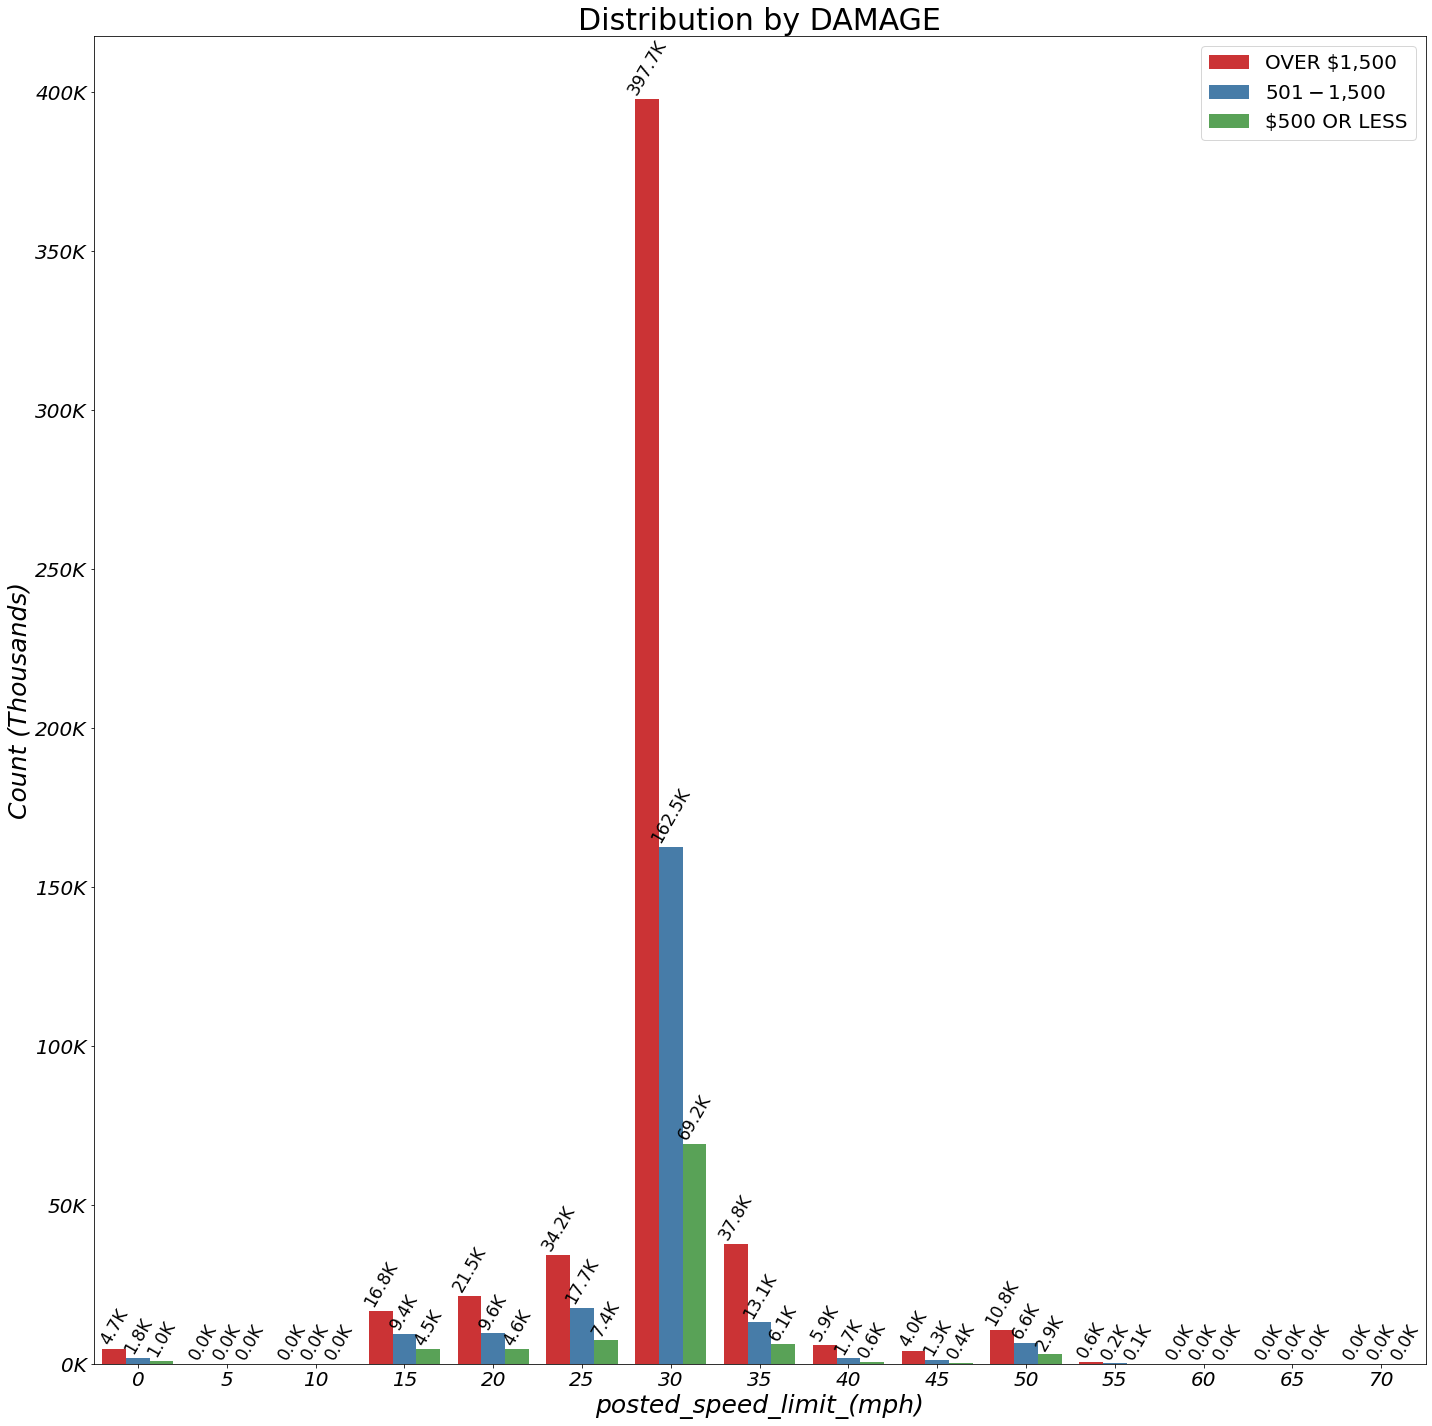

In [23]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'DAMAGE', 'Set1')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

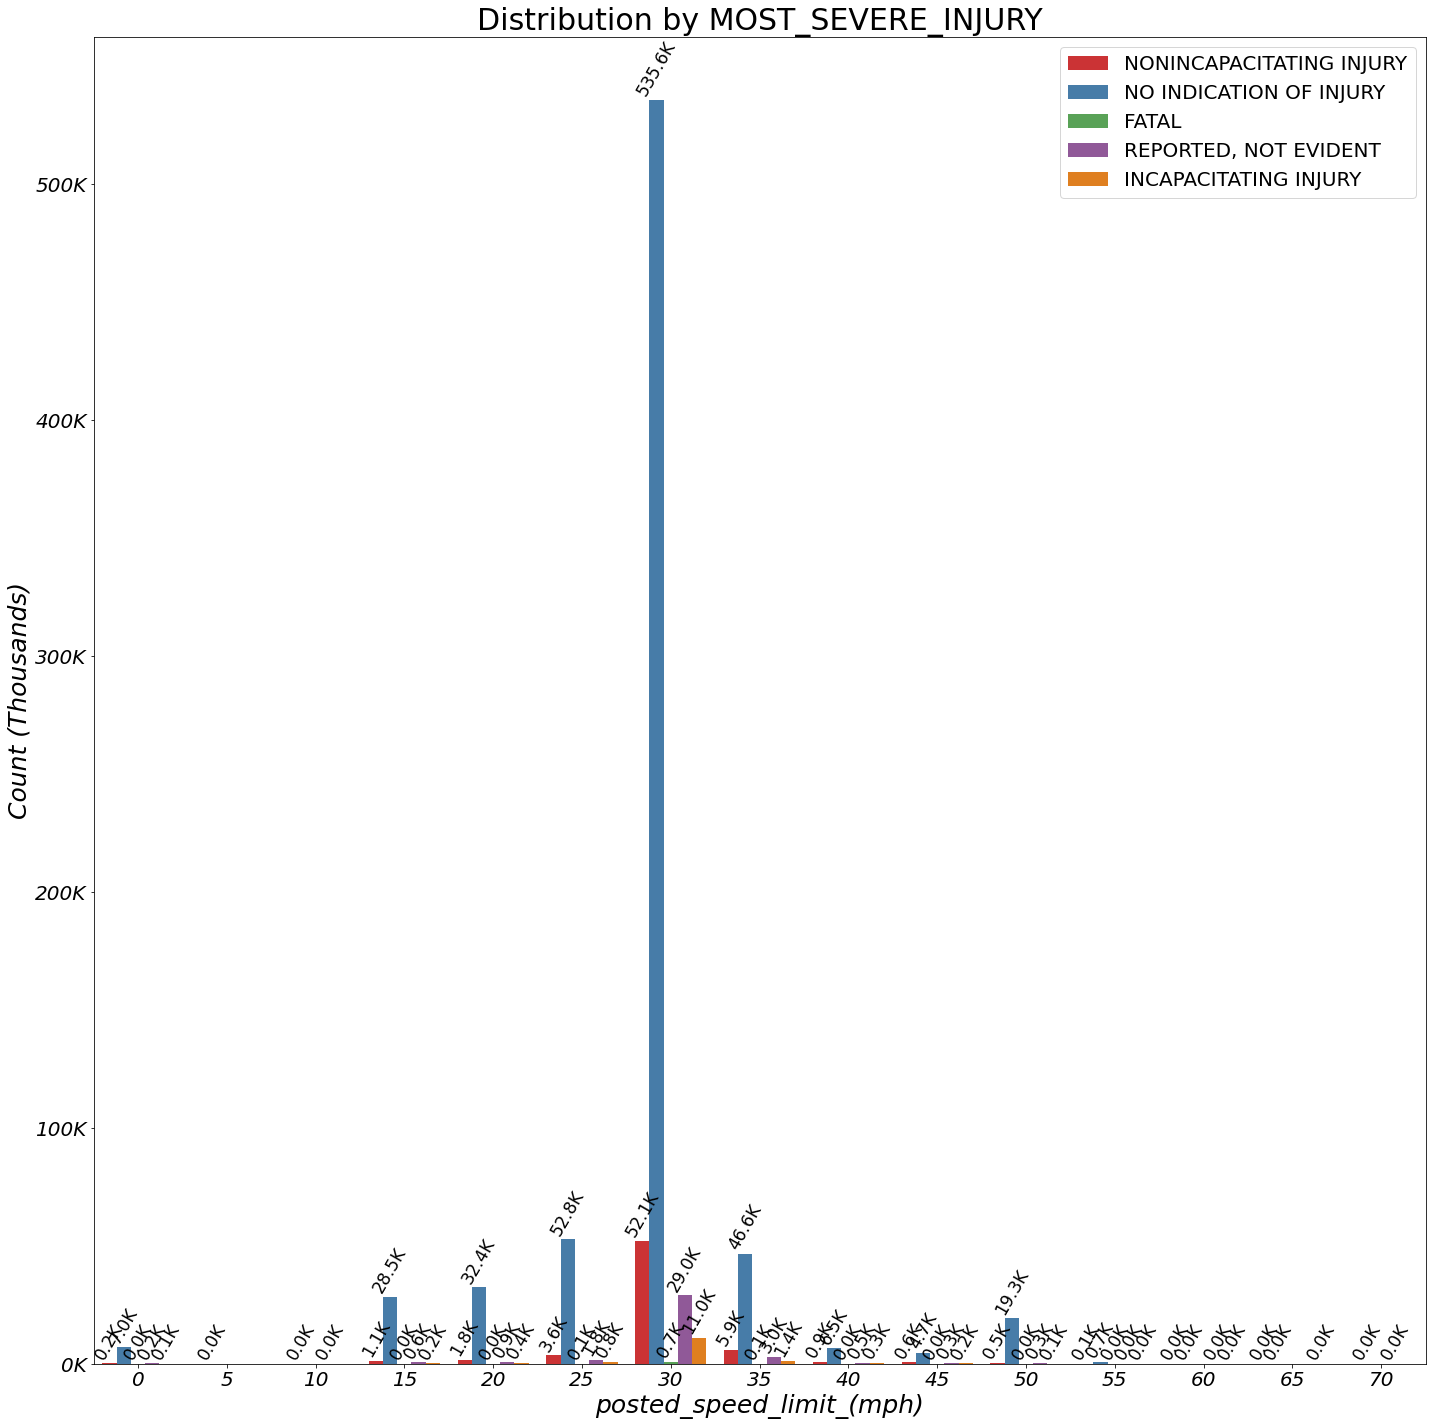

In [24]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages vs Speed Limit.

* Majority of crashes occurs in 25-35 mph speed limit.
* Crashes in 30-35 mph zone have the best Determined:Undetermined ratio.
* Crashes in 30-35 mph zonehave the most damage.

### Crashes EDA: Visualizing Primary Cause Determination by Injury Severity, Damages and Weather Condition.

In [25]:
(df_crashes['WEATHER_CONDITION']).value_counts()

CLEAR                       670917
RAIN                         75097
UNKNOWN                      47956
SNOW                         28397
CLOUDY/OVERCAST              25174
OTHER                         2681
FREEZING RAIN/DRIZZLE         1728
FOG/SMOKE/HAZE                1346
SLEET/HAIL                    1010
BLOWING SNOW                   444
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: WEATHER_CONDITION, dtype: int64

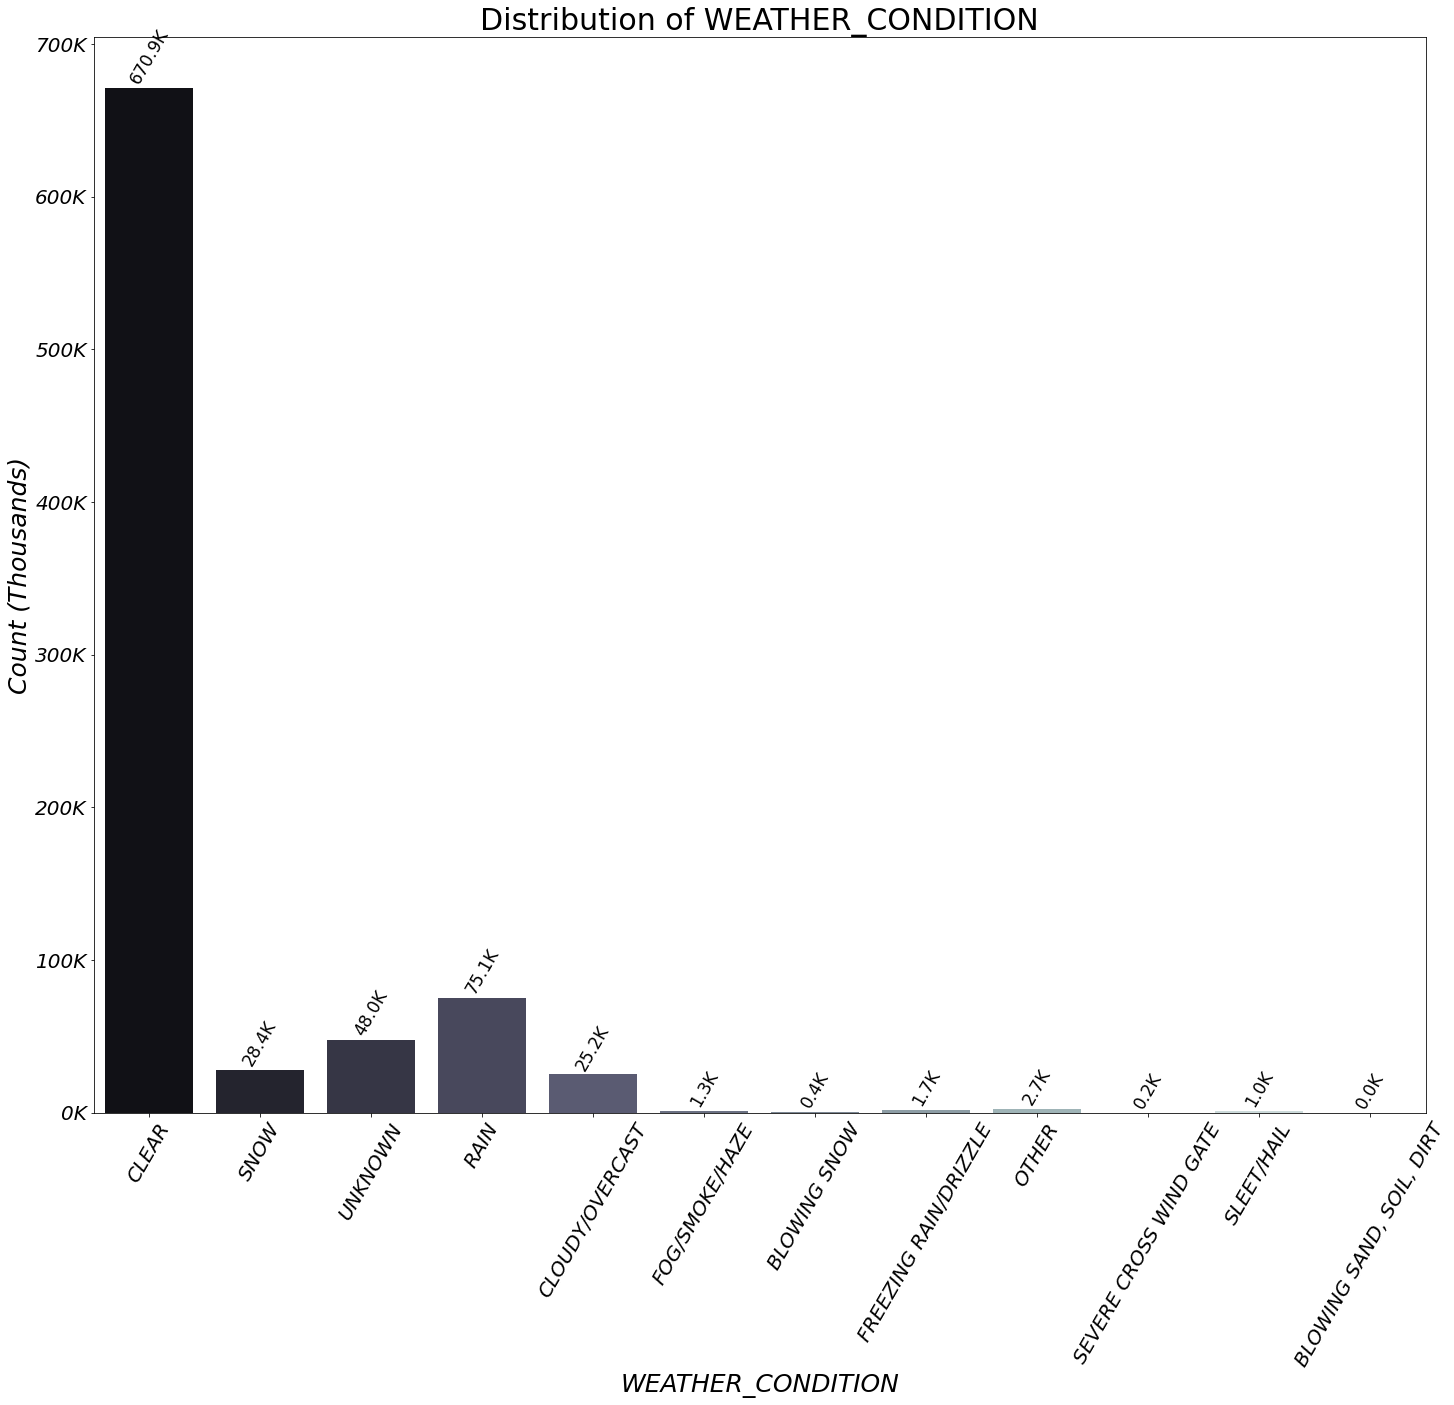

In [26]:
# count plot for 'WEATHER_CONDITION'
fig, ax = countplot_df_crashes(df_crashes, 'WEATHER_CONDITION')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

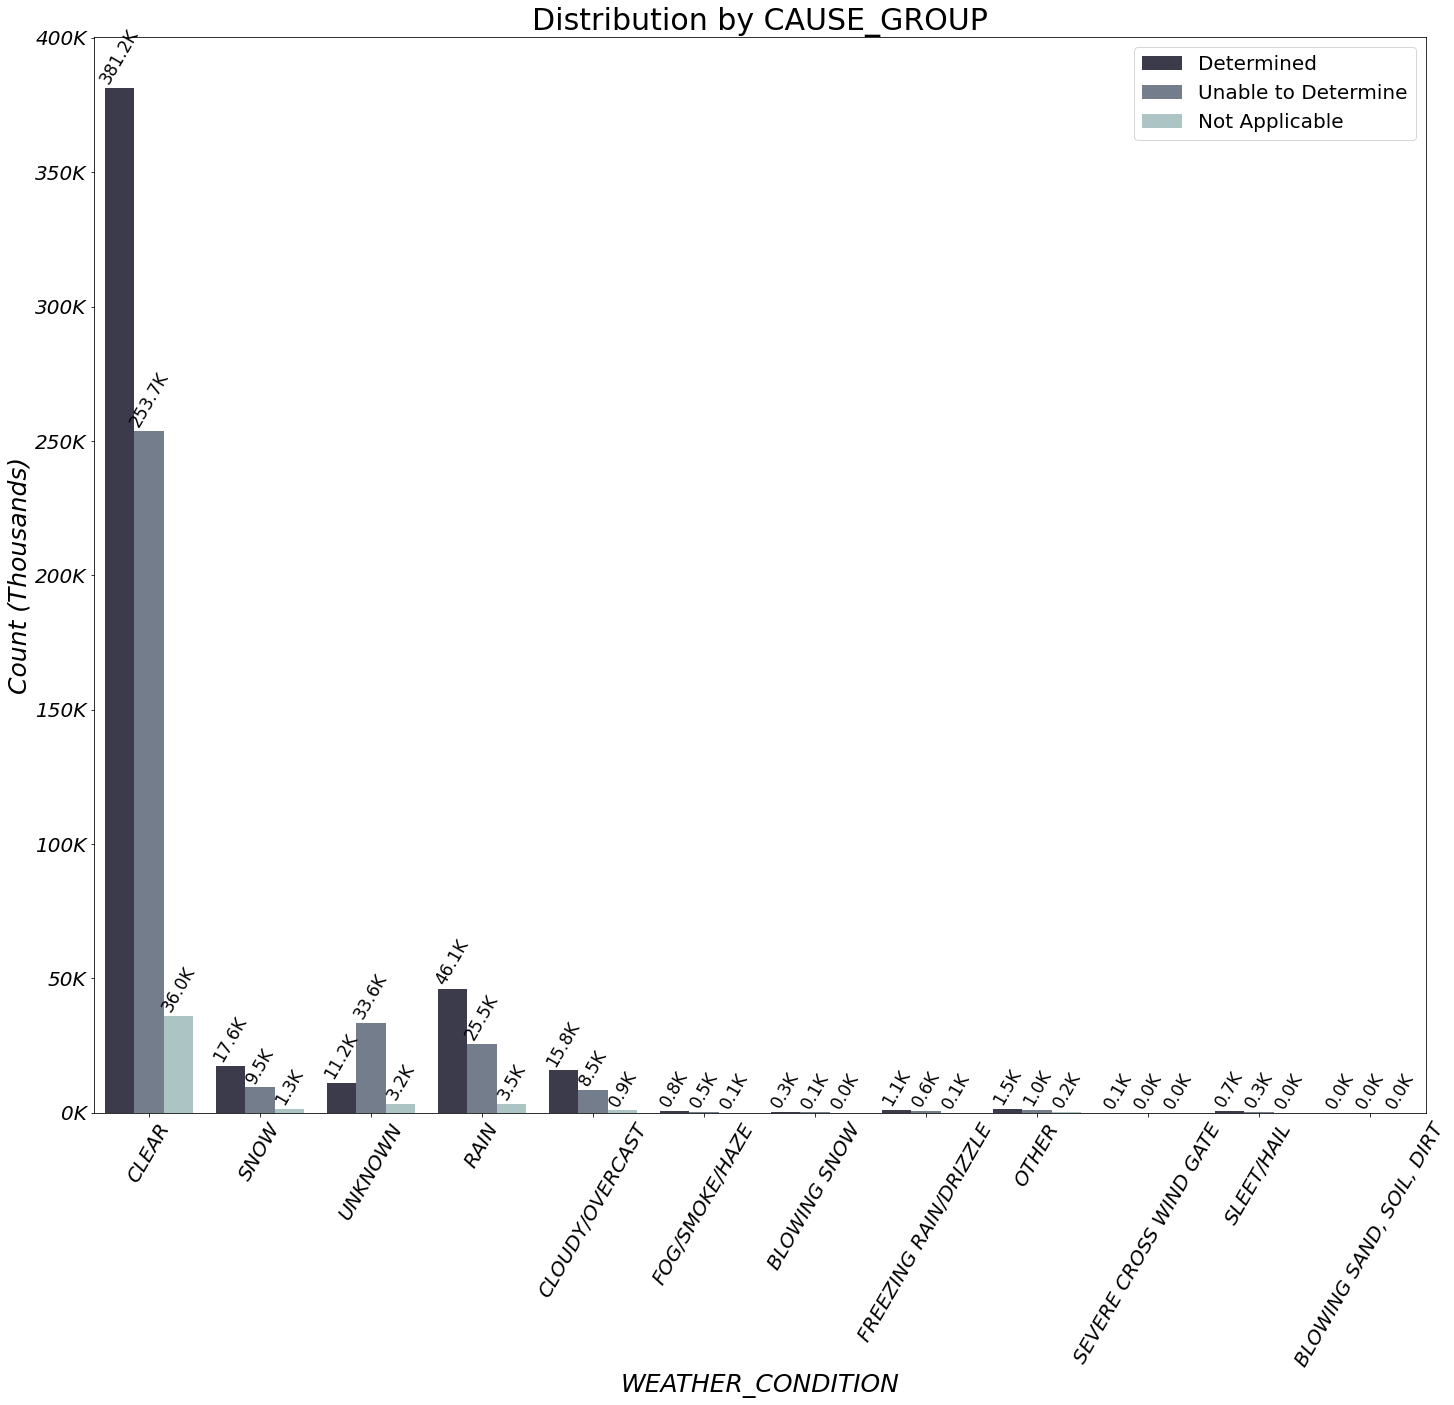

In [27]:
# count plot for 'WEATHER_CONDITION' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'WEATHER_CONDITION', 'CAUSE_GROUP')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

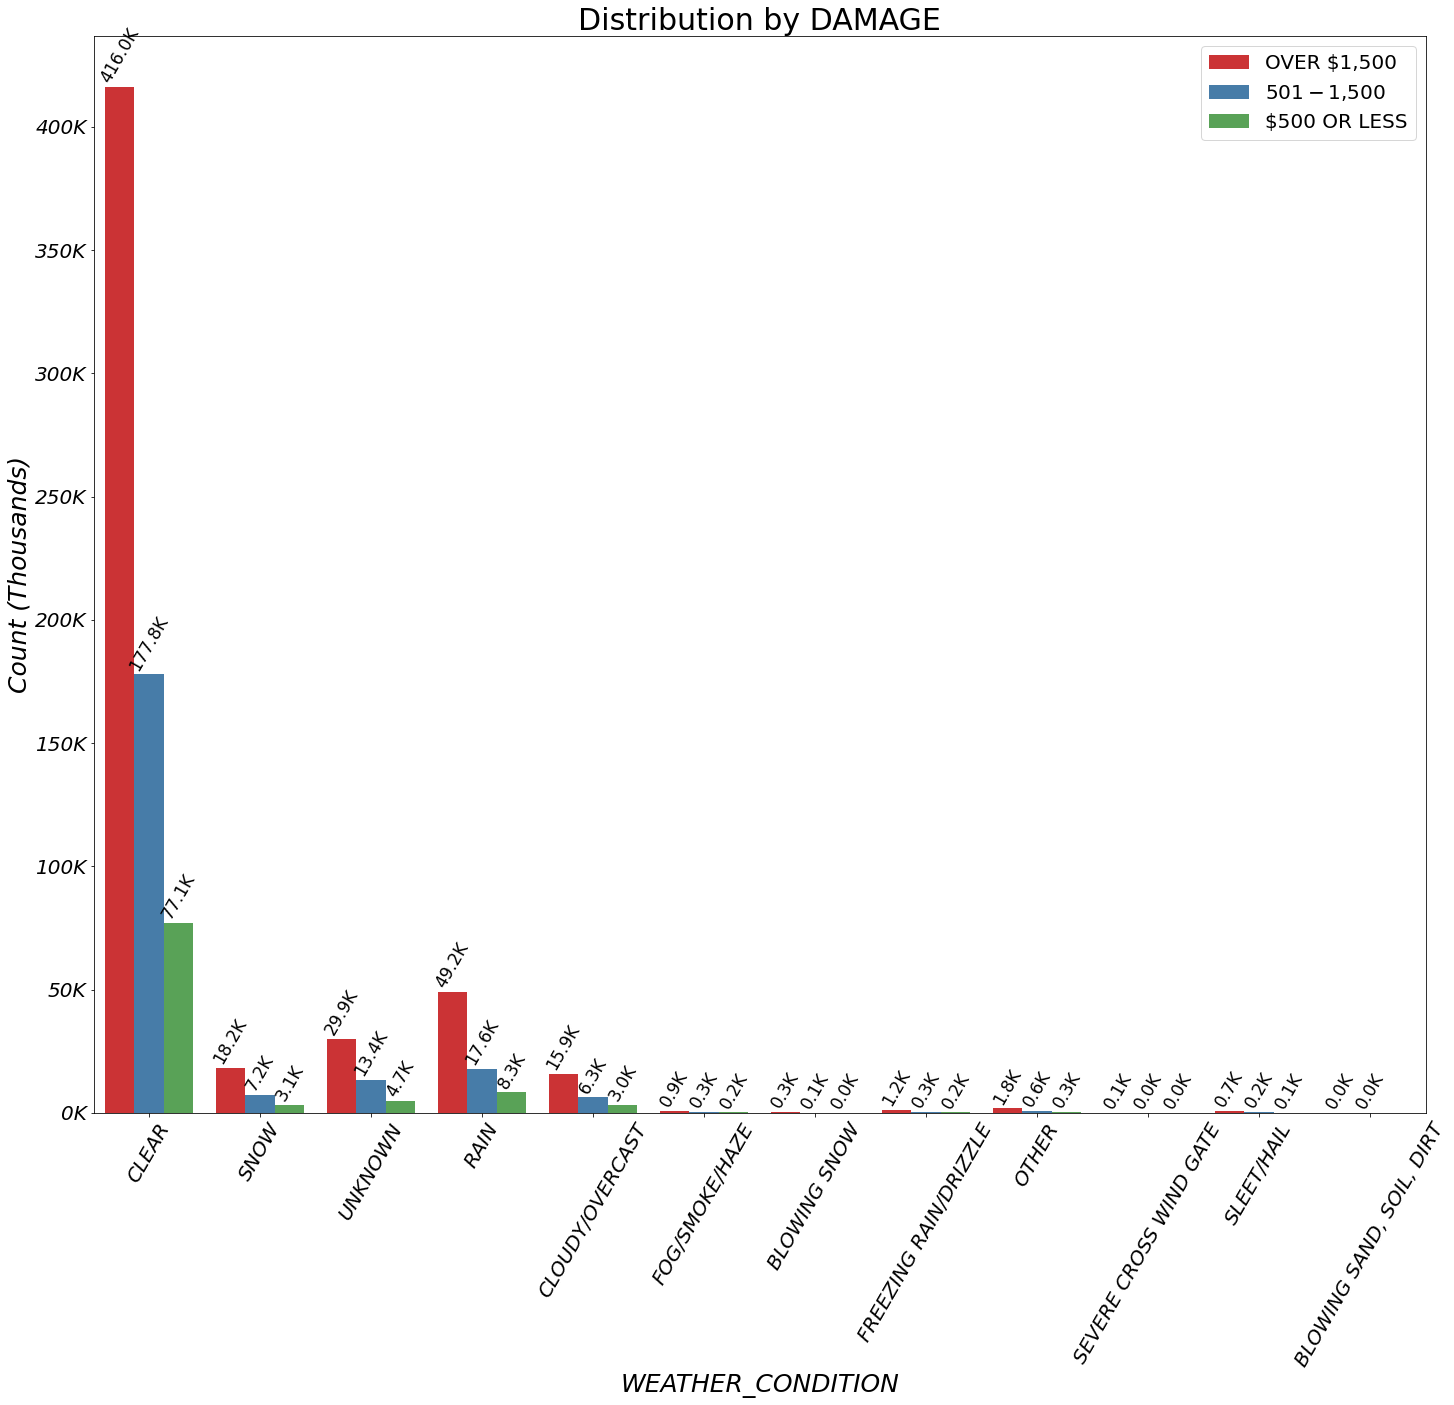

In [28]:
# count plot for 'WEATHER_CONDITION' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'WEATHER_CONDITION', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages vs Weather Condition.

* The majority of crashes occur in clear weather. The second largest amount of crashes occurs in rain.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by First Crash Type.

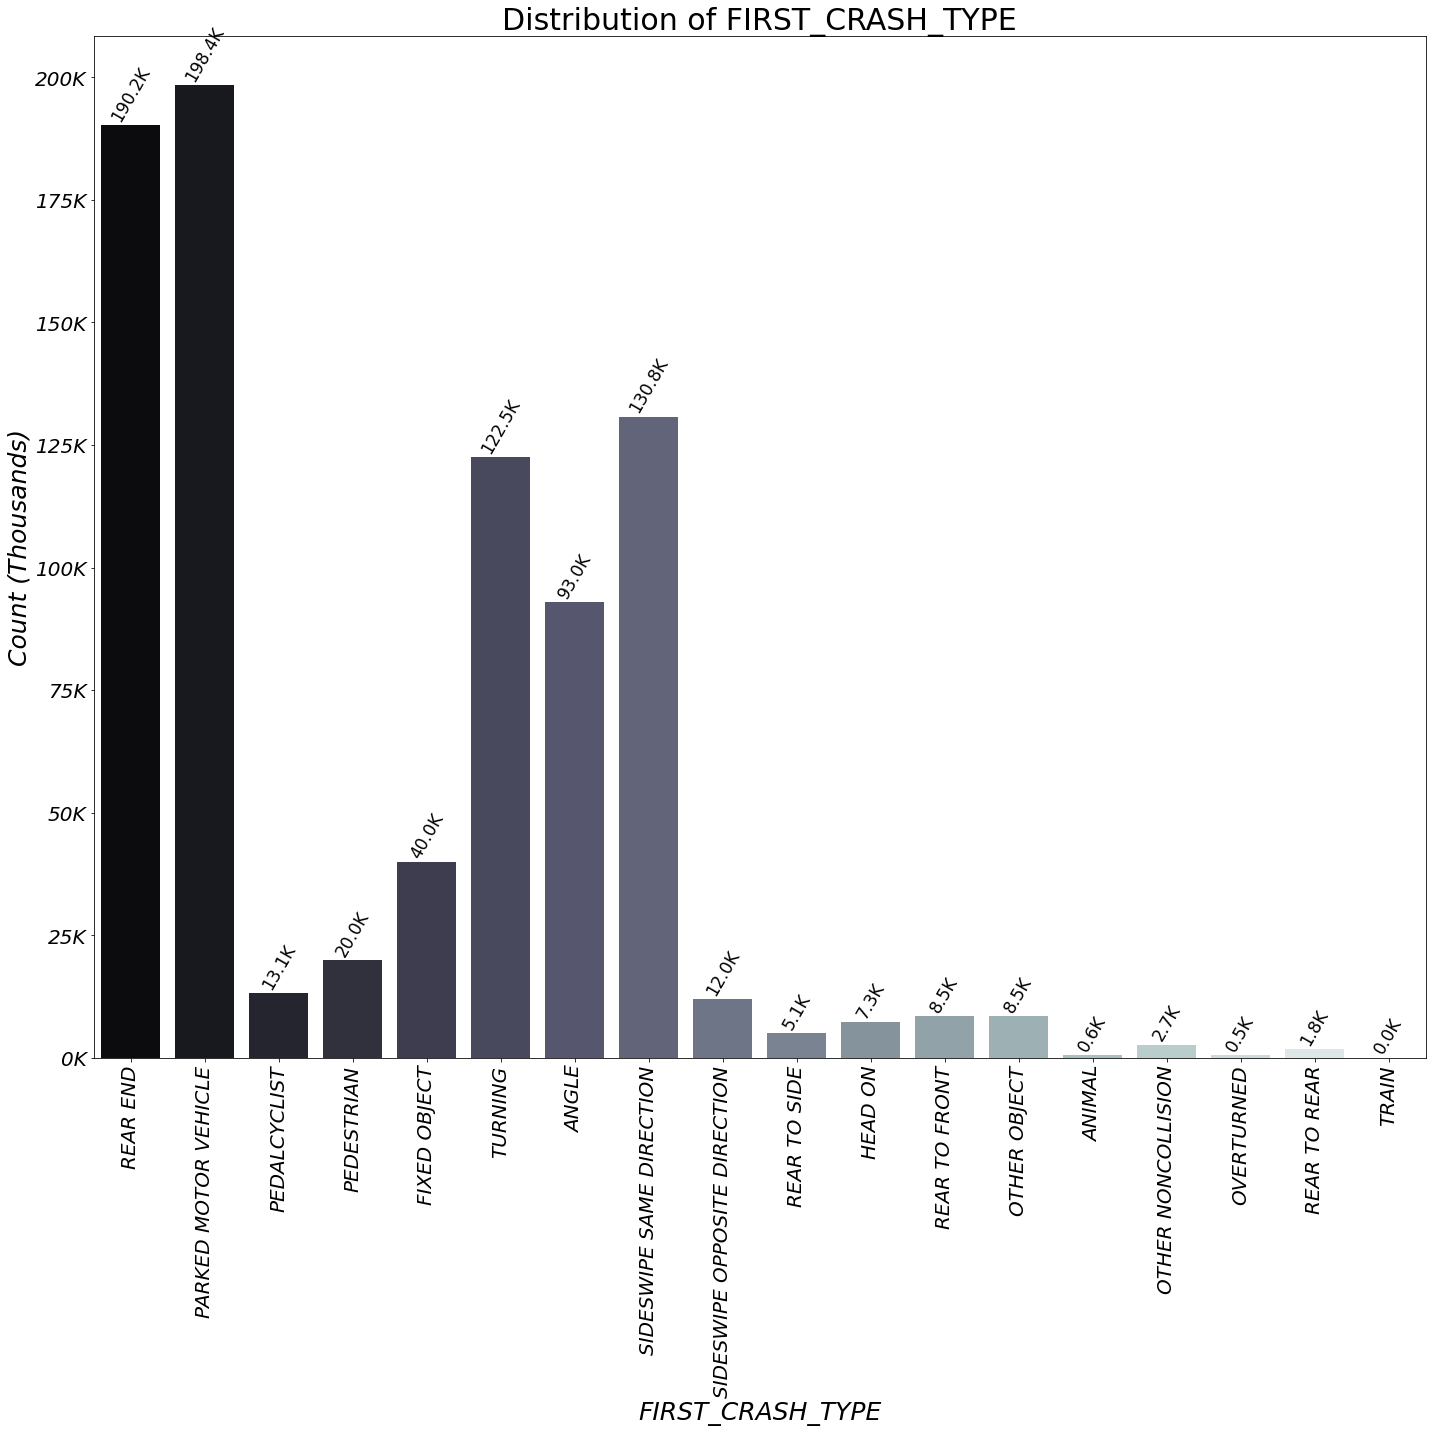

In [29]:
# count plot for 'FIRST_CRASH_TYPE'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

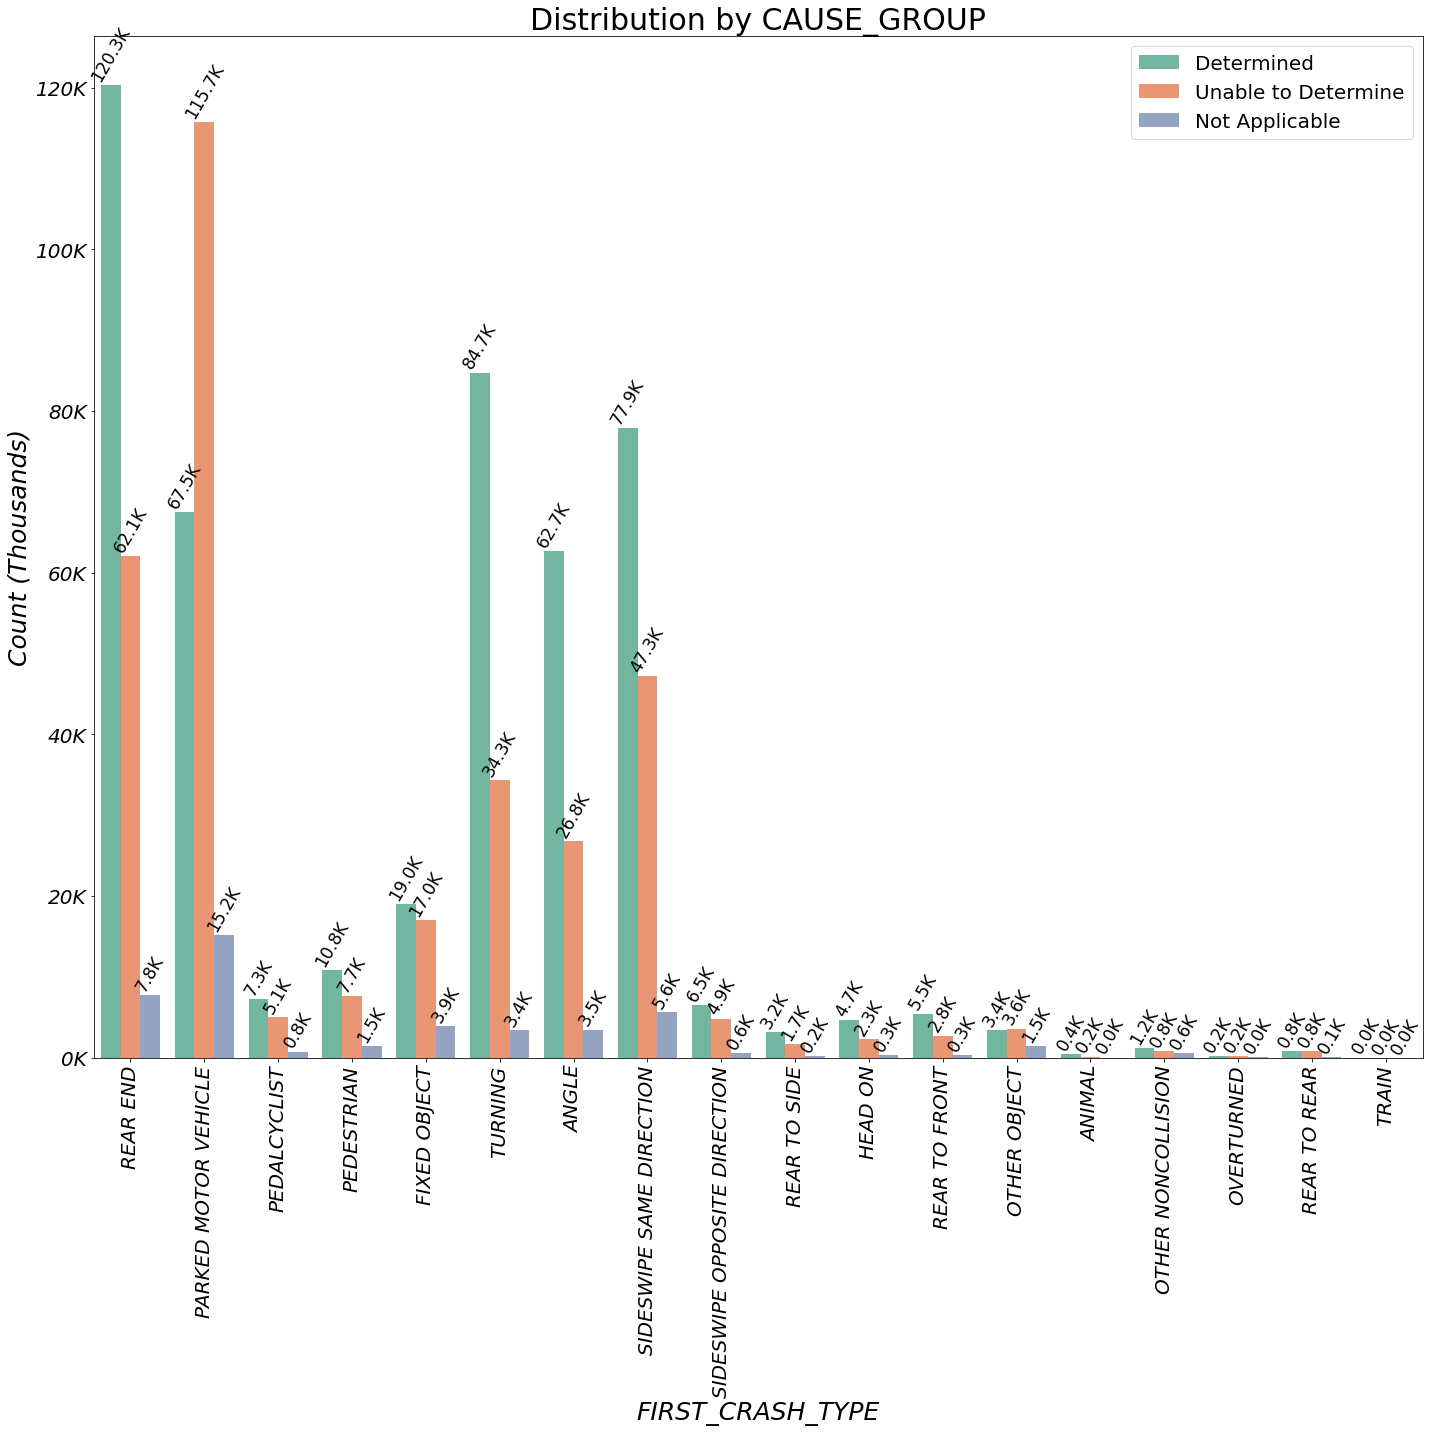

In [30]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

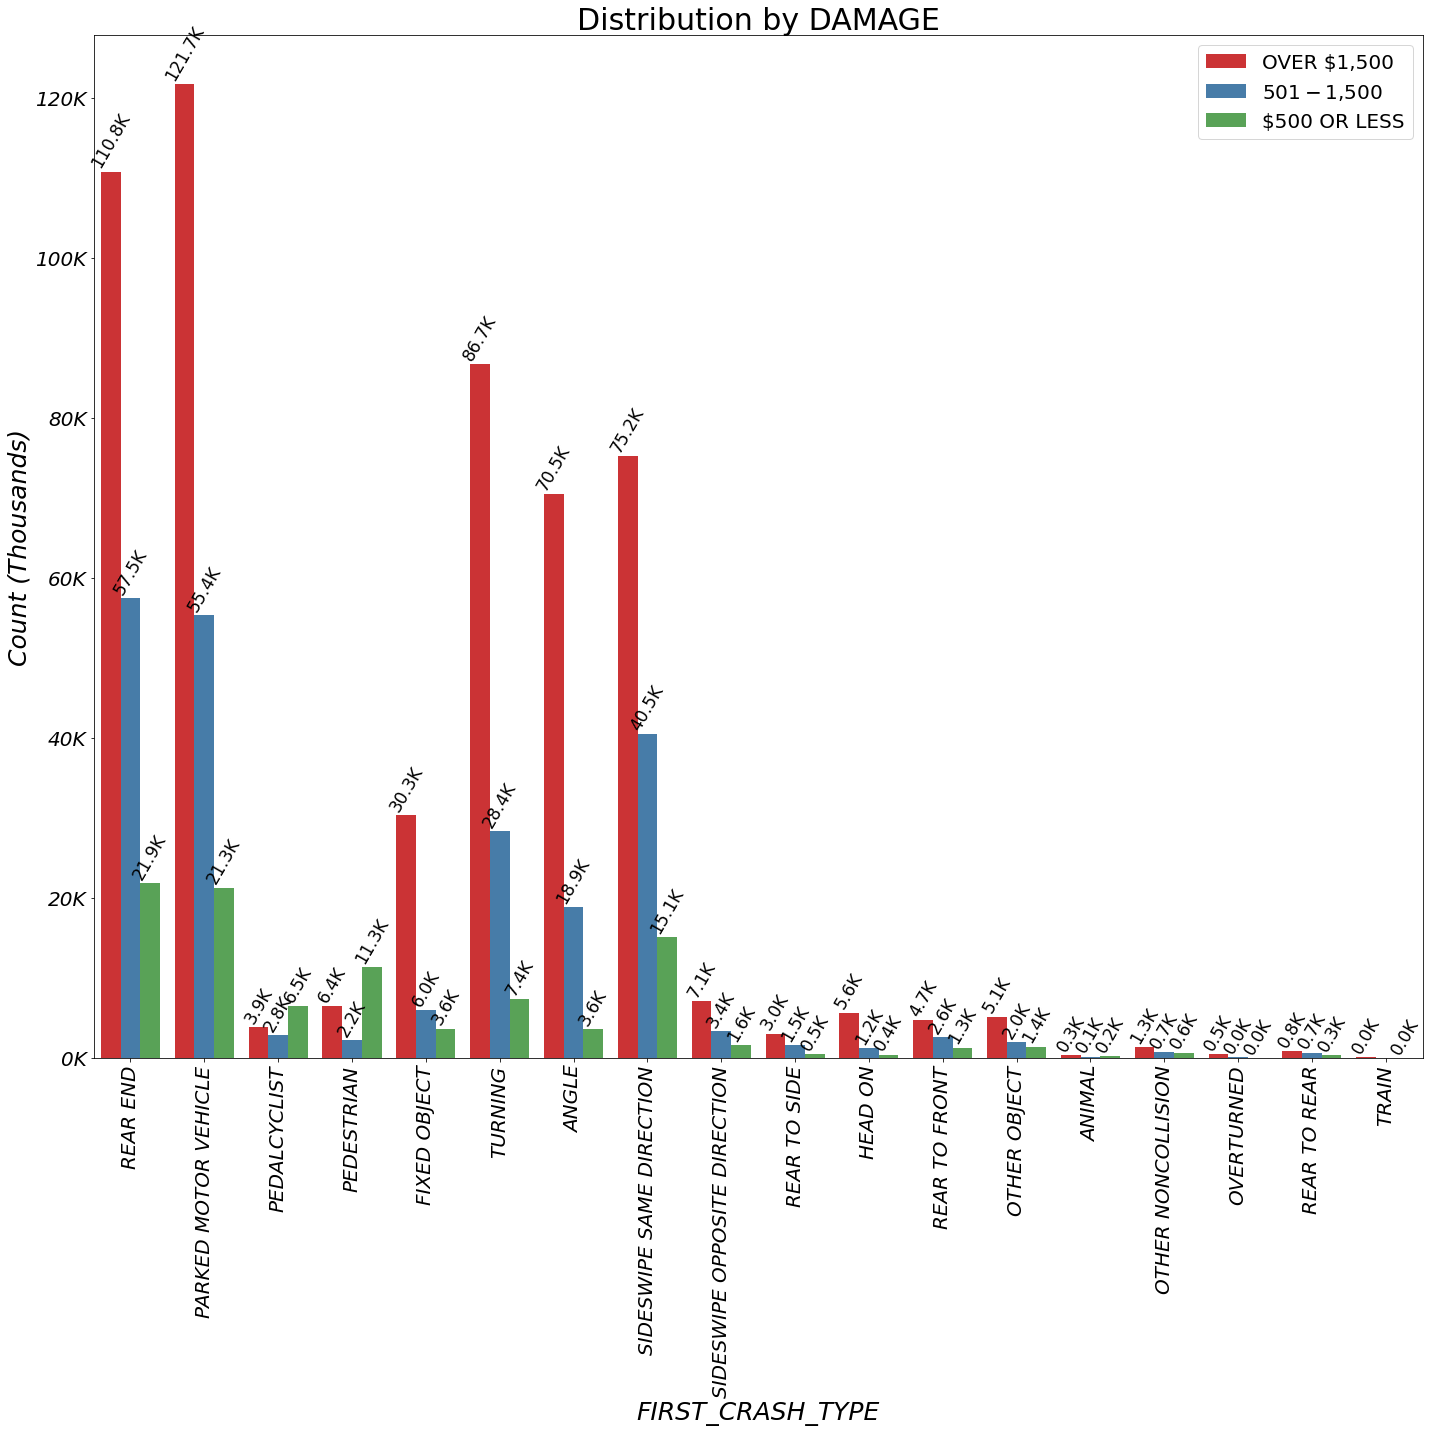

In [31]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

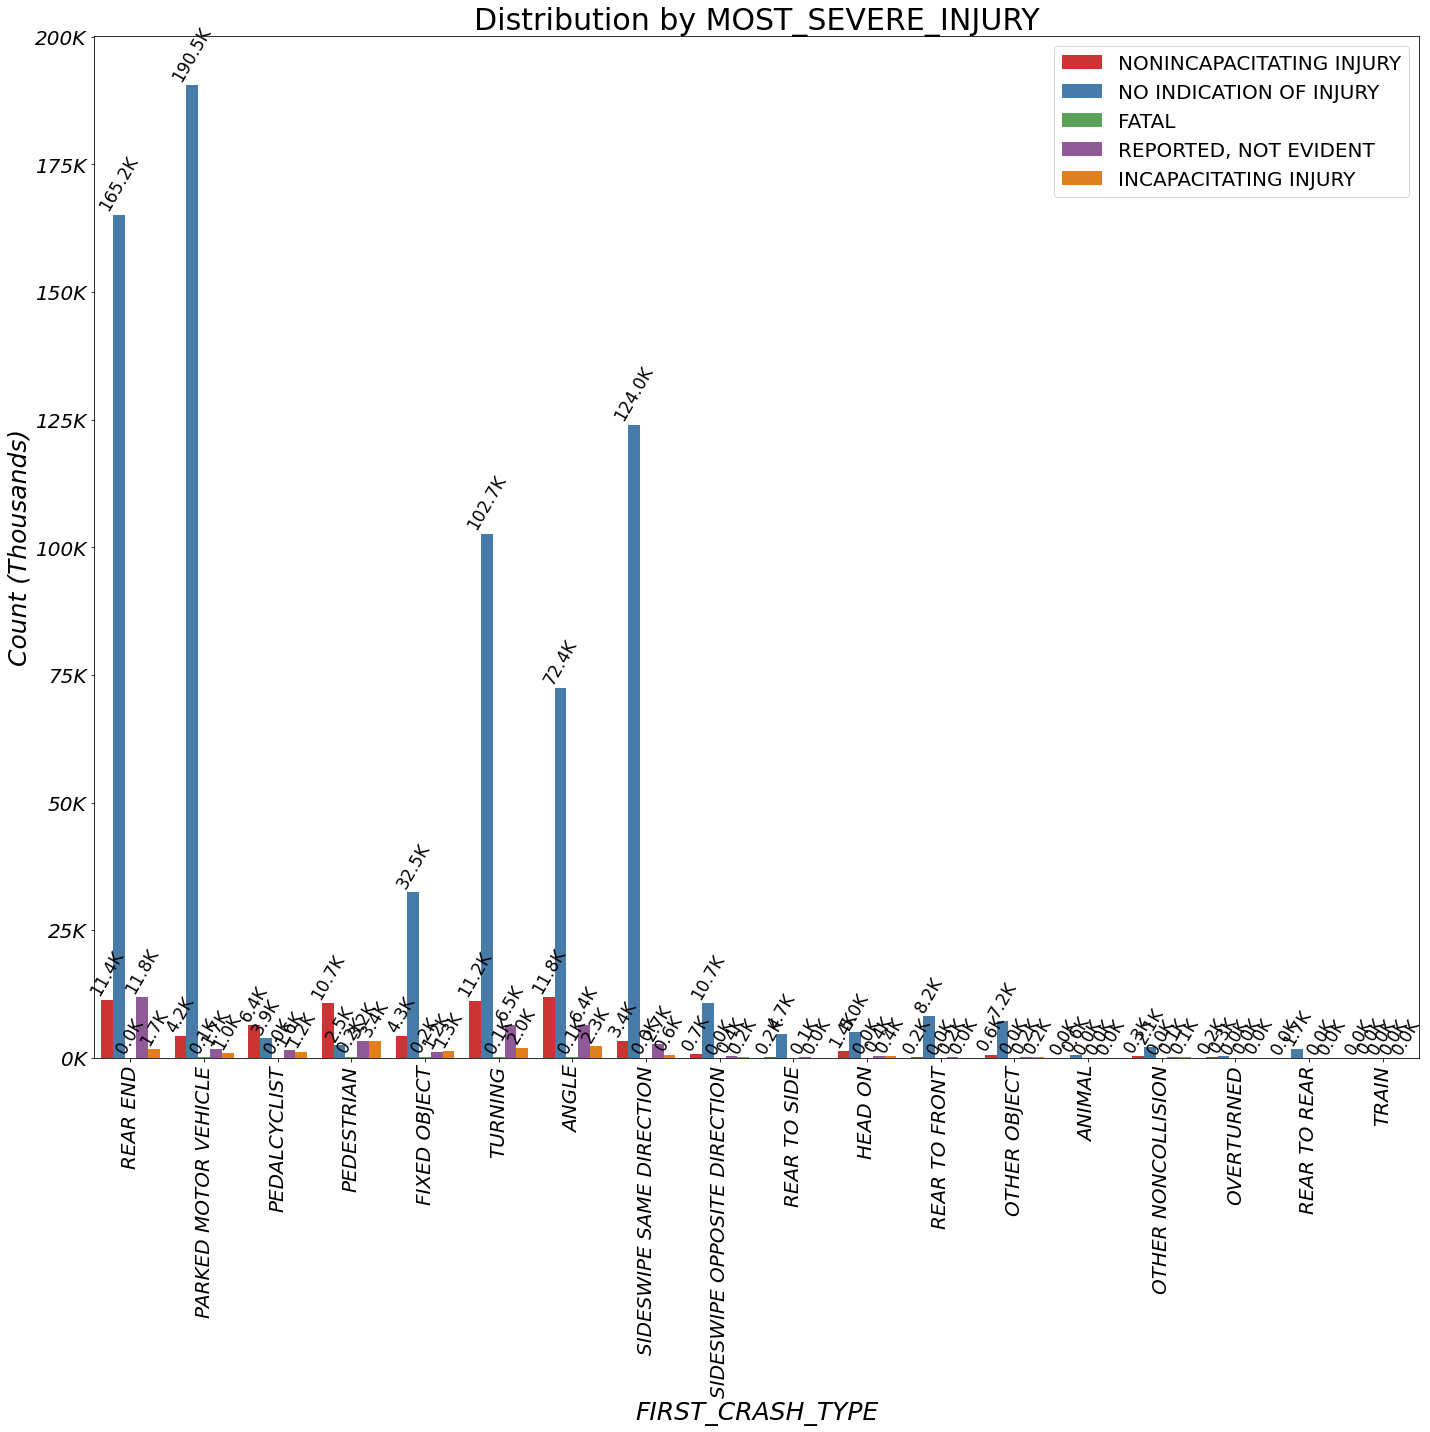

In [32]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages by First Crash Type.

* Parked motor vehicle had the highest amount of damages and has the highest undetermined amount of crash causes.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Time (Day, Hour, Month).

We're going to look at the distribution of causes, damages, aind injuries by time of the day (`CRASH_HOUR`), week (`CRASH_DAY_OF_WEEK`), and month(`CRASH_MONTH`).

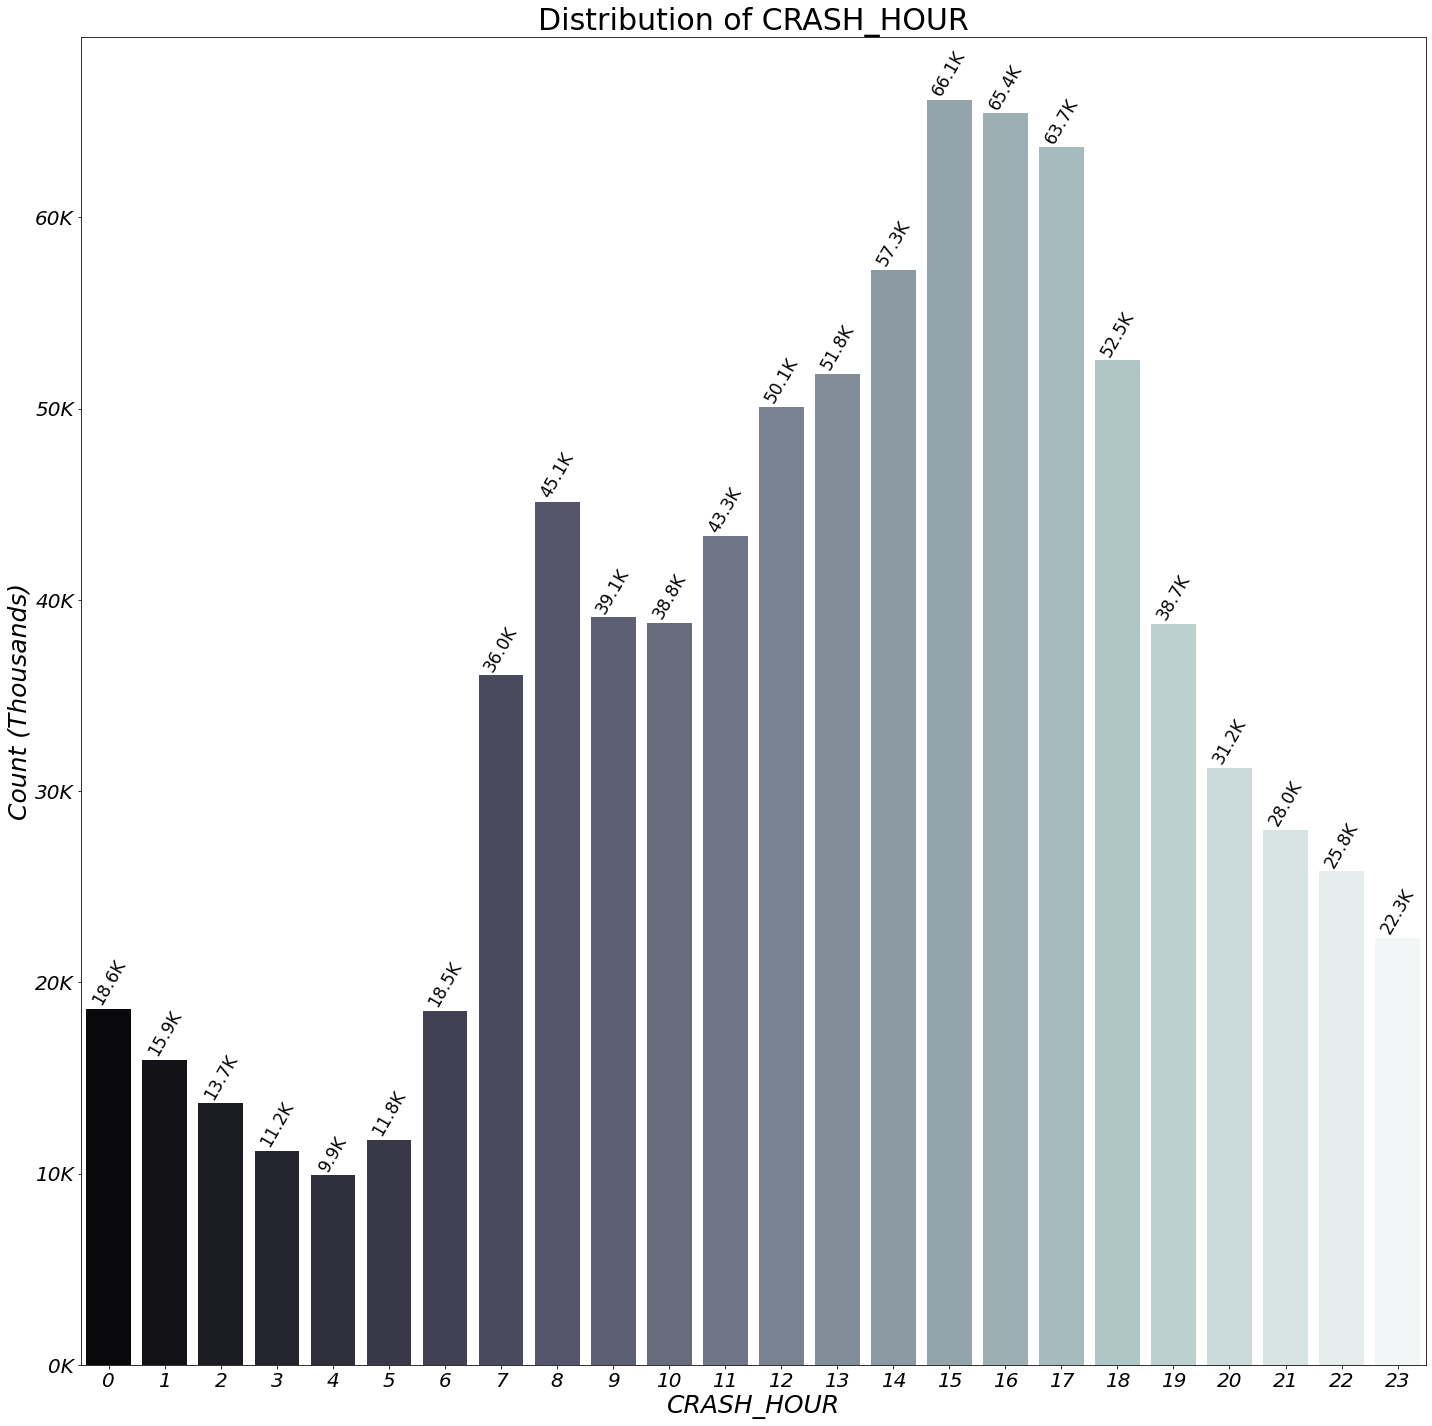

In [33]:
# count plot for 'CRASH_HOUR'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

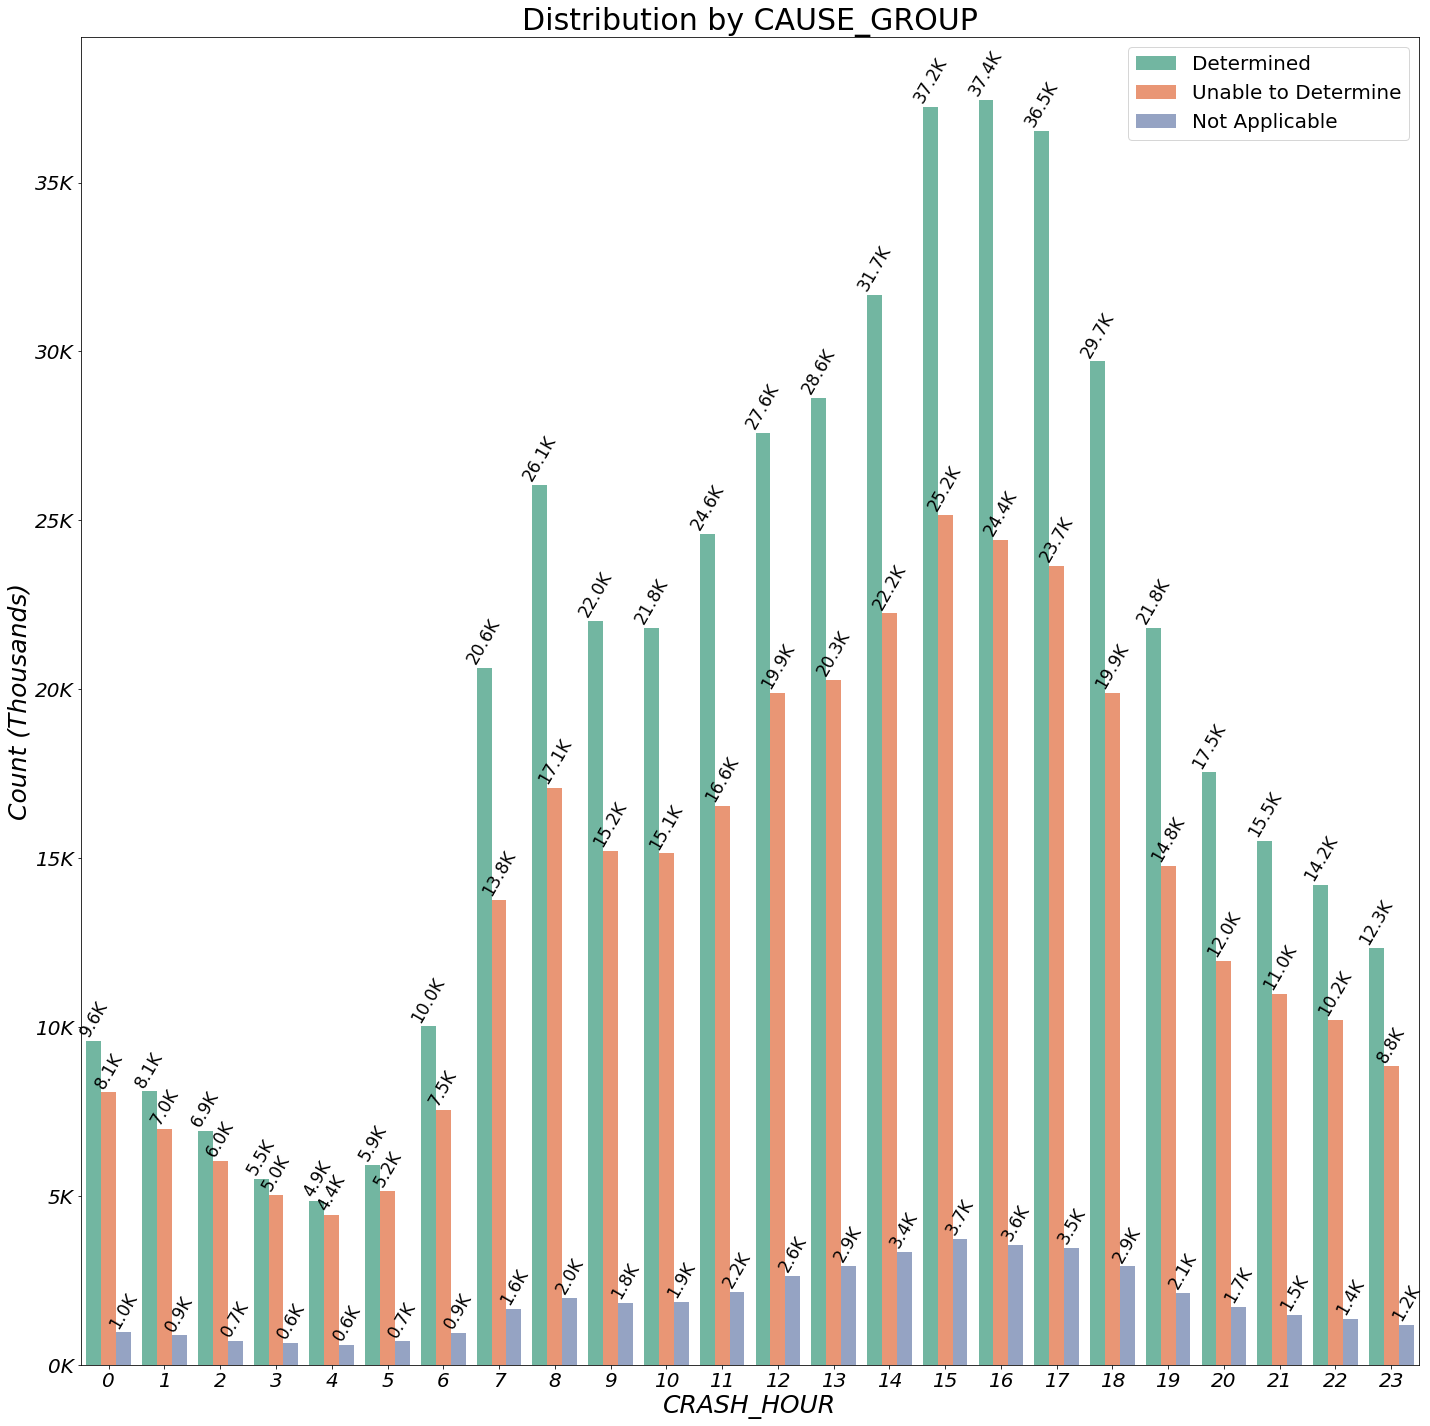

In [34]:
# count plot for 'CRASH_HOUR' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

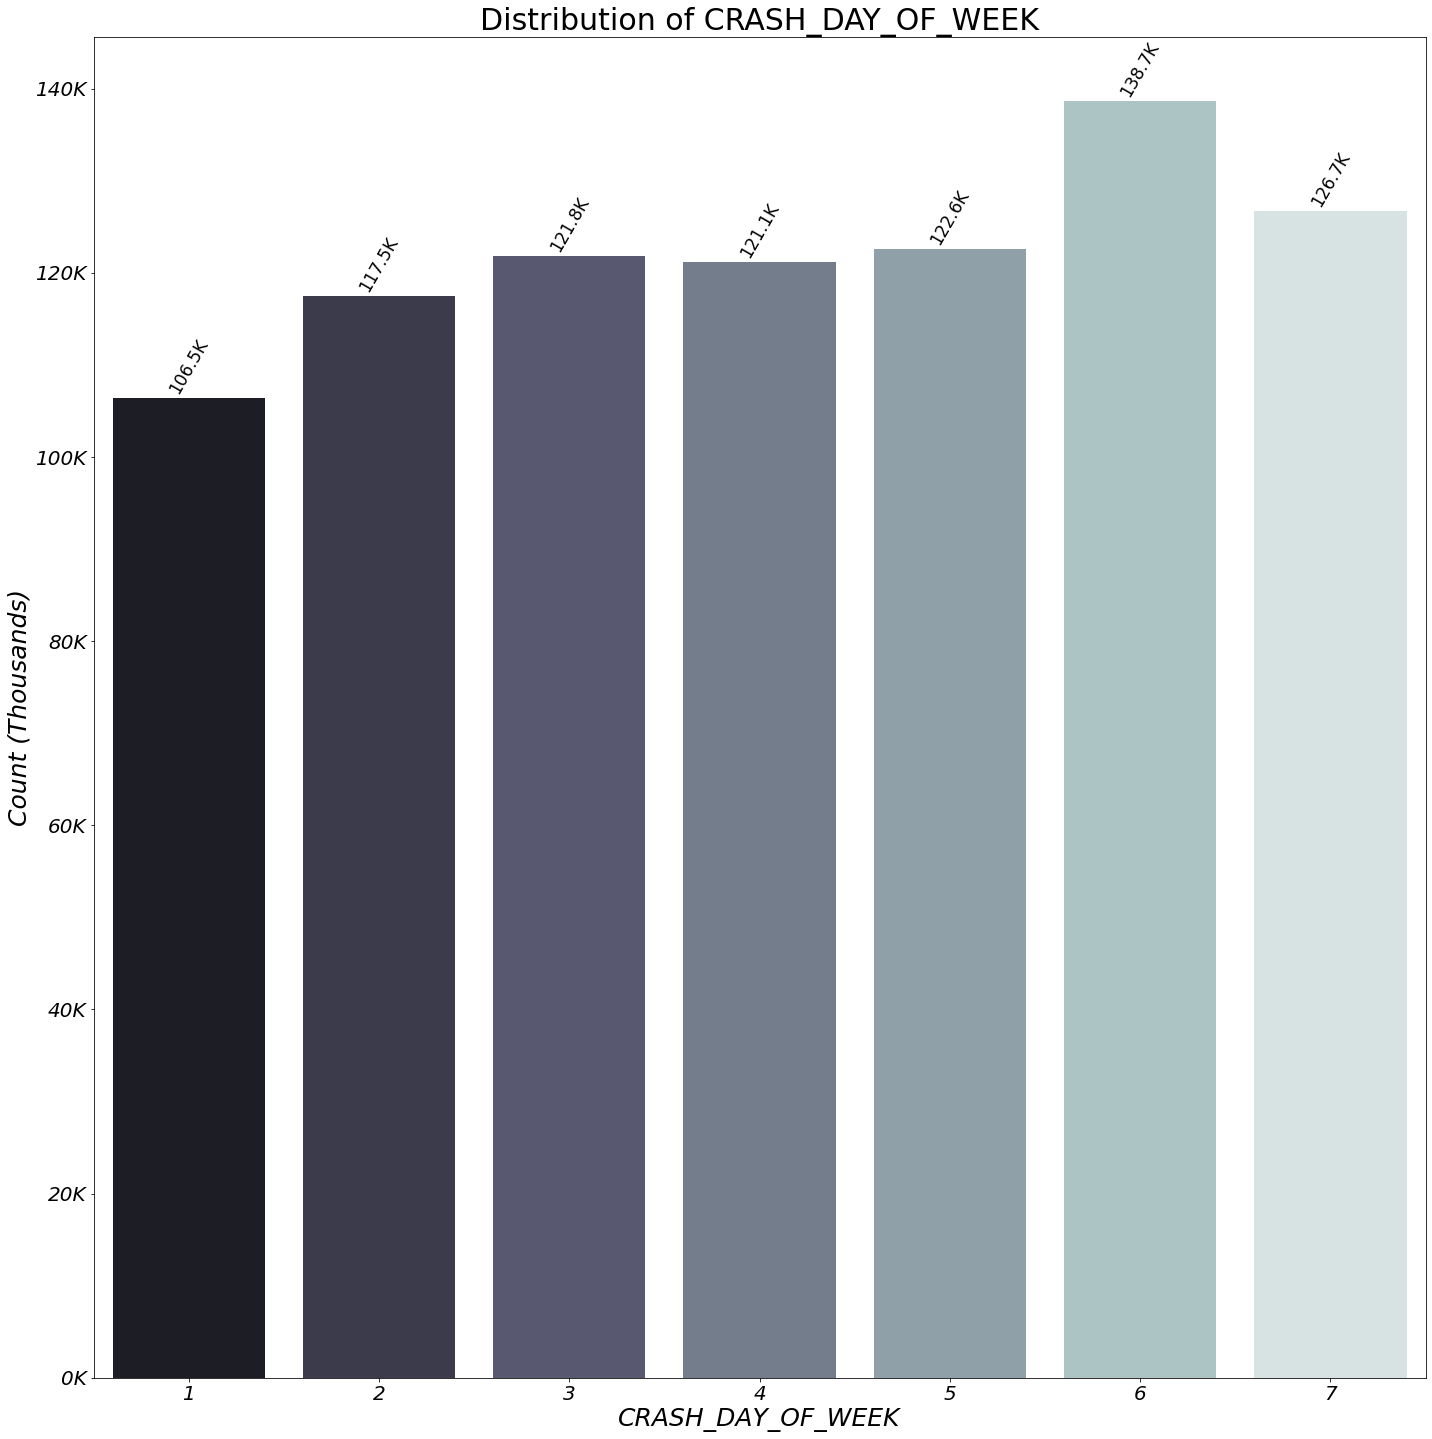

In [35]:
# count plot for 'CRASH_DAY_OF_WEEK'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

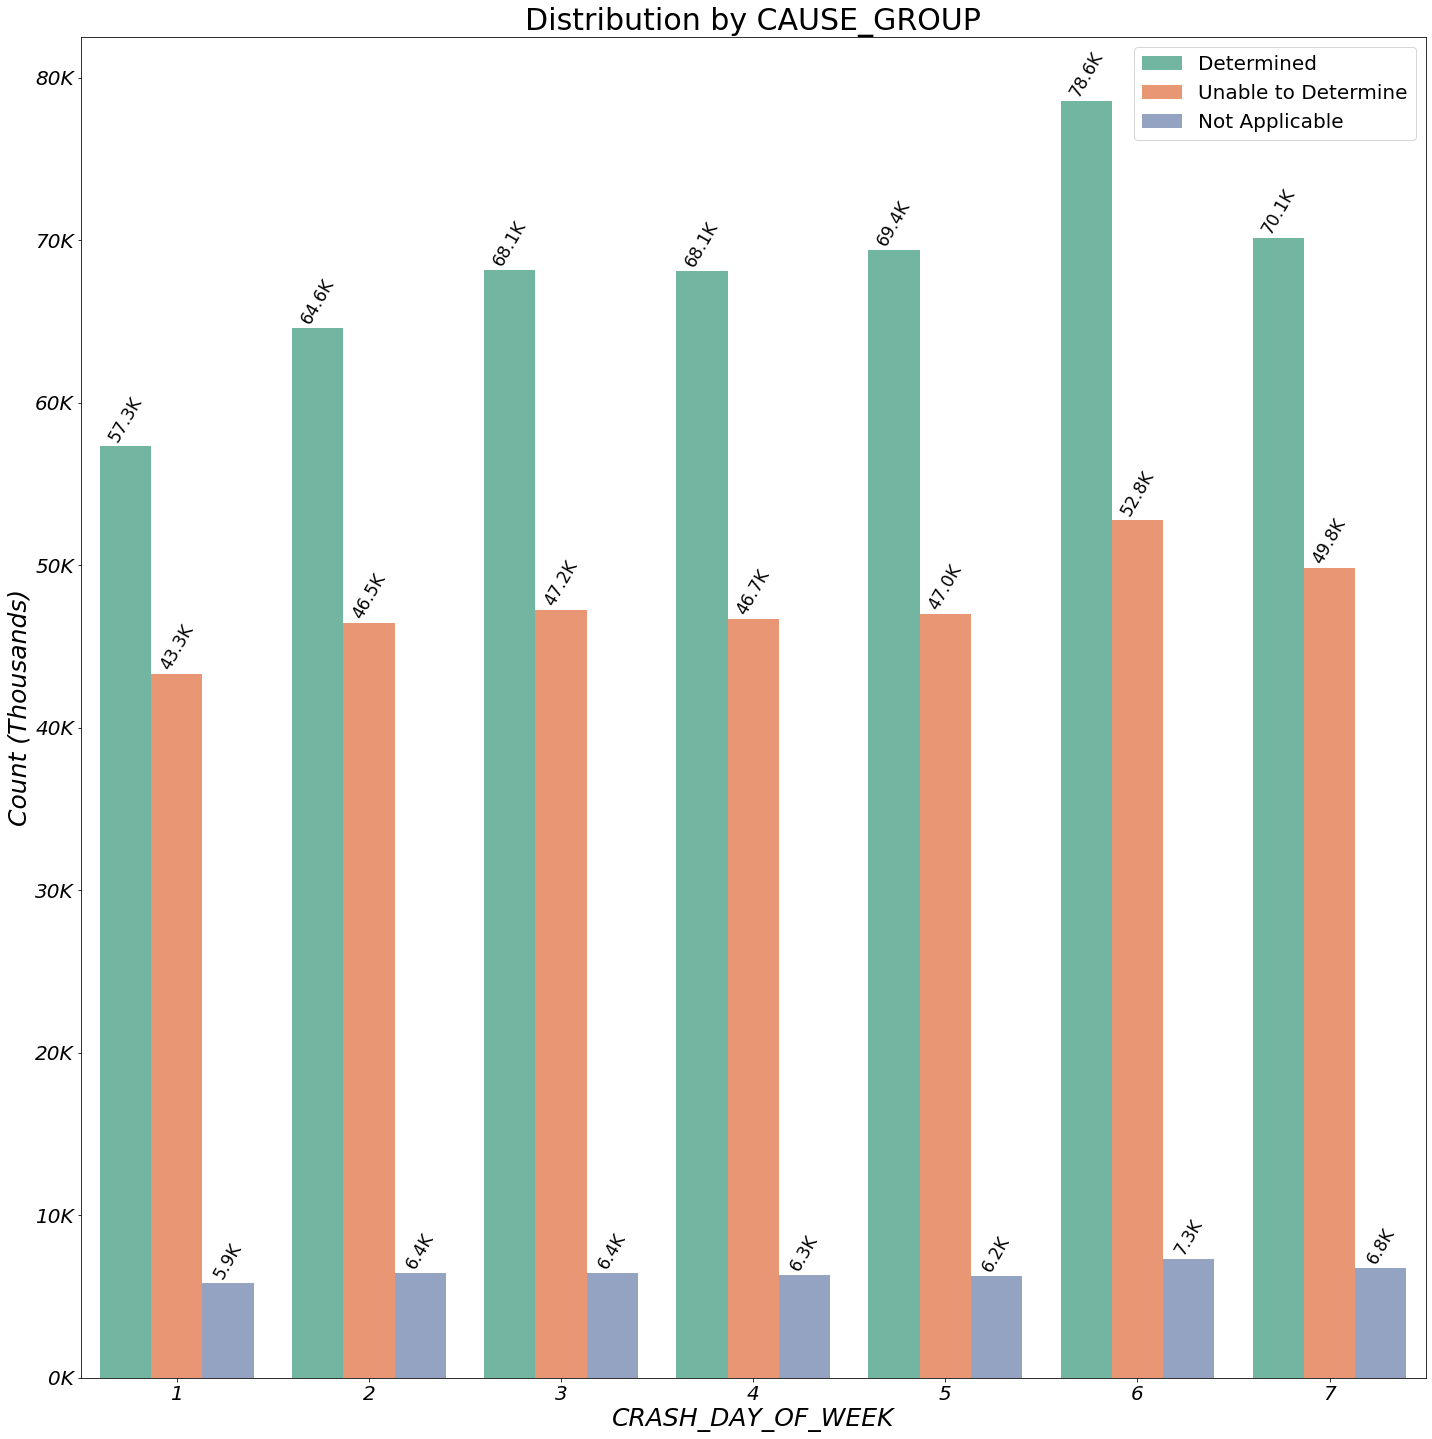

In [36]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

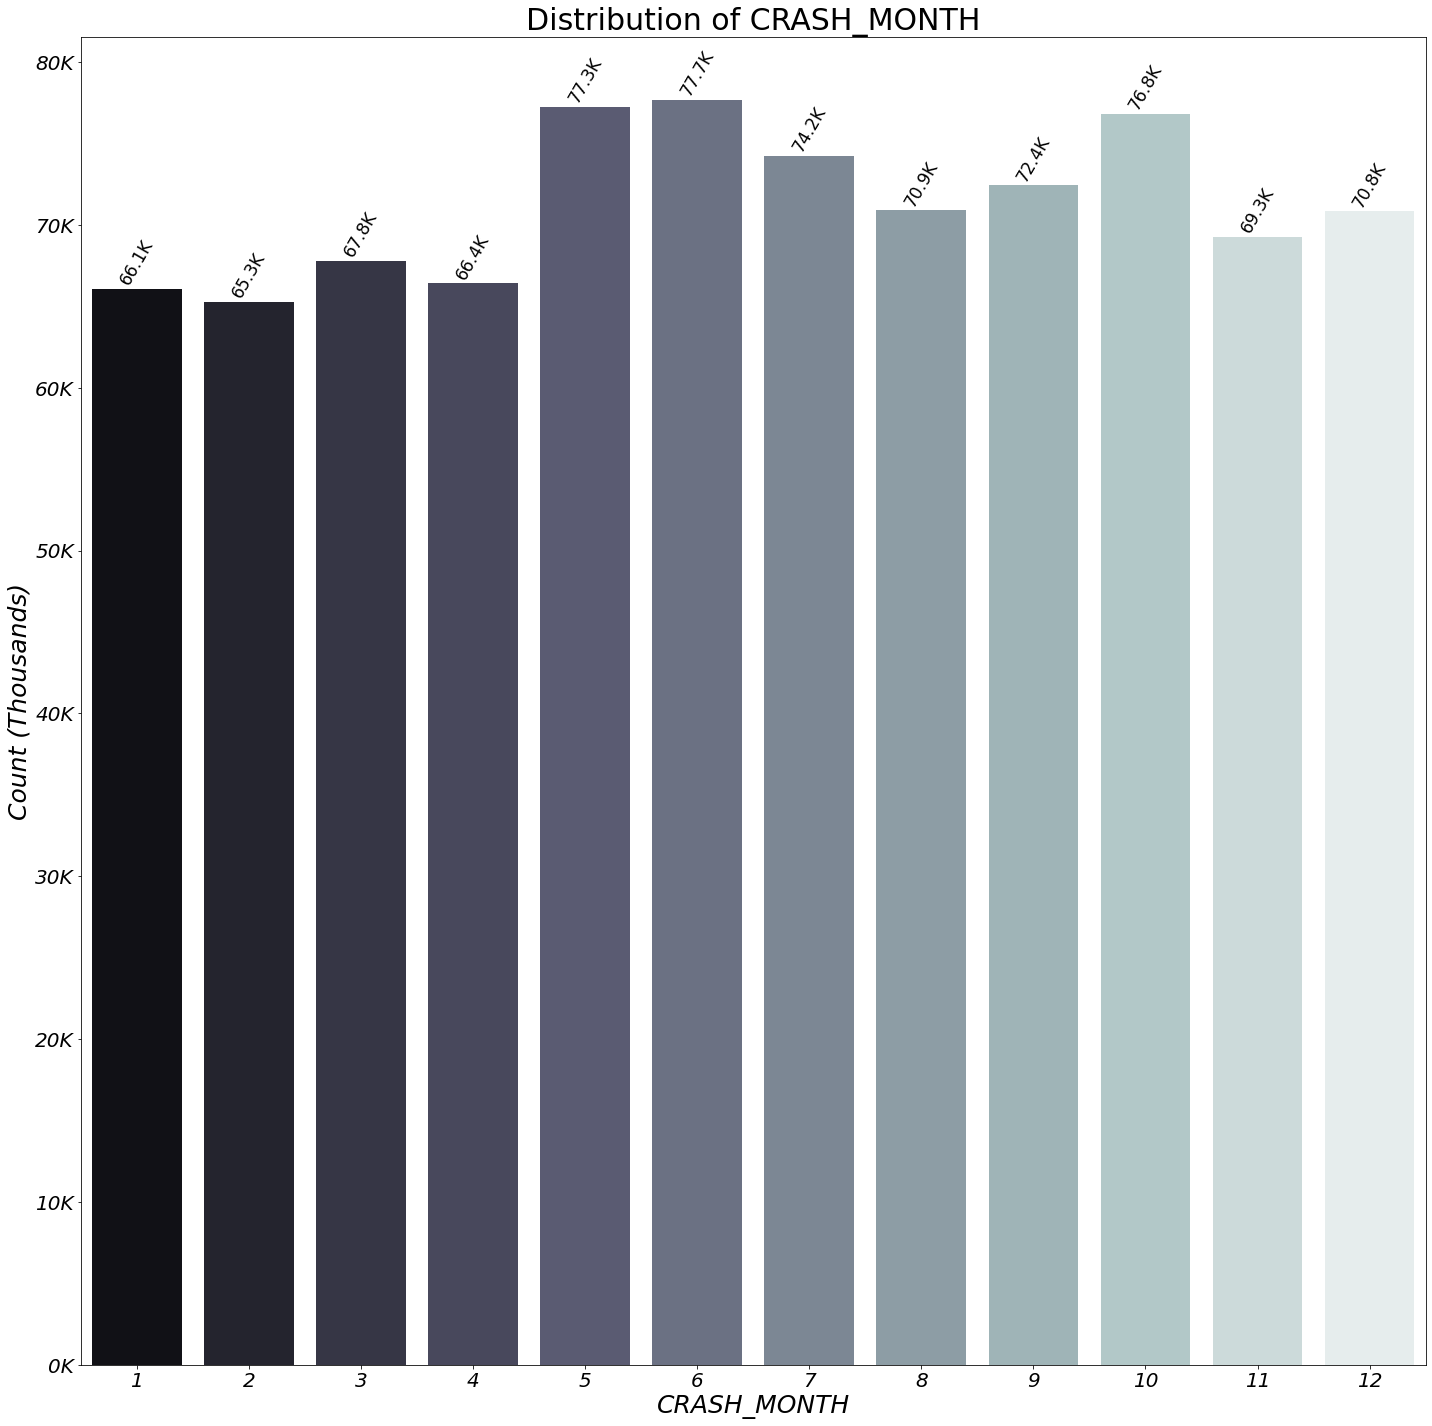

In [37]:
# count plot for 'CRASH_MONTH'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

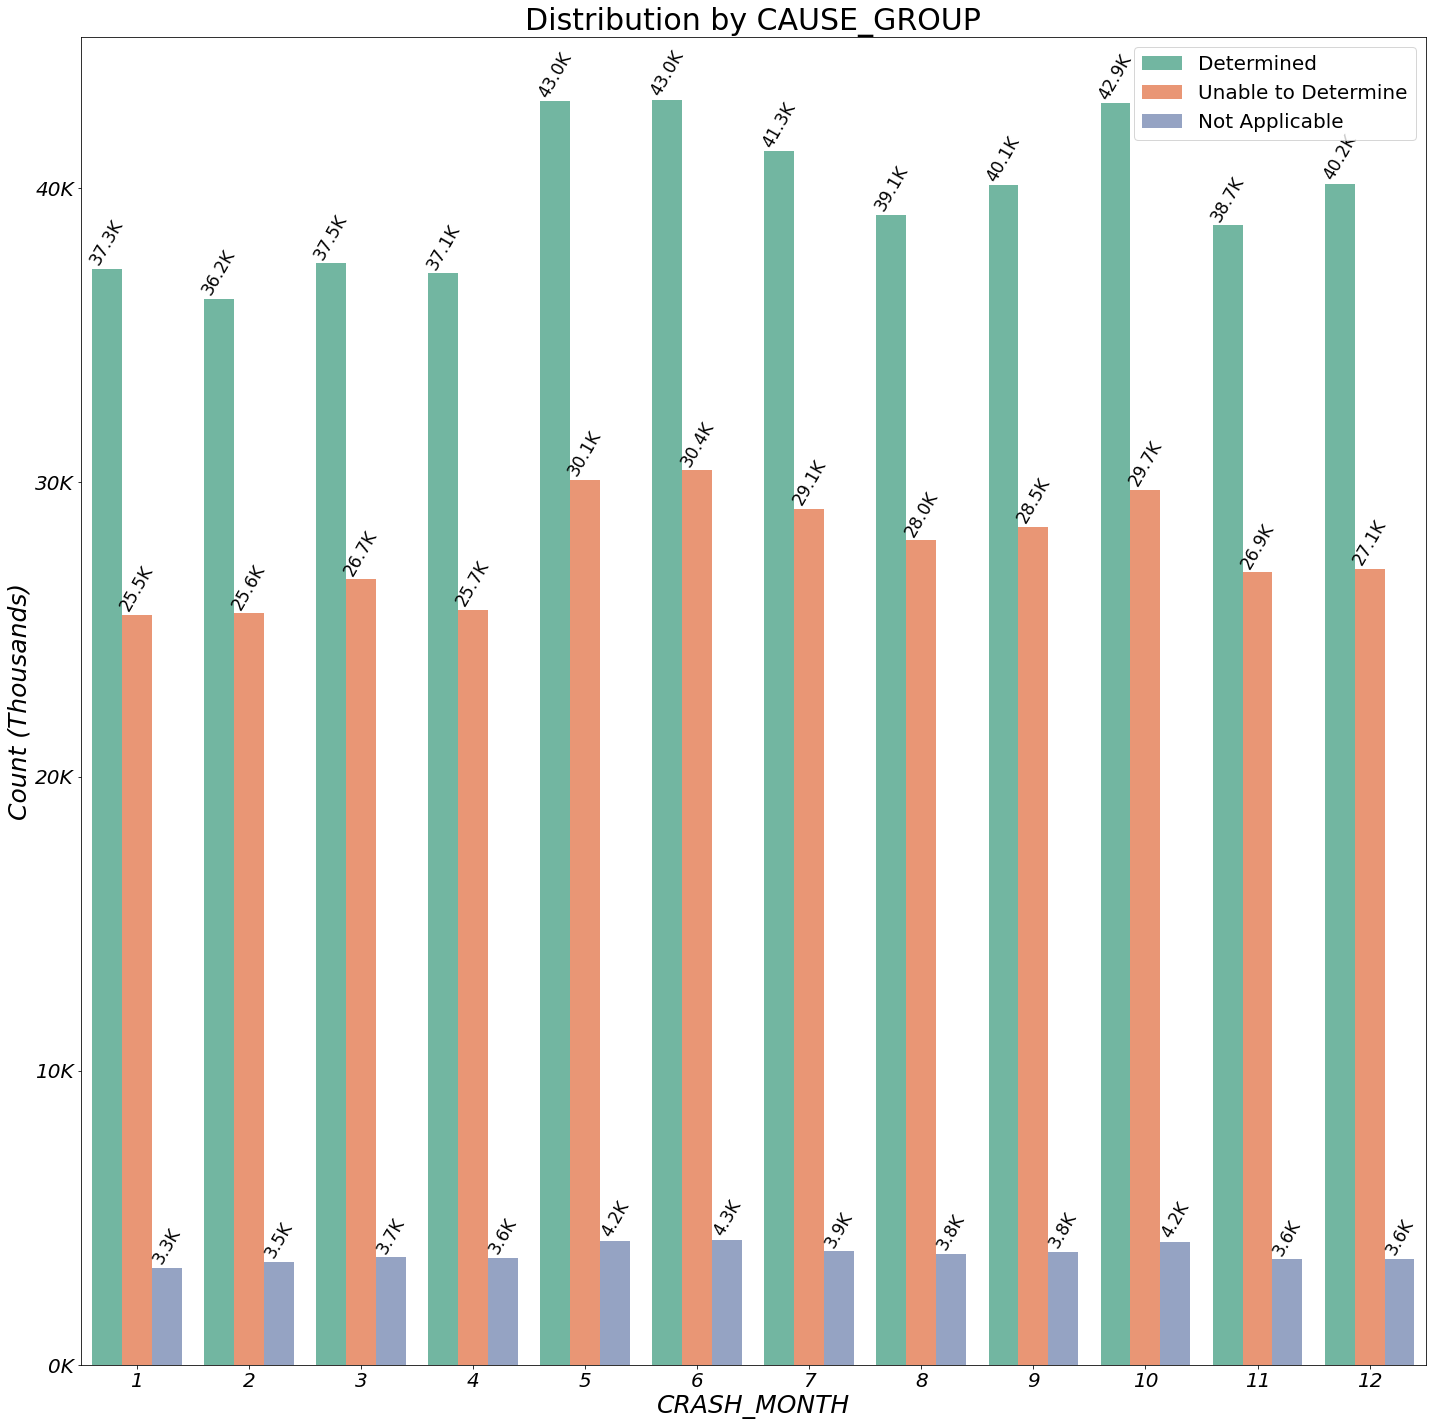

In [38]:
# count plot for 'CRASH_MONTH' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

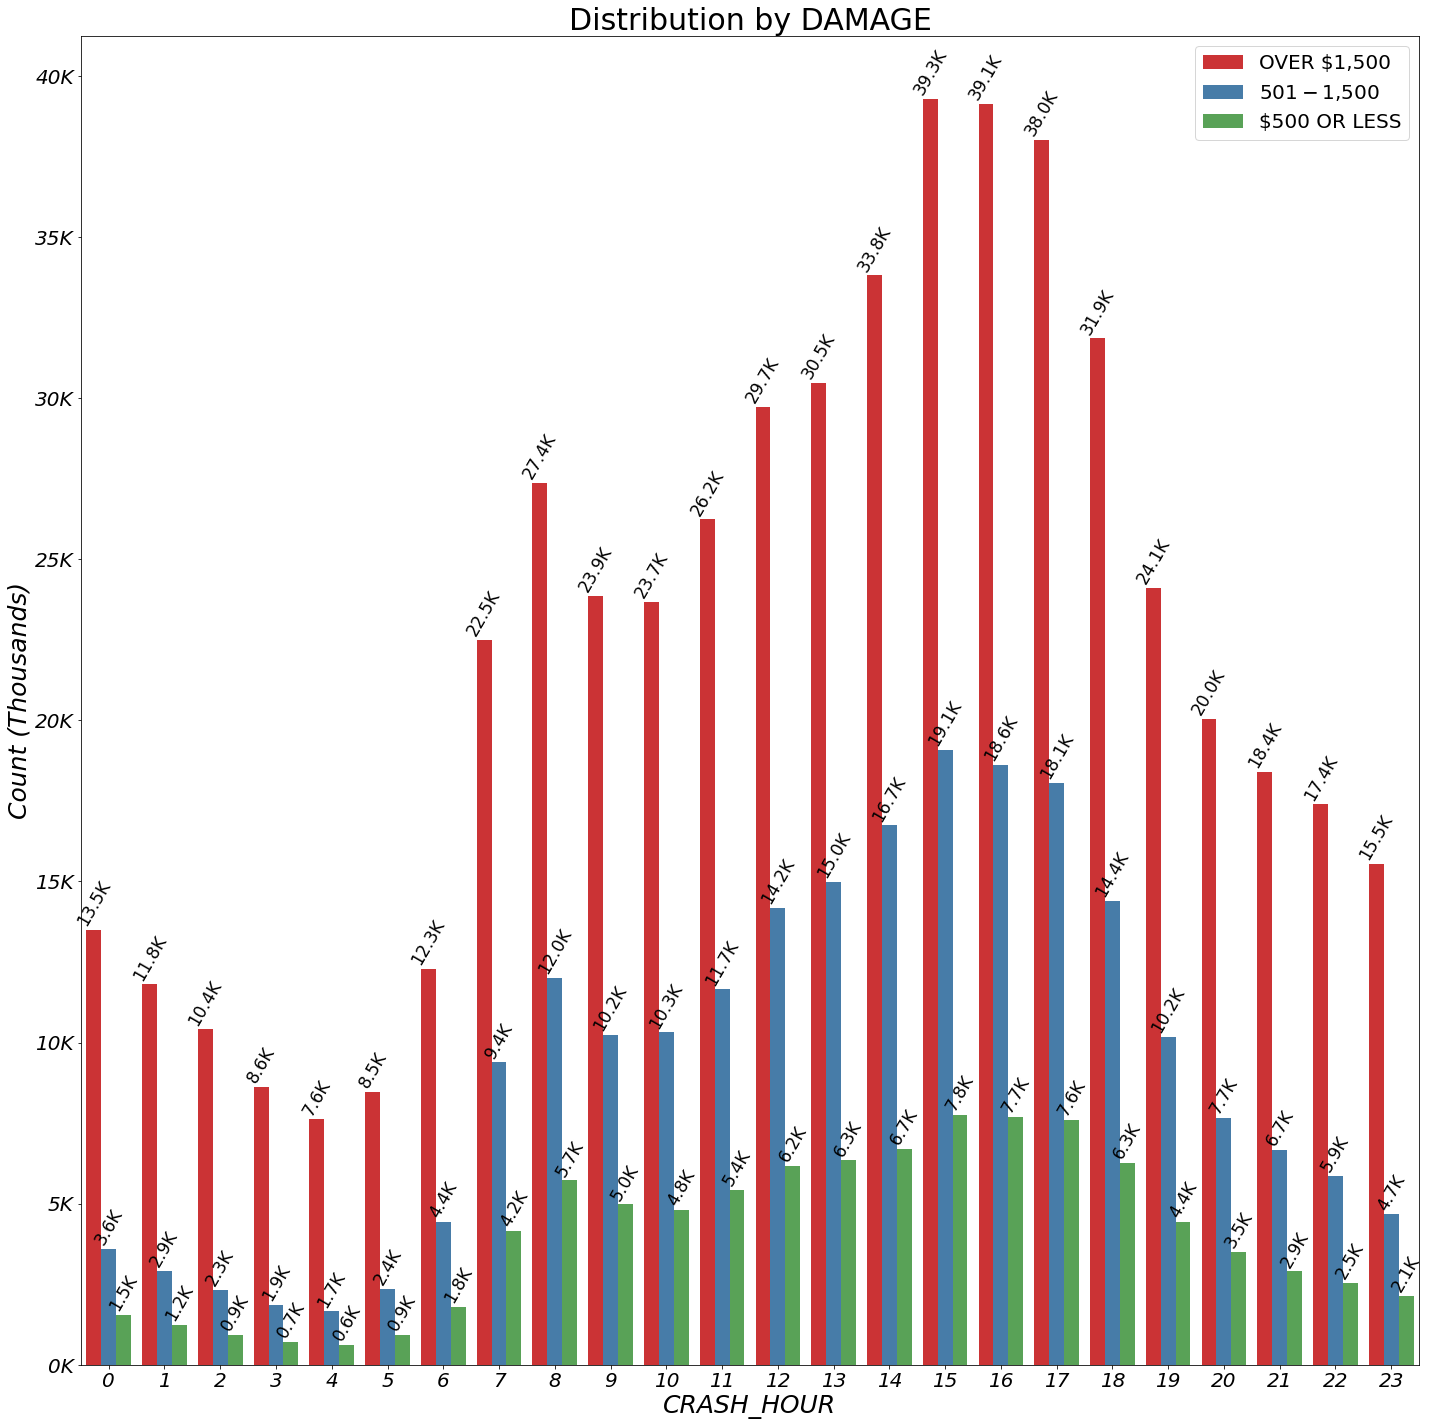

In [39]:
# count plot for 'CRASH_HOUR' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

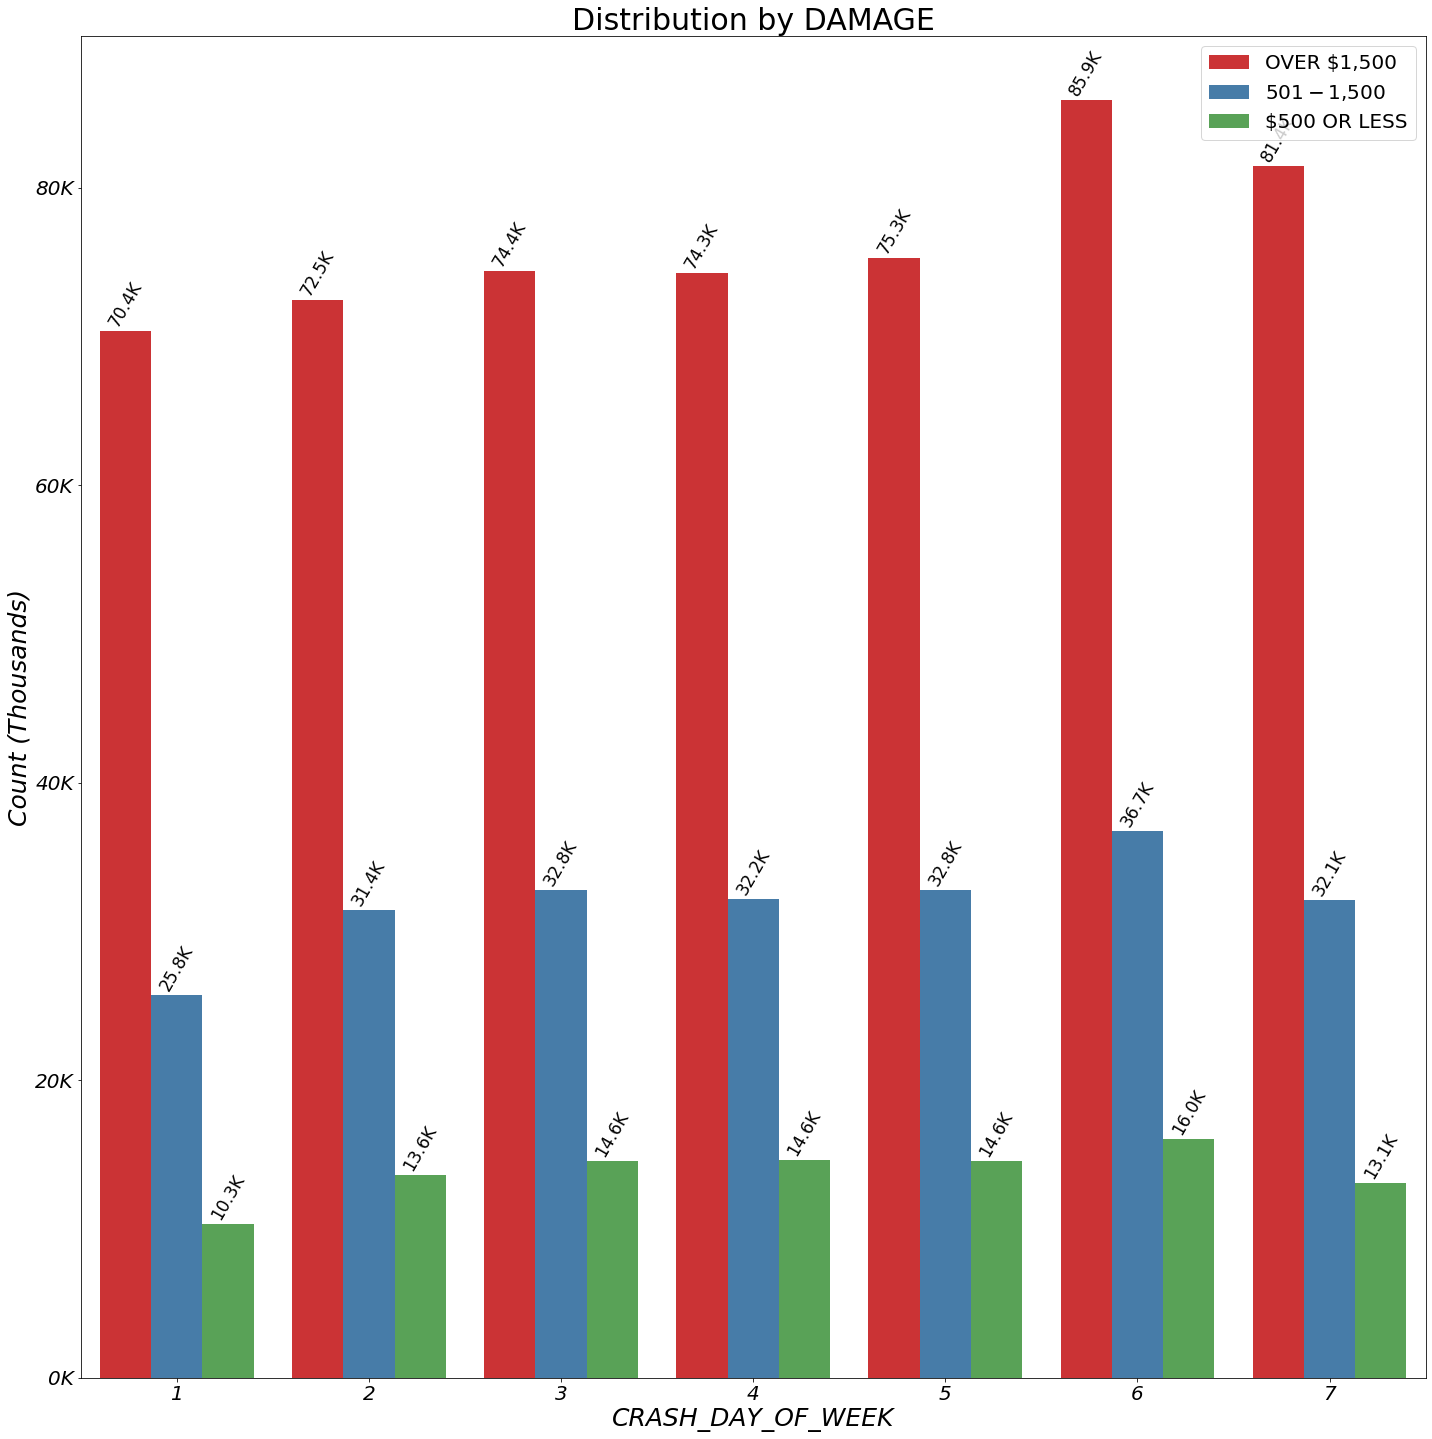

In [40]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

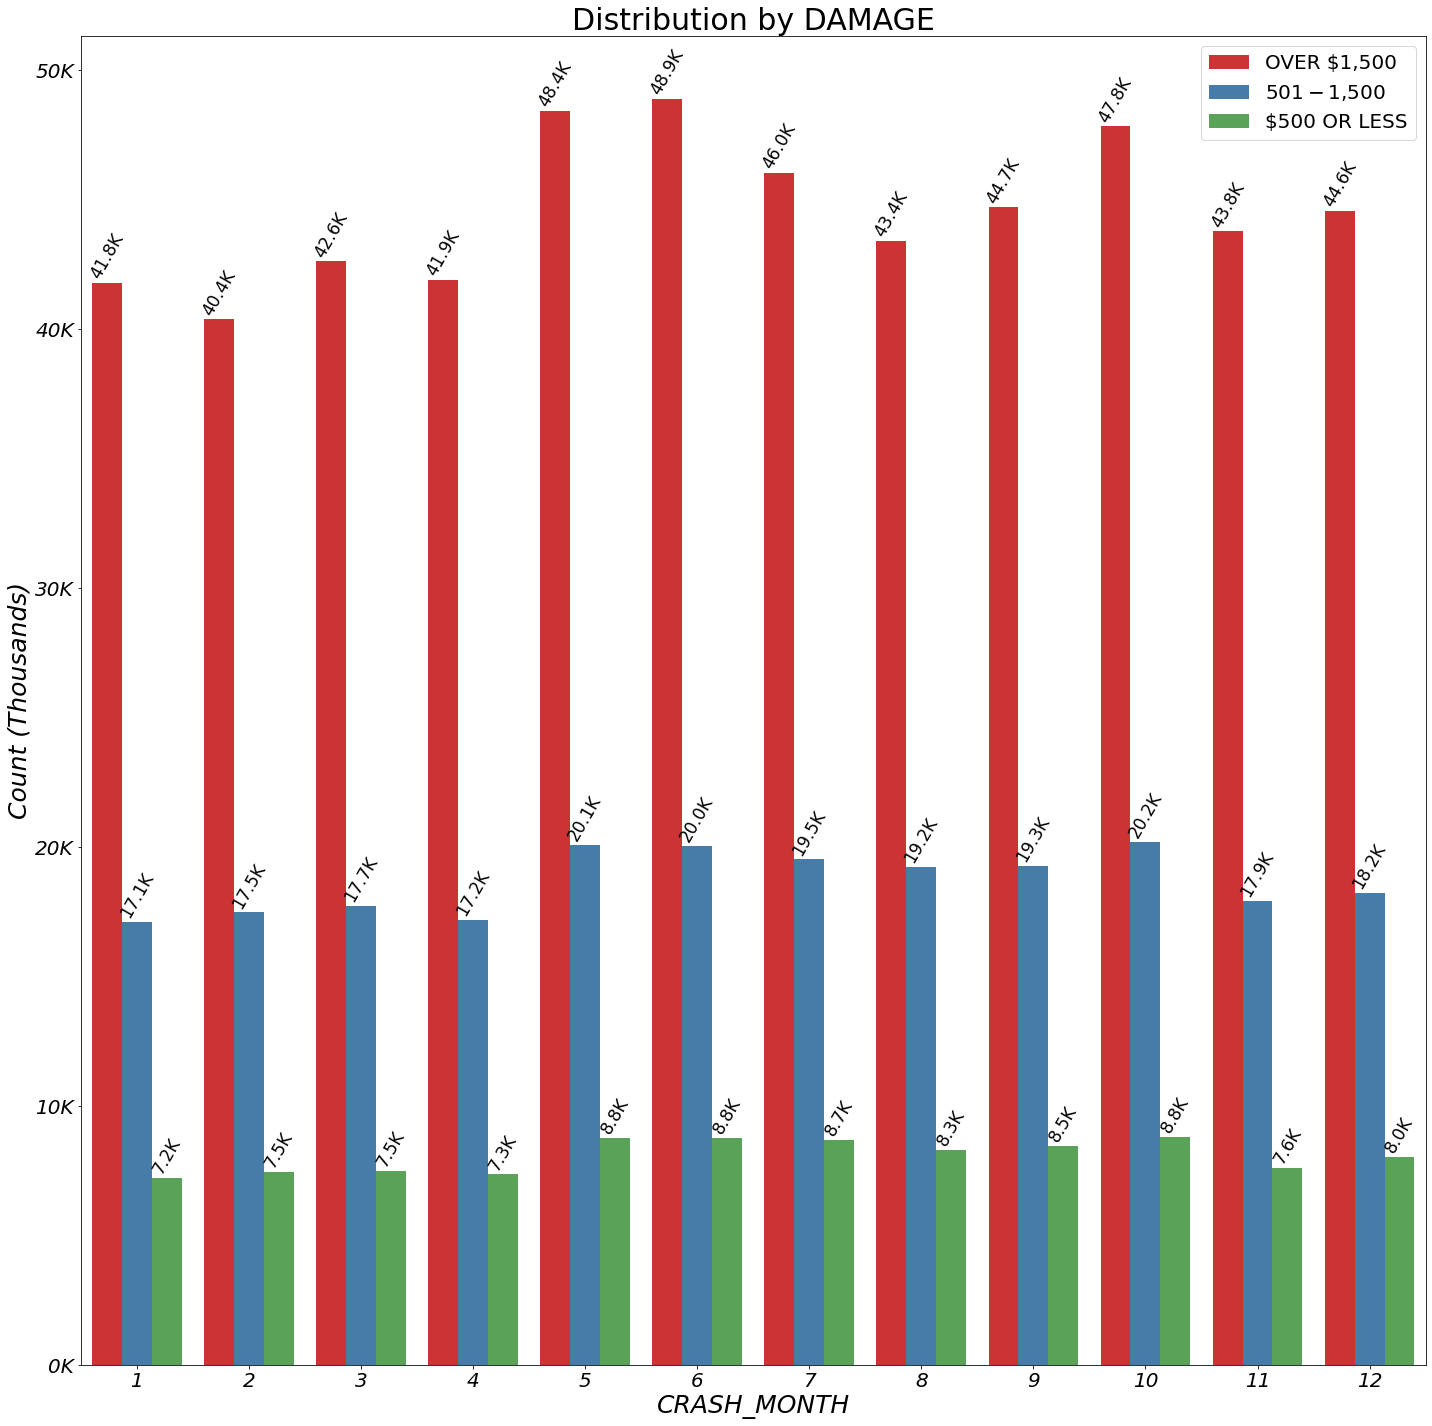

In [41]:
# count plot for 'CRASH_MONTH' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

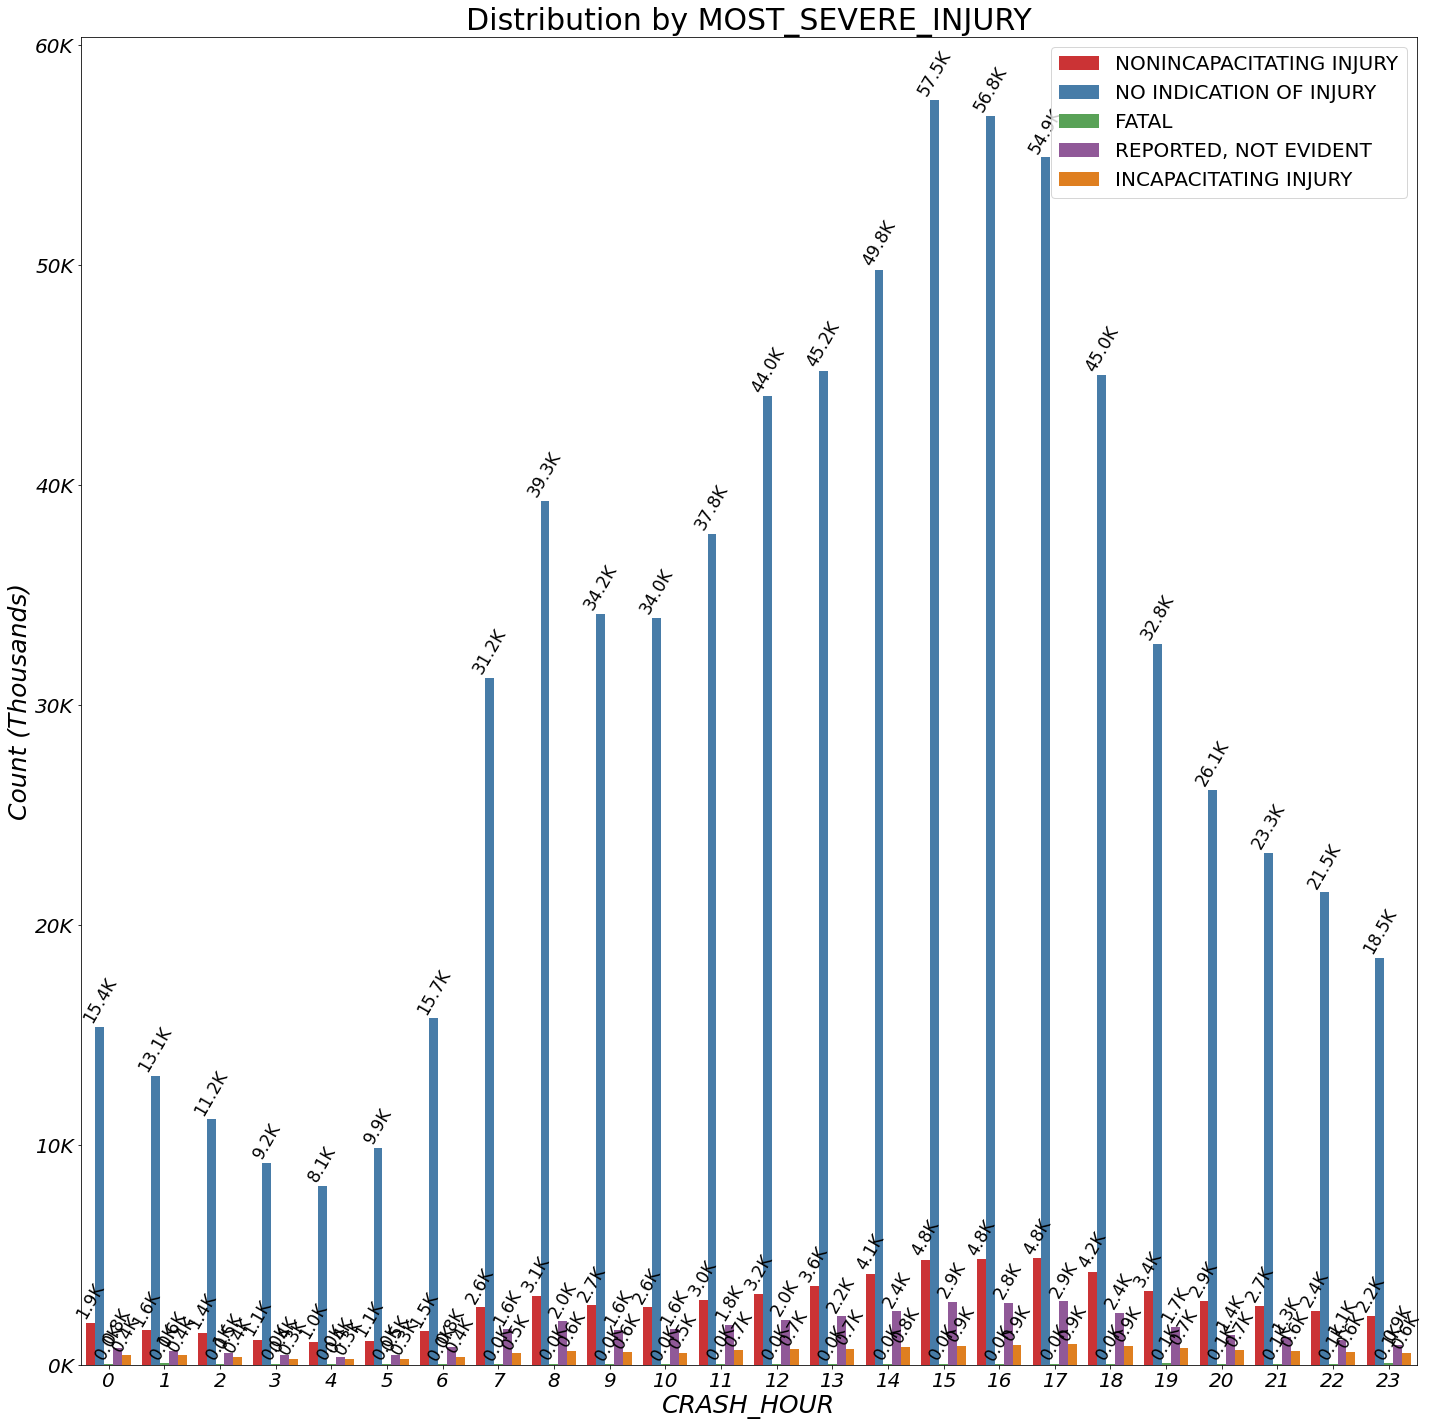

In [42]:
# count plot for 'CRASH_HOUR' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

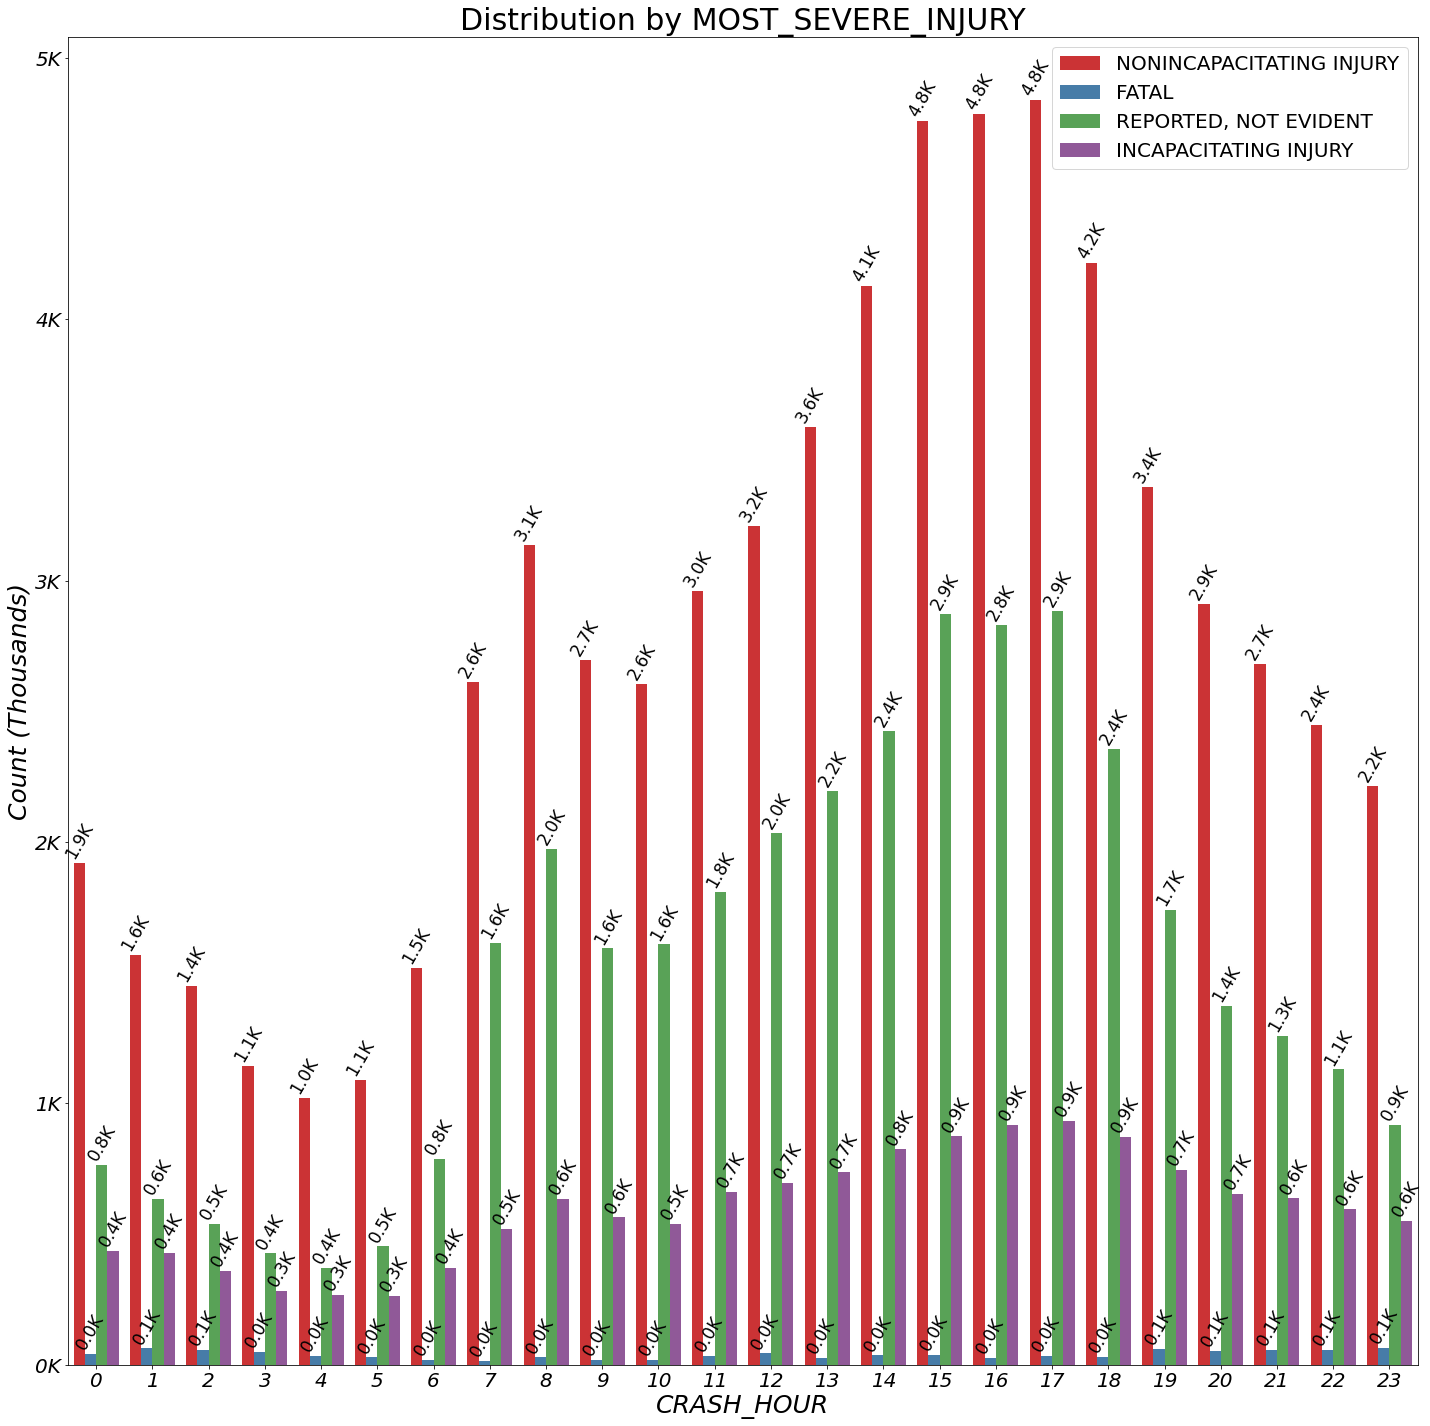

In [43]:
# filter out all non-injured crashes:
df_filtered = df_crashes[df_crashes['MOST_SEVERE_INJURY'] != 'NO INDICATION OF INJURY']

# count plot for 'CRASH_HOUR' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_filtered, 'CRASH_HOUR', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

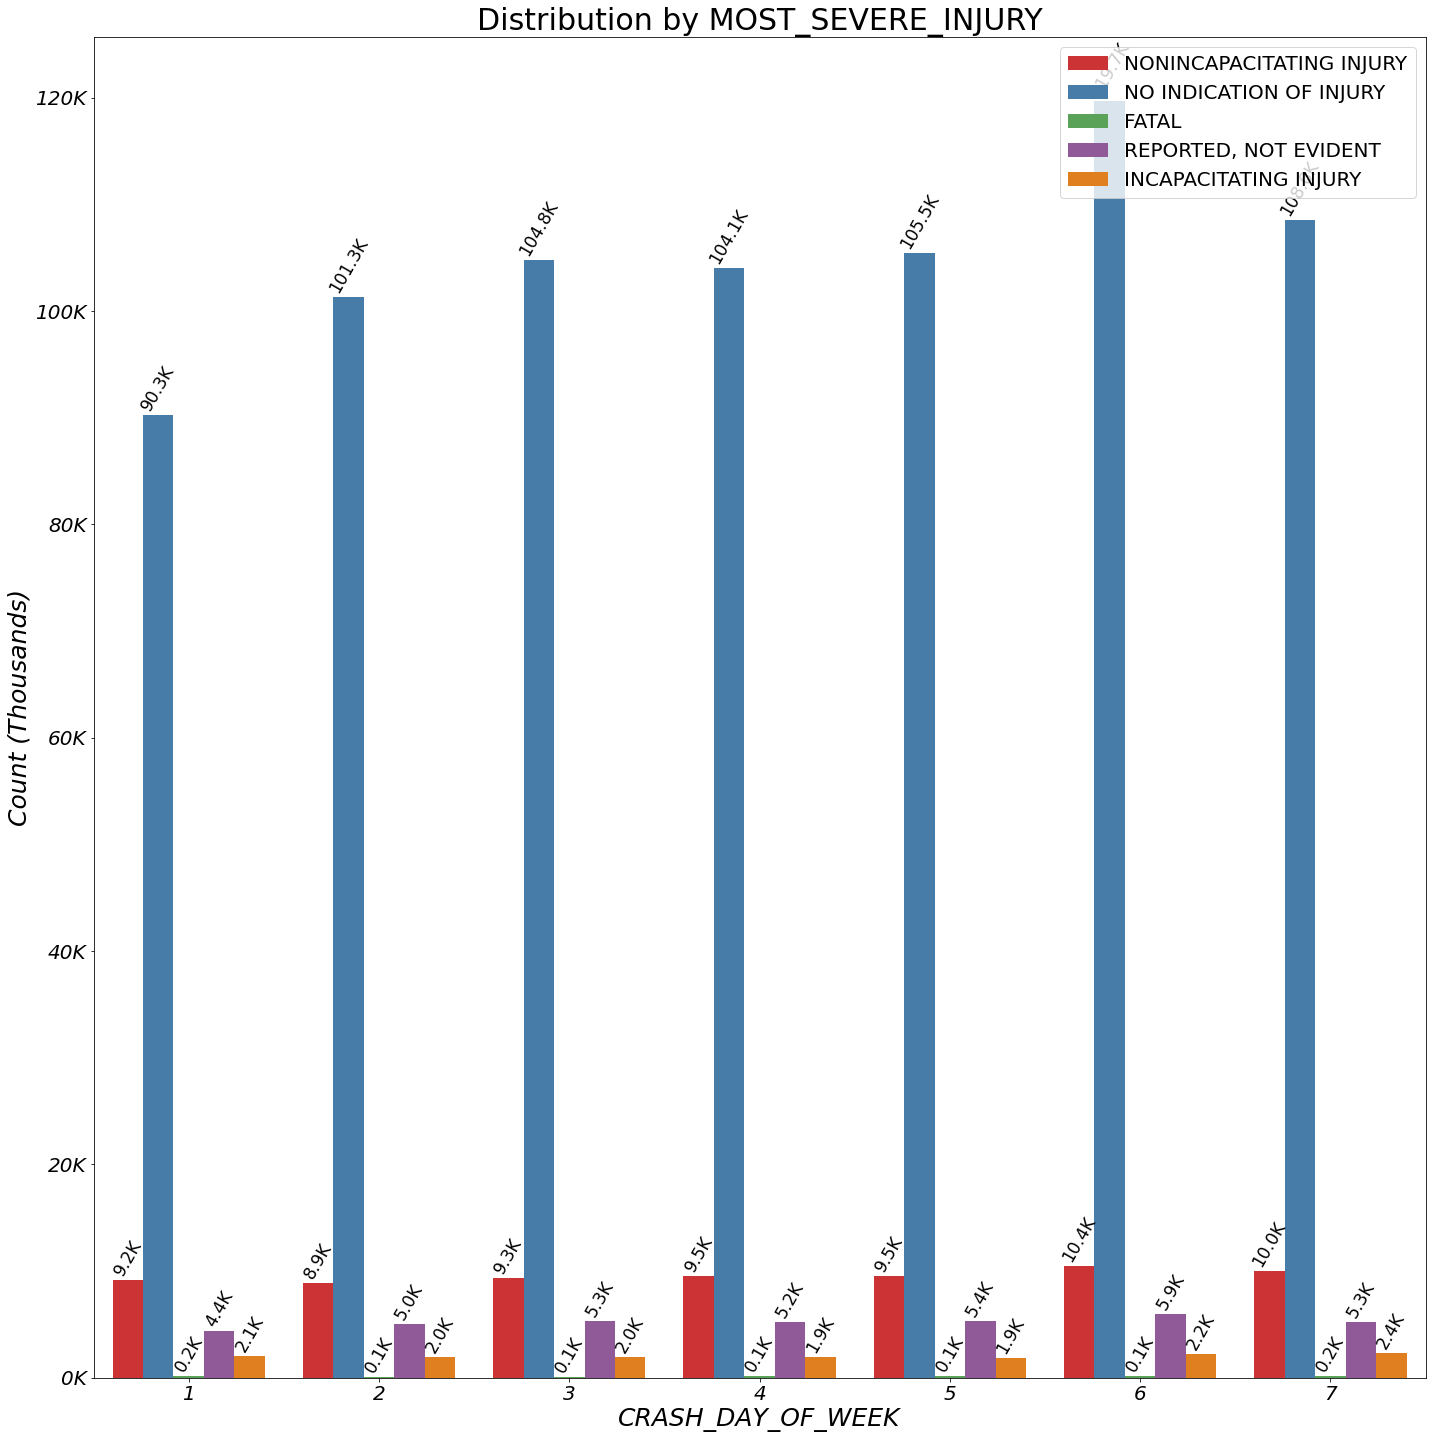

In [44]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

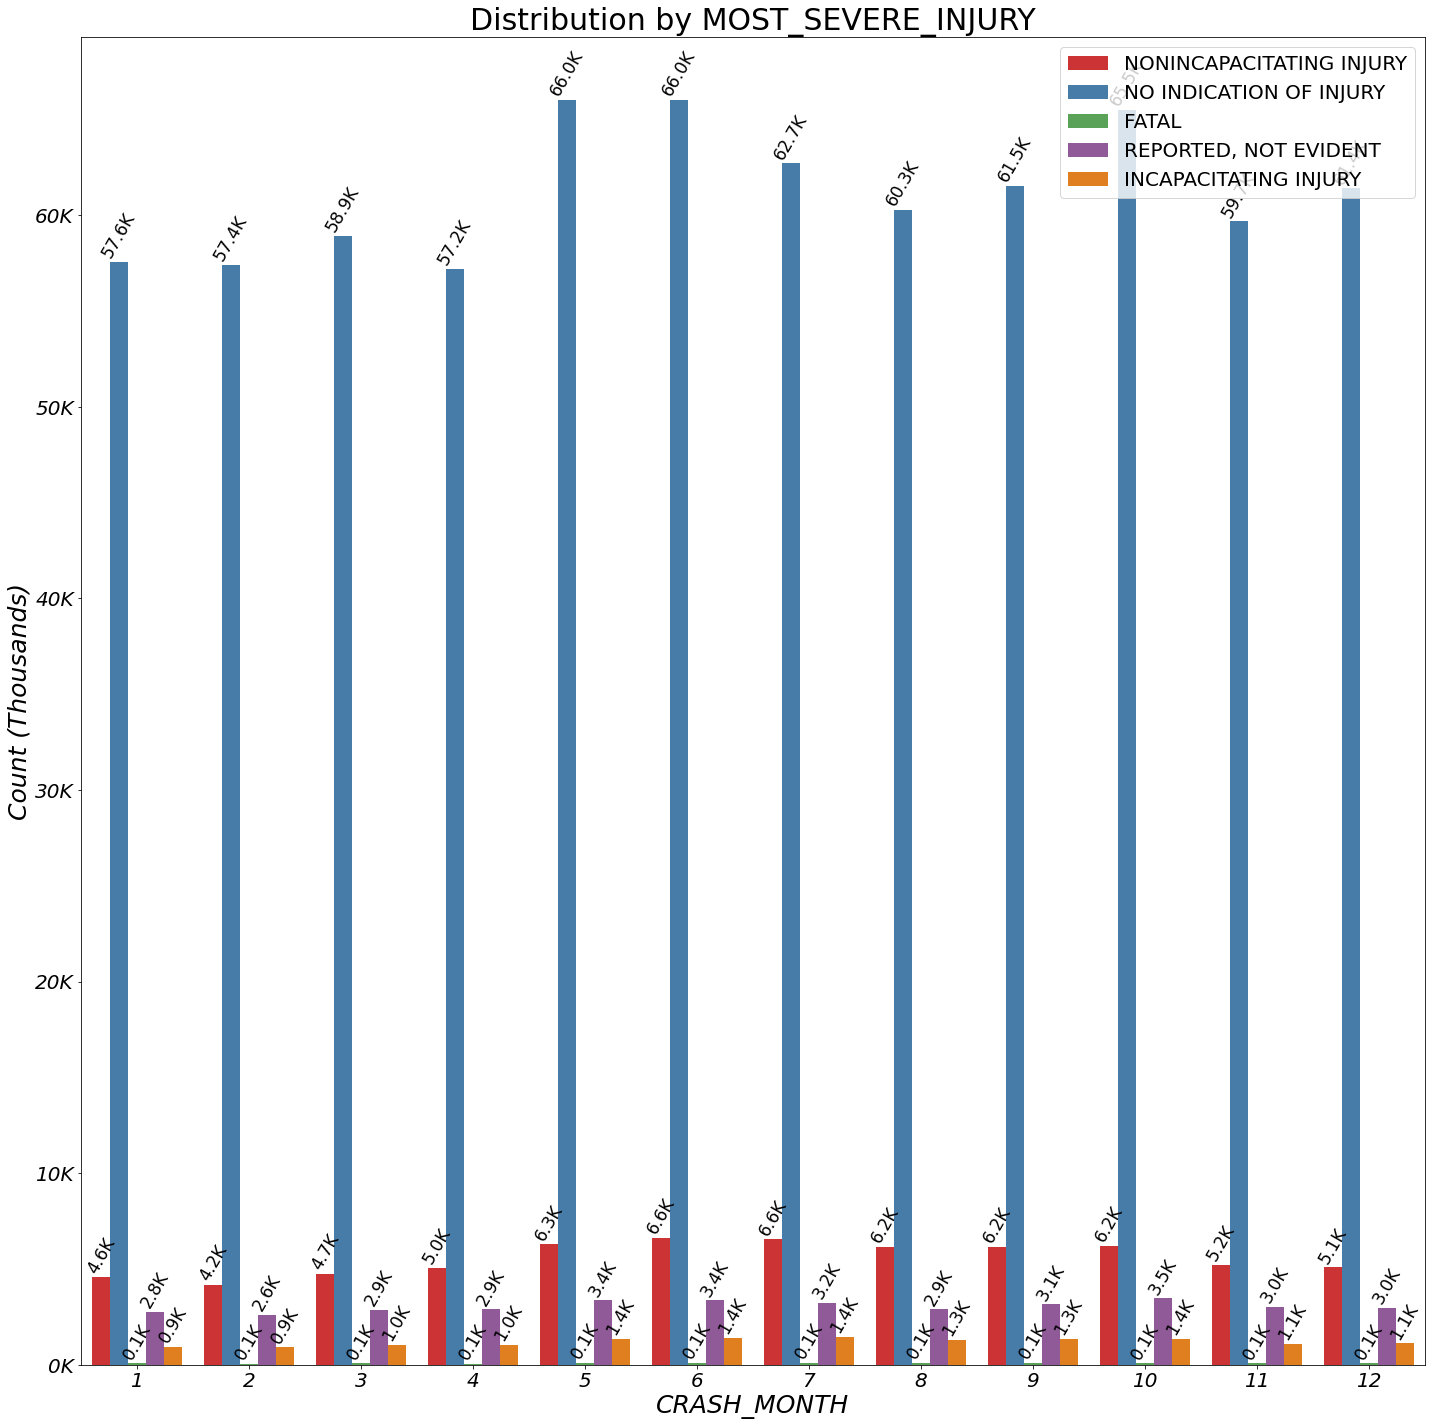

In [45]:
# count plot for 'CRASH_MONTH' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

#### Mapping datetime day of the week to `CRASH_DAY_OF_WEEK`. 

In [46]:
# select 5 random entries from 'CRASH_DAY_OF_WEEK' and 'DAY_OF_CRASH'
random_slice = df_crashes[['CRASH_DAY_OF_WEEK', 'CRASH_DATE']].sample(n=5, random_state=42)

# convert 'CRASH_DATE' to datetime if not already
random_slice['CRASH_DATE'] = pd.to_datetime(random_slice['CRASH_DATE'])

# create a new column for the day of the week based on 'CRASH_DATE'
random_slice['CRASH_DAY_OF_WEEK_STR'] = random_slice['CRASH_DATE'].dt.day_name()

random_slice.head()

CRASH_DAY_OF_WEEK          CRASH_DATE CRASH_DAY_OF_WEEK_STR
801658                  5 2019-09-12 19:21:00              Thursday
126472                  6 2024-01-05 01:30:00                Friday
384394                  5 2020-01-16 18:00:00              Thursday
675014                  2 2021-06-14 11:00:00                Monday
475391                  4 2019-08-07 18:20:00             Wednesday

### Initial Overview of Contributory Cause, Injury Severity, and Damages by Crash Date and Time.

* Crash Time (of the day) has a significant impact on both the damages and the injuries: we can clearly see the commute/business hours having up to 3x crashes.
* After filtering out crashes with no injuries, we can see there's an increase in crashes with incapacitating injuries starting in the morning hours, remainig steady throughout the day.
* There's a significant increase in fatal crashes from 7 pm to 2 am. 
* Crash Day (Sunday is coded as 1) has mild impact with Friday (coded as 6) having the most crashes and Sunday having the least.
* Crash Month has the least impact, with May, June being the highest, followed by October (maybe change in weather condition).

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Lightning Condition.

Here we'll look at the distribution of damages, injuries, and causes by `LIGHTING_CONDITION` type.

In [47]:
(df_crashes['LIGHTING_CONDITION']).value_counts()

DAYLIGHT                  549114
DARKNESS, LIGHTED ROAD    187184
DARKNESS                   40354
UNKNOWN                    39616
DUSK                       24395
DAWN                       14247
Name: LIGHTING_CONDITION, dtype: int64

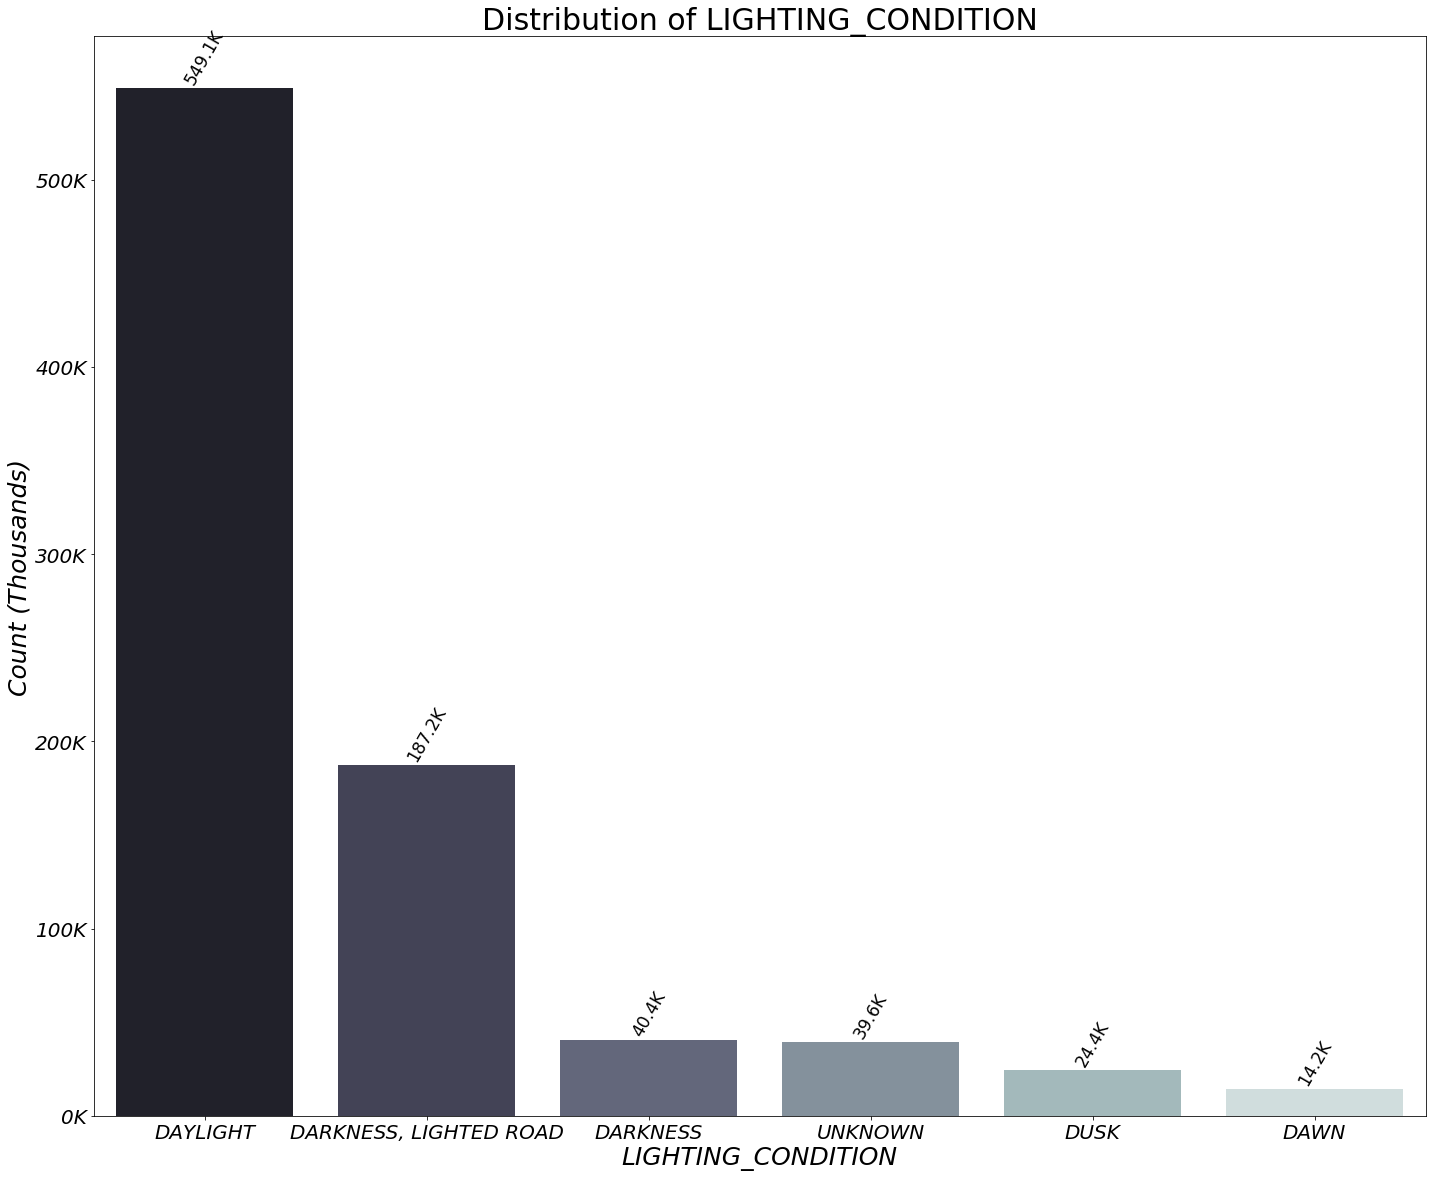

In [48]:
# count plot for 'LIGHTING_CONDITION' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

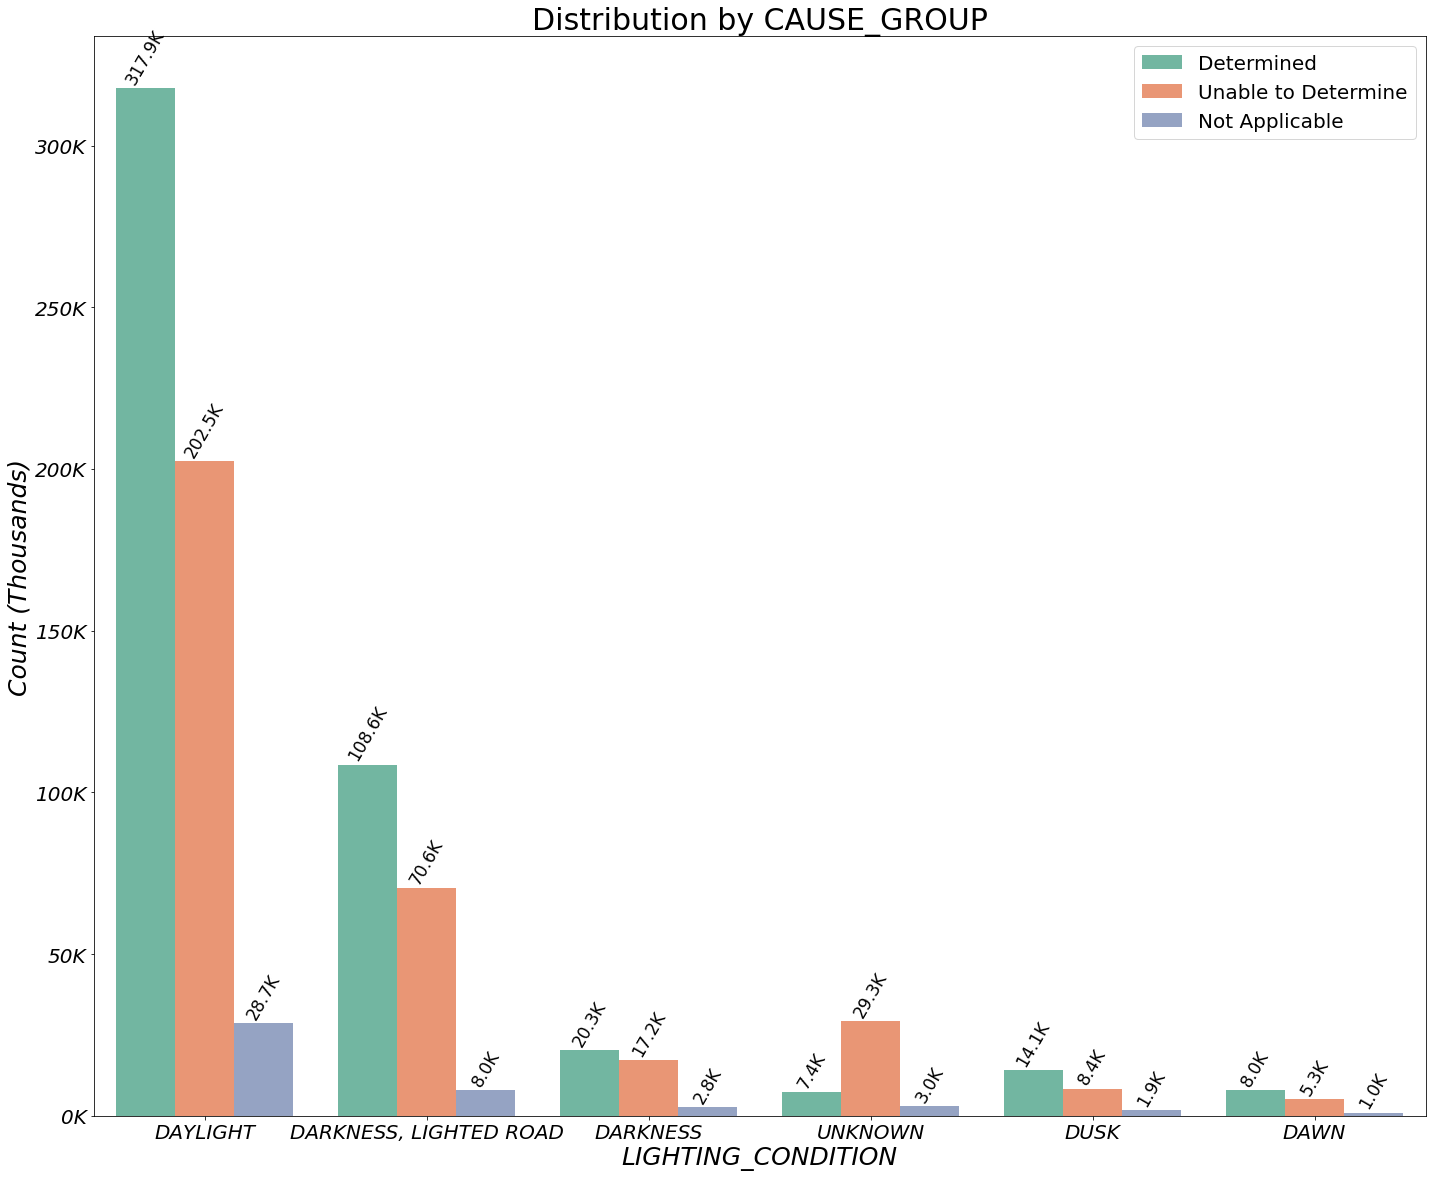

In [49]:
# count plot for 'LIGHTING_CONDITION' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

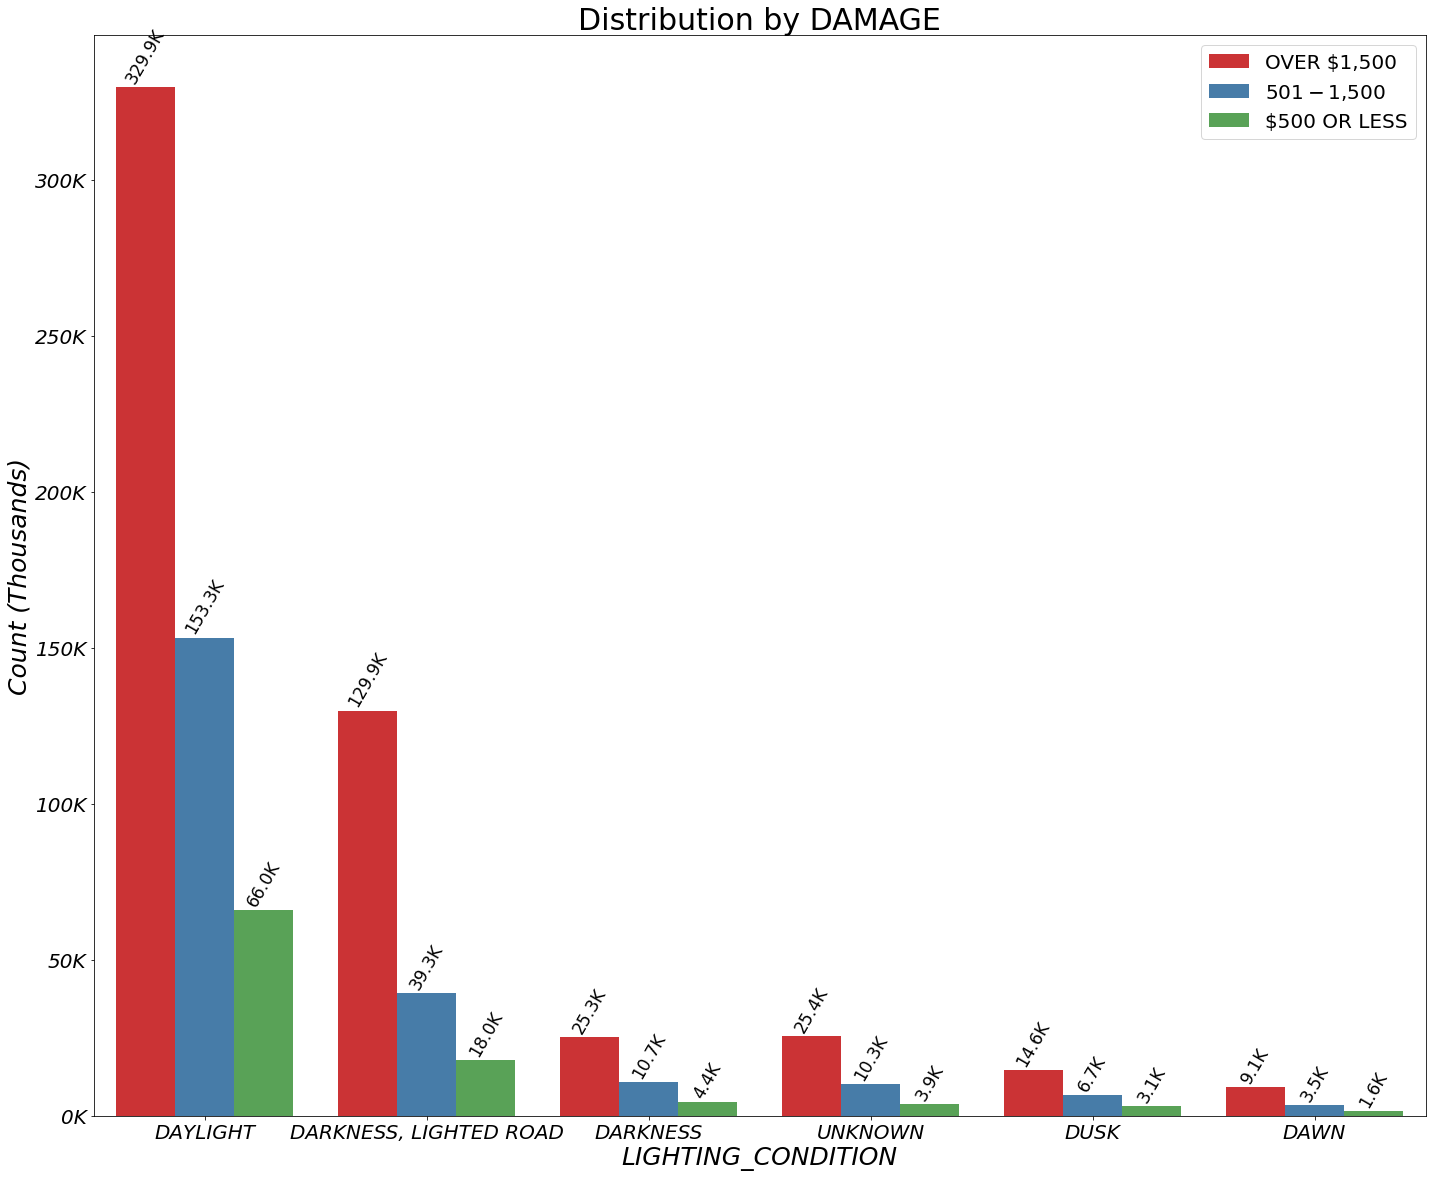

In [50]:
# count plot for 'LIGHTING_CONDITION' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

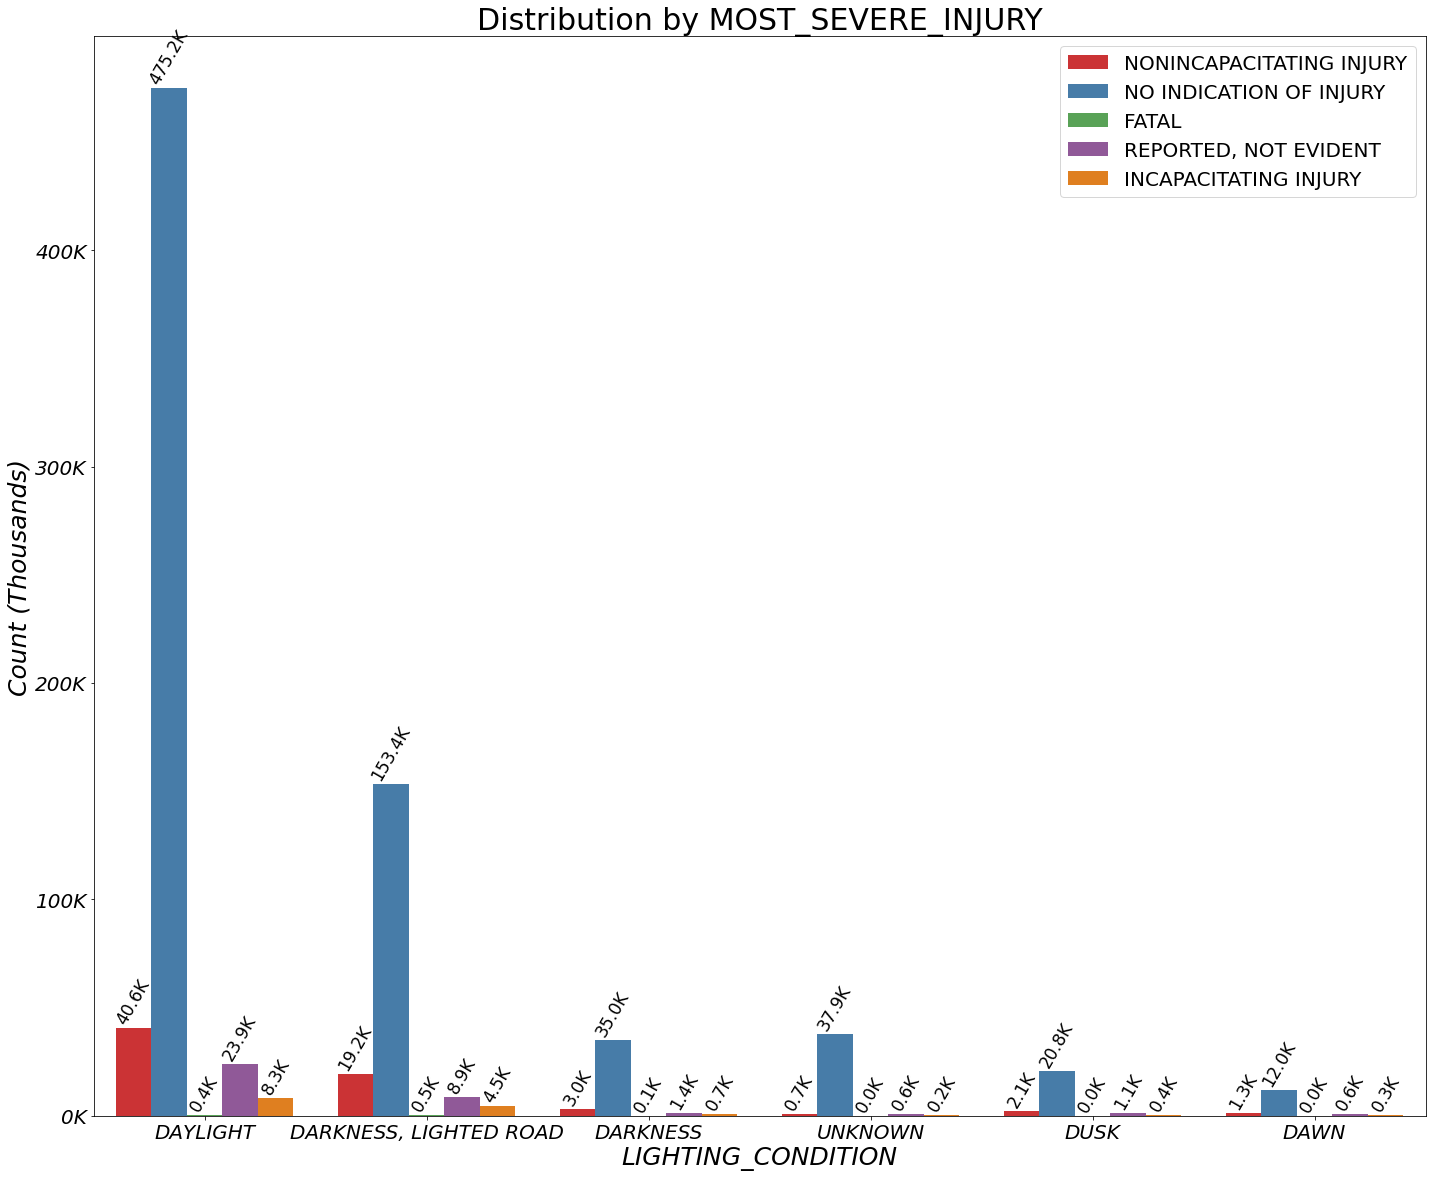

In [51]:
# count plot for 'LIGHTING_CONDITION' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Lightning Condition.

* Most Crashes occur in Daylight or in Darkness/Lighted Road.
* Most high-damage crashes also occur in daylight or Darkness/Lighted Road.
* Most non-incapaciting and incapacitating injuries occur in Daylight or in Darkness/Lighted Road.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Trafficway Type.

Here we'll look at the distribution of damages, injuries, and causes by `TRAFFICWAY_TYPE` type.

In [52]:
(df_crashes['TRAFFICWAY_TYPE']).value_counts()

NOT DIVIDED                        369688
DIVIDED - W/MEDIAN (NOT RAISED)    135871
ONE-WAY                            108673
PARKING LOT                         58069
FOUR WAY                            56596
DIVIDED - W/MEDIAN BARRIER          48606
OTHER                               23253
ALLEY                               14104
T-INTERSECTION                      11311
UNKNOWN                             10016
CENTER TURN LANE                     6130
DRIVEWAY                             2774
RAMP                                 2679
UNKNOWN INTERSECTION TYPE            2590
FIVE POINT, OR MORE                  1243
Y-INTERSECTION                       1216
TRAFFIC ROUTE                        1010
NOT REPORTED                          624
ROUNDABOUT                            280
L-INTERSECTION                        177
Name: TRAFFICWAY_TYPE, dtype: int64

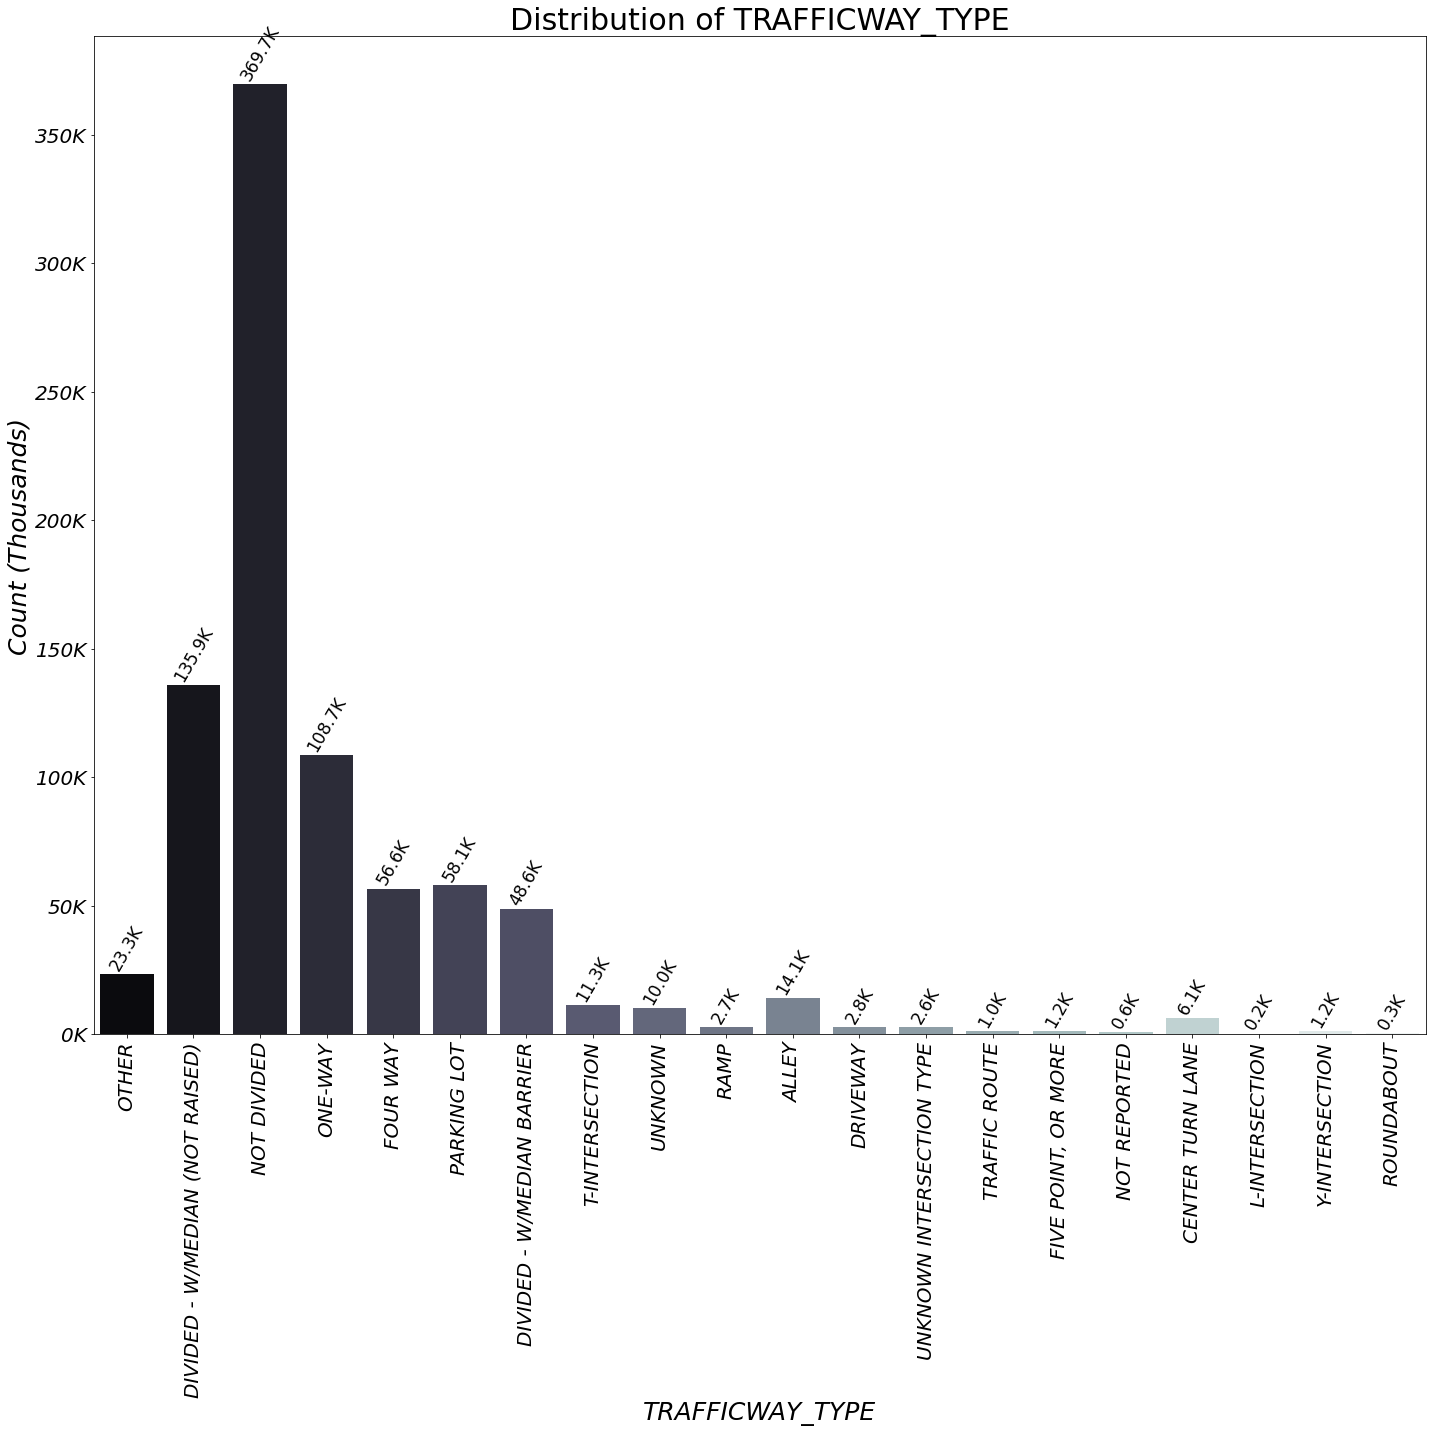

In [53]:
# count plot for 'TRAFFICWAY_TYPE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

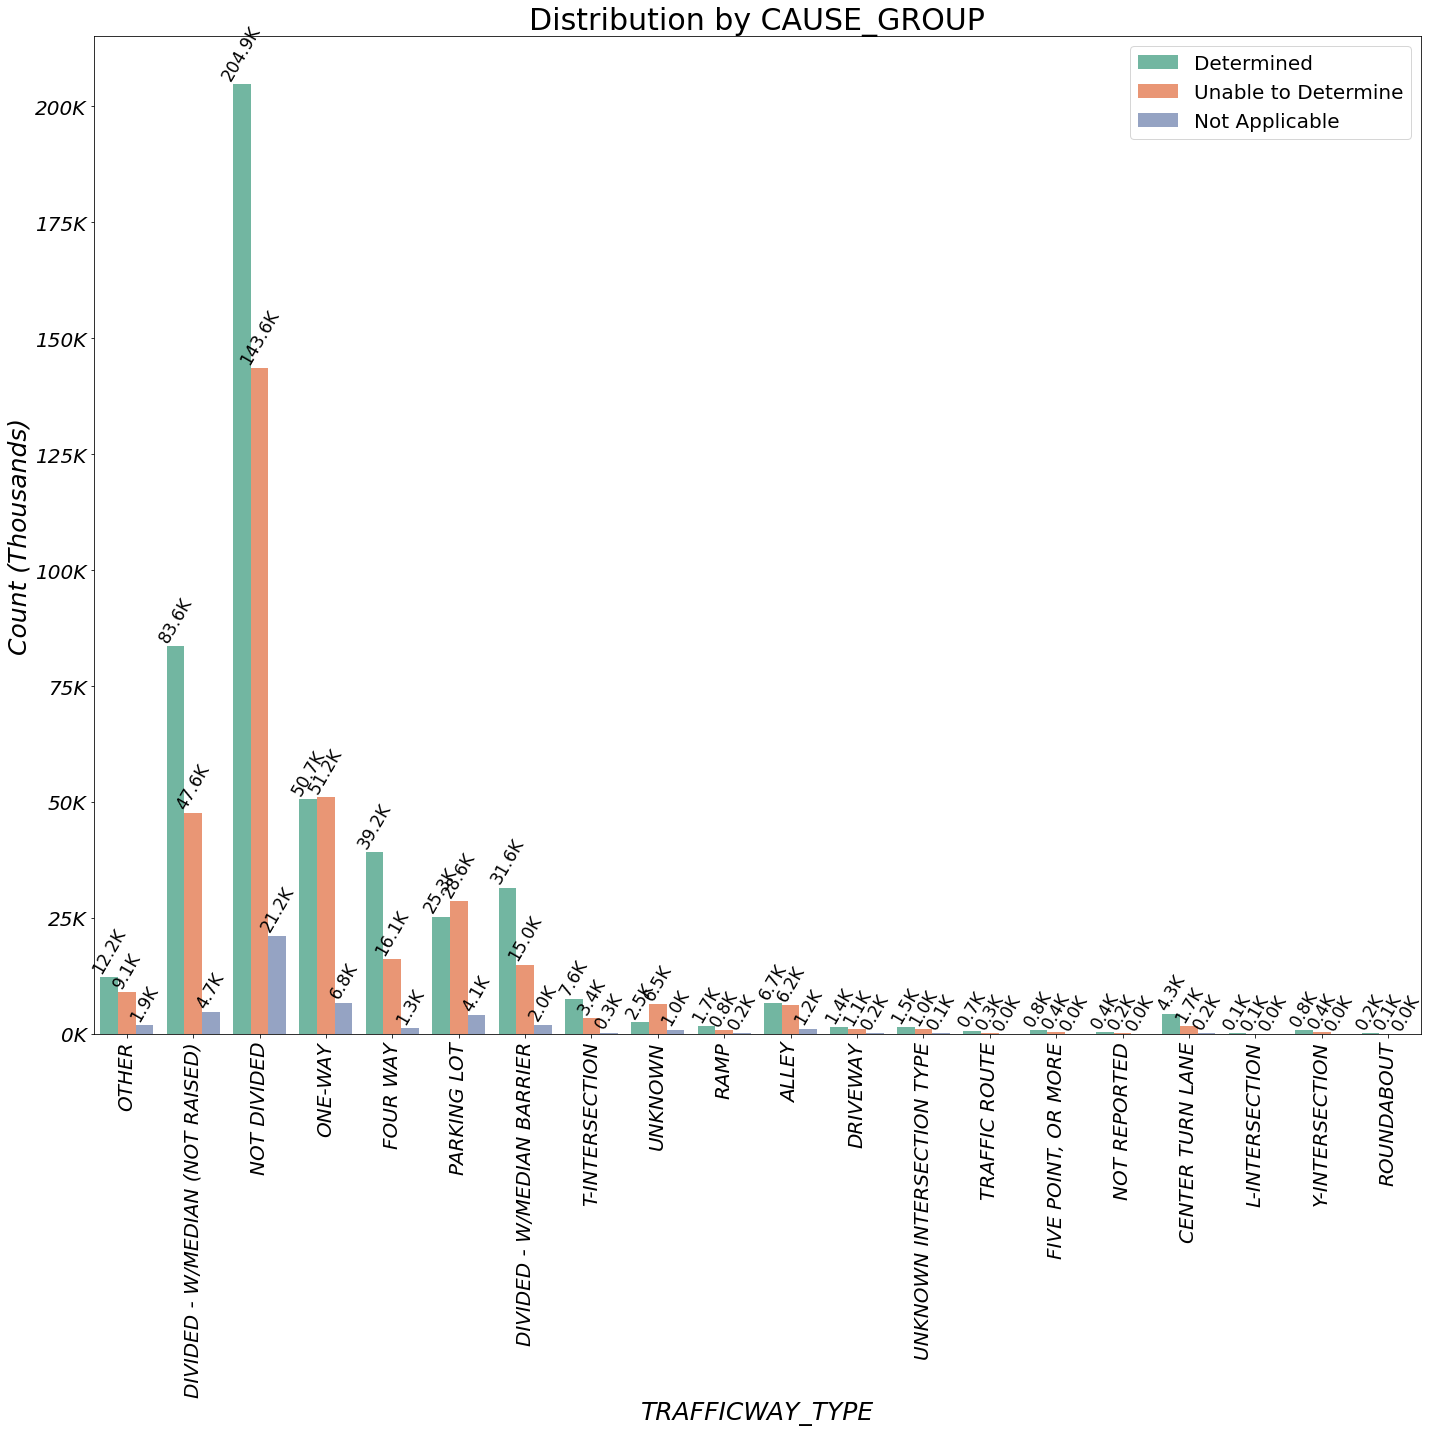

In [54]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

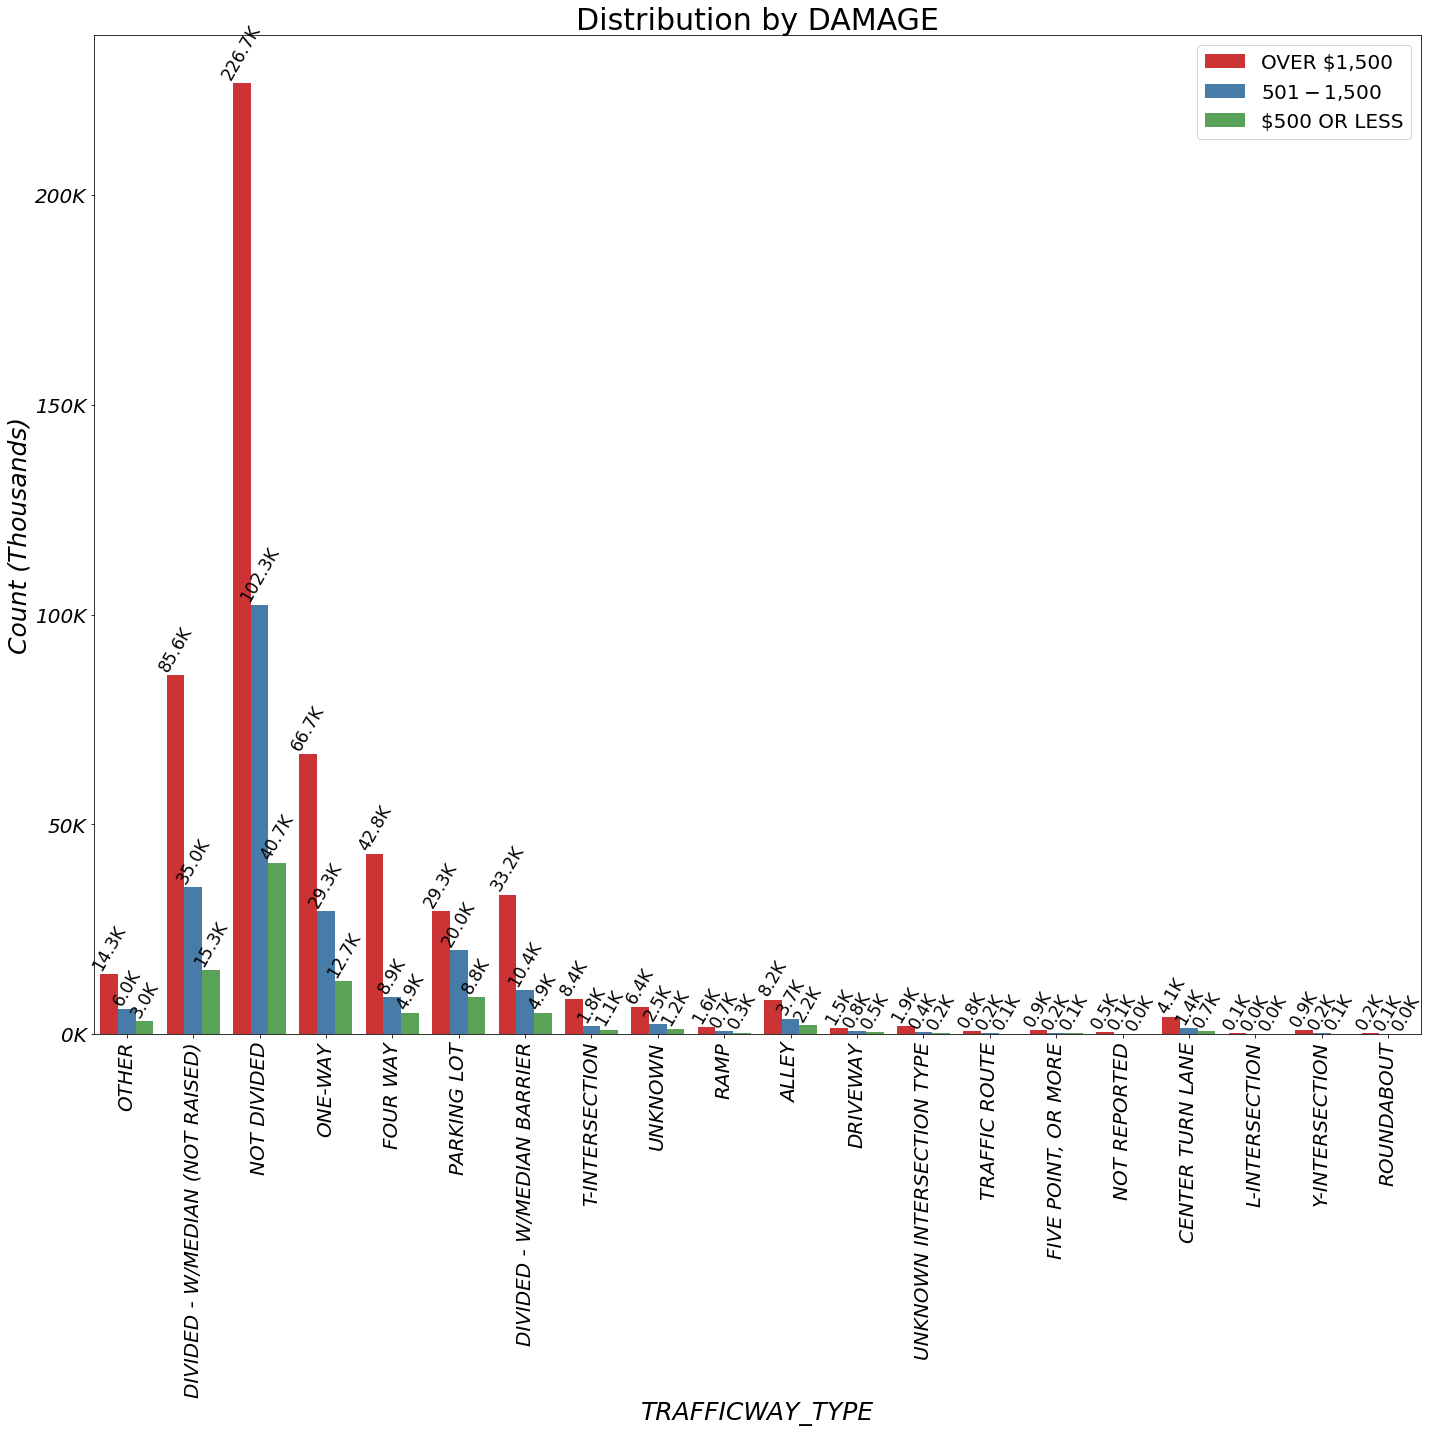

In [55]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

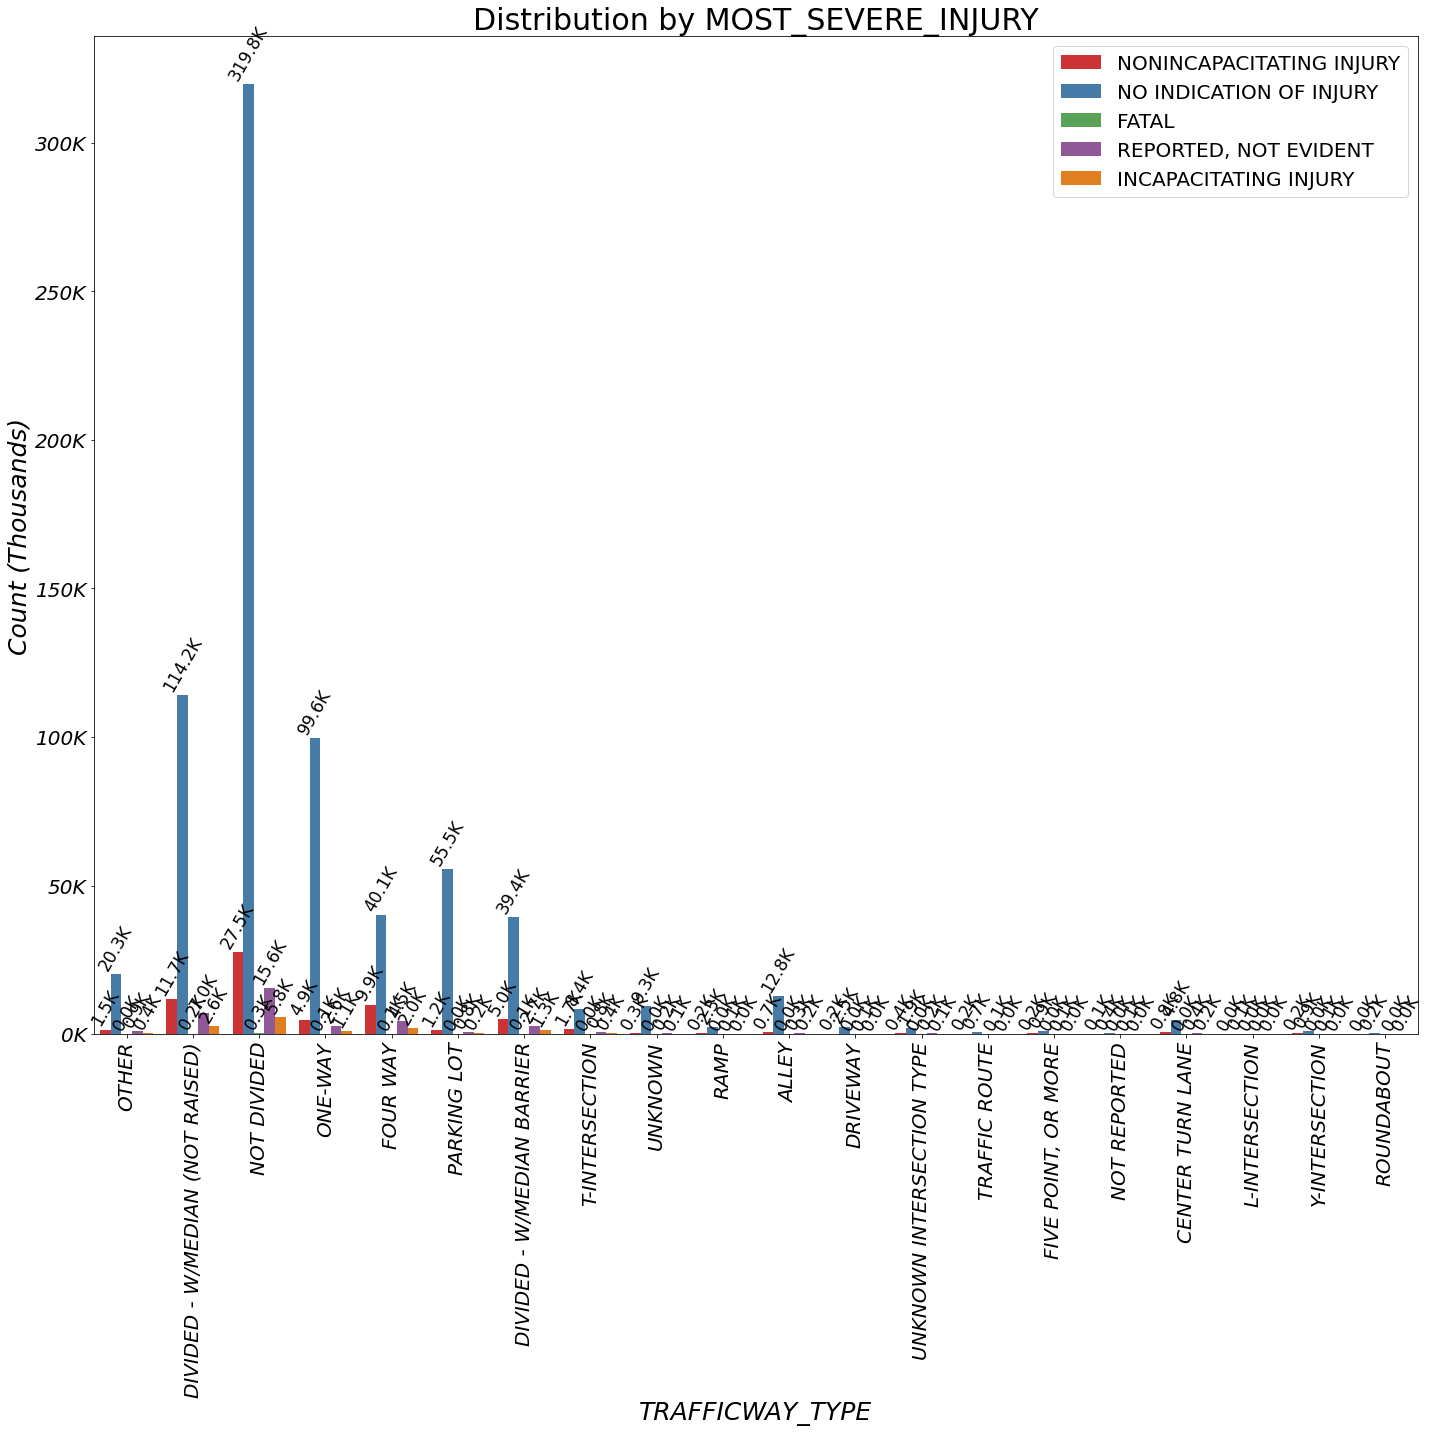

In [56]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

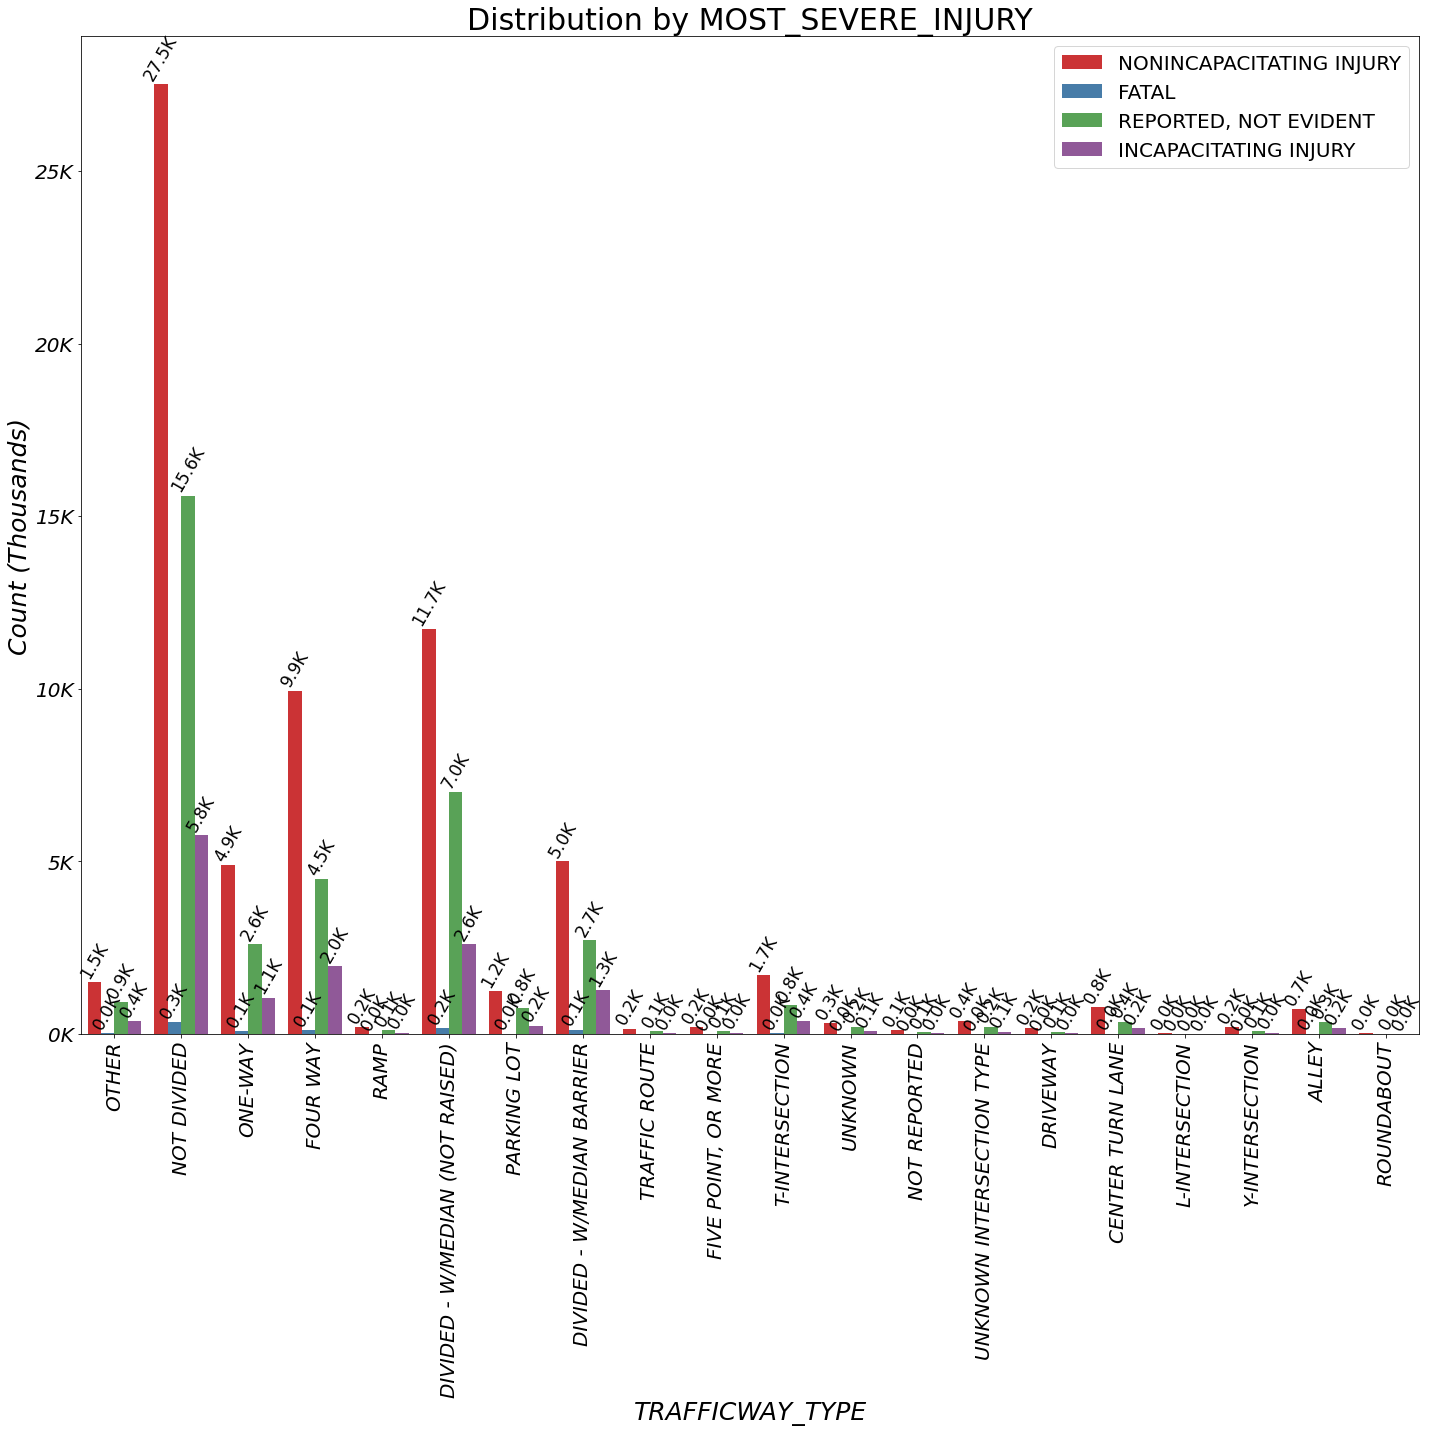

In [57]:
# filter out all non-injured crashes:
df_filtered = df_crashes[df_crashes['MOST_SEVERE_INJURY'] != 'NO INDICATION OF INJURY']

# count plot for 'CRASH_HOUR' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_filtered, 'TRAFFICWAY_TYPE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, Damages by Trafficway Type.

* Most crashes are happening on undivided road, followed by divided road, one way, and parking lot.
* Crashes with most fatal/incapacitating injuries happen on 2-way roads without physical divider.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Traffic Control Device.

Here we'll look at the distribution of damages, injuries, and causes by `TRAFFIC_CONTROL_DEVICE` type.

In [58]:
(df_crashes['TRAFFIC_CONTROL_DEVICE']).value_counts()

NO CONTROLS                 485136
TRAFFIC SIGNAL              237016
STOP SIGN/FLASHER            84730
UNKNOWN                      35197
OTHER                         5807
YIELD                         1264
LANE USE MARKING              1226
OTHER REG. SIGN                977
OTHER WARNING SIGN             693
PEDESTRIAN CROSSING SIGN       566
RAILROAD CROSSING GATE         554
FLASHING CONTROL SIGNAL        351
DELINEATORS                    341
SCHOOL ZONE                    320
POLICE/FLAGMAN                 289
OTHER RAILROAD CROSSING        188
RR CROSSING SIGN               173
NO PASSING                      52
BICYCLE CROSSING SIGN           30
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

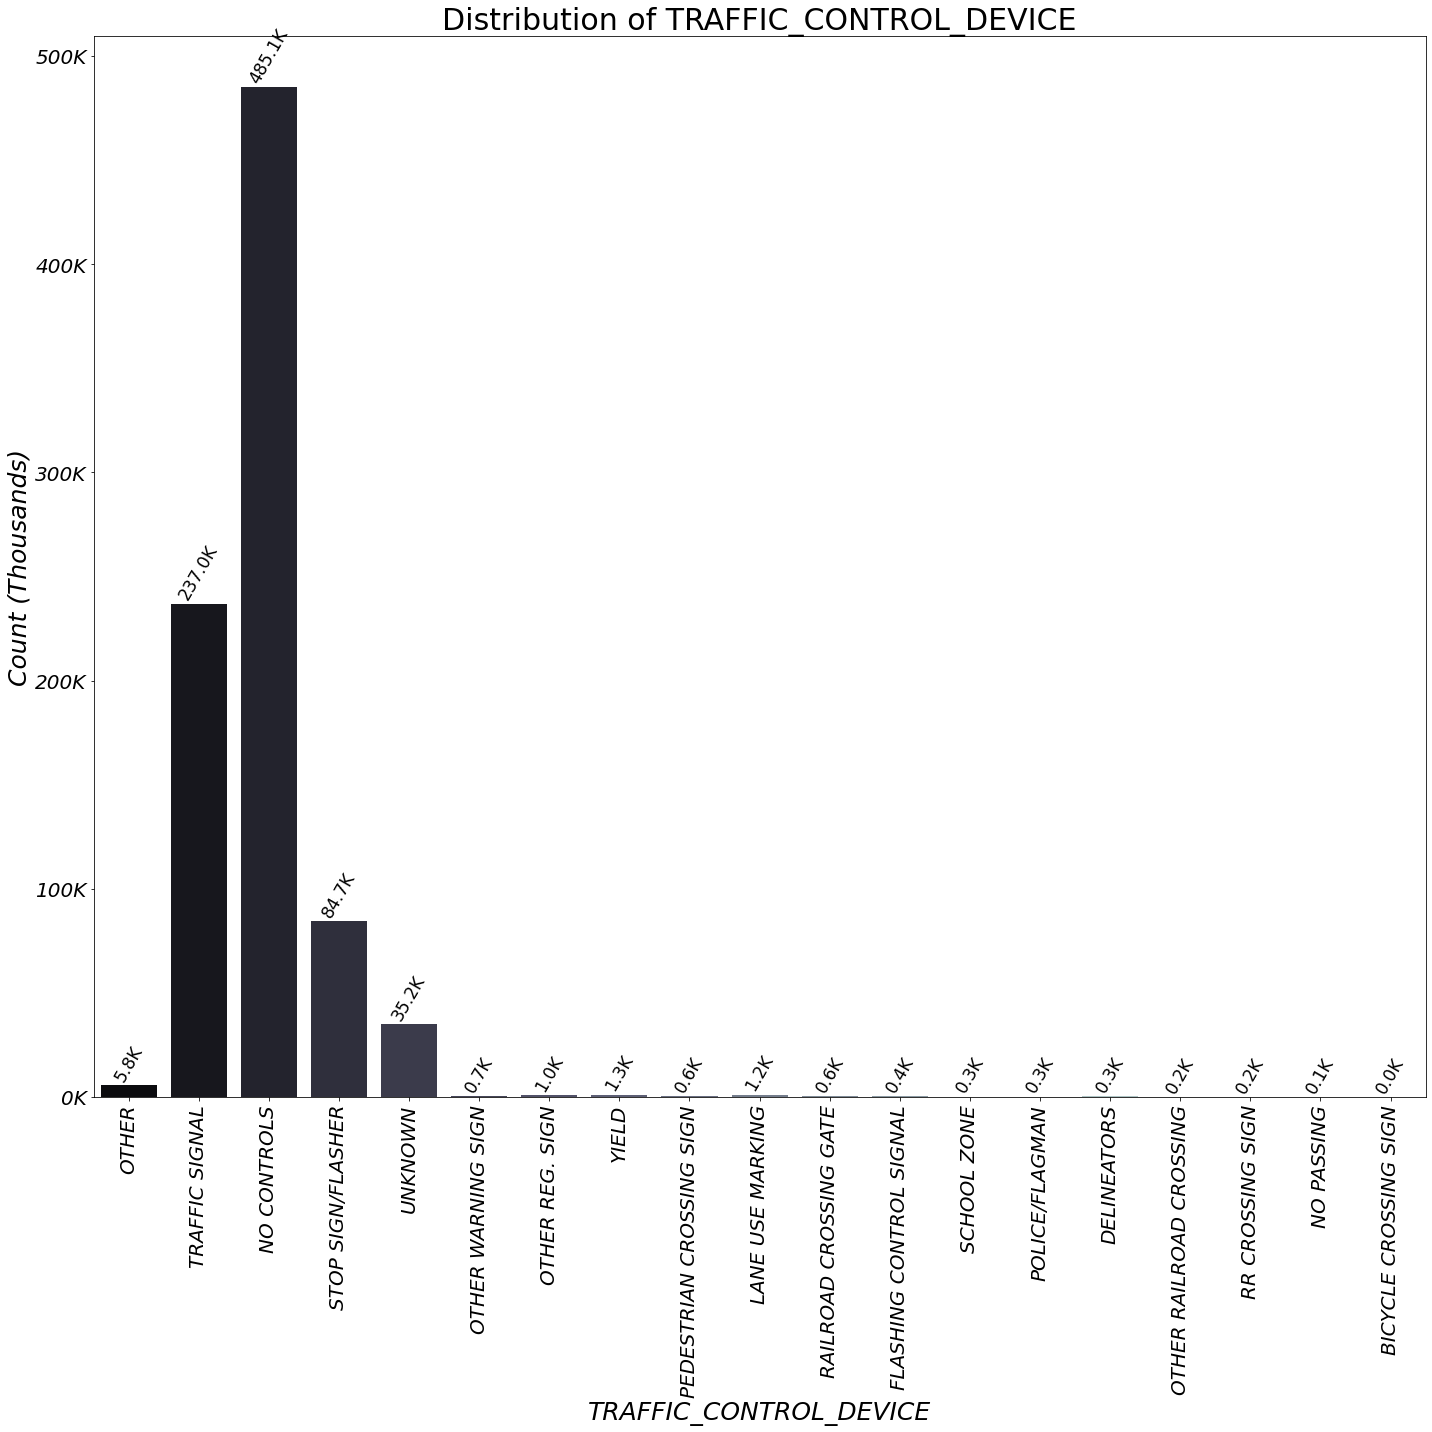

In [59]:
# count plot for 'TRAFFIC_CONTROL_DEVICE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

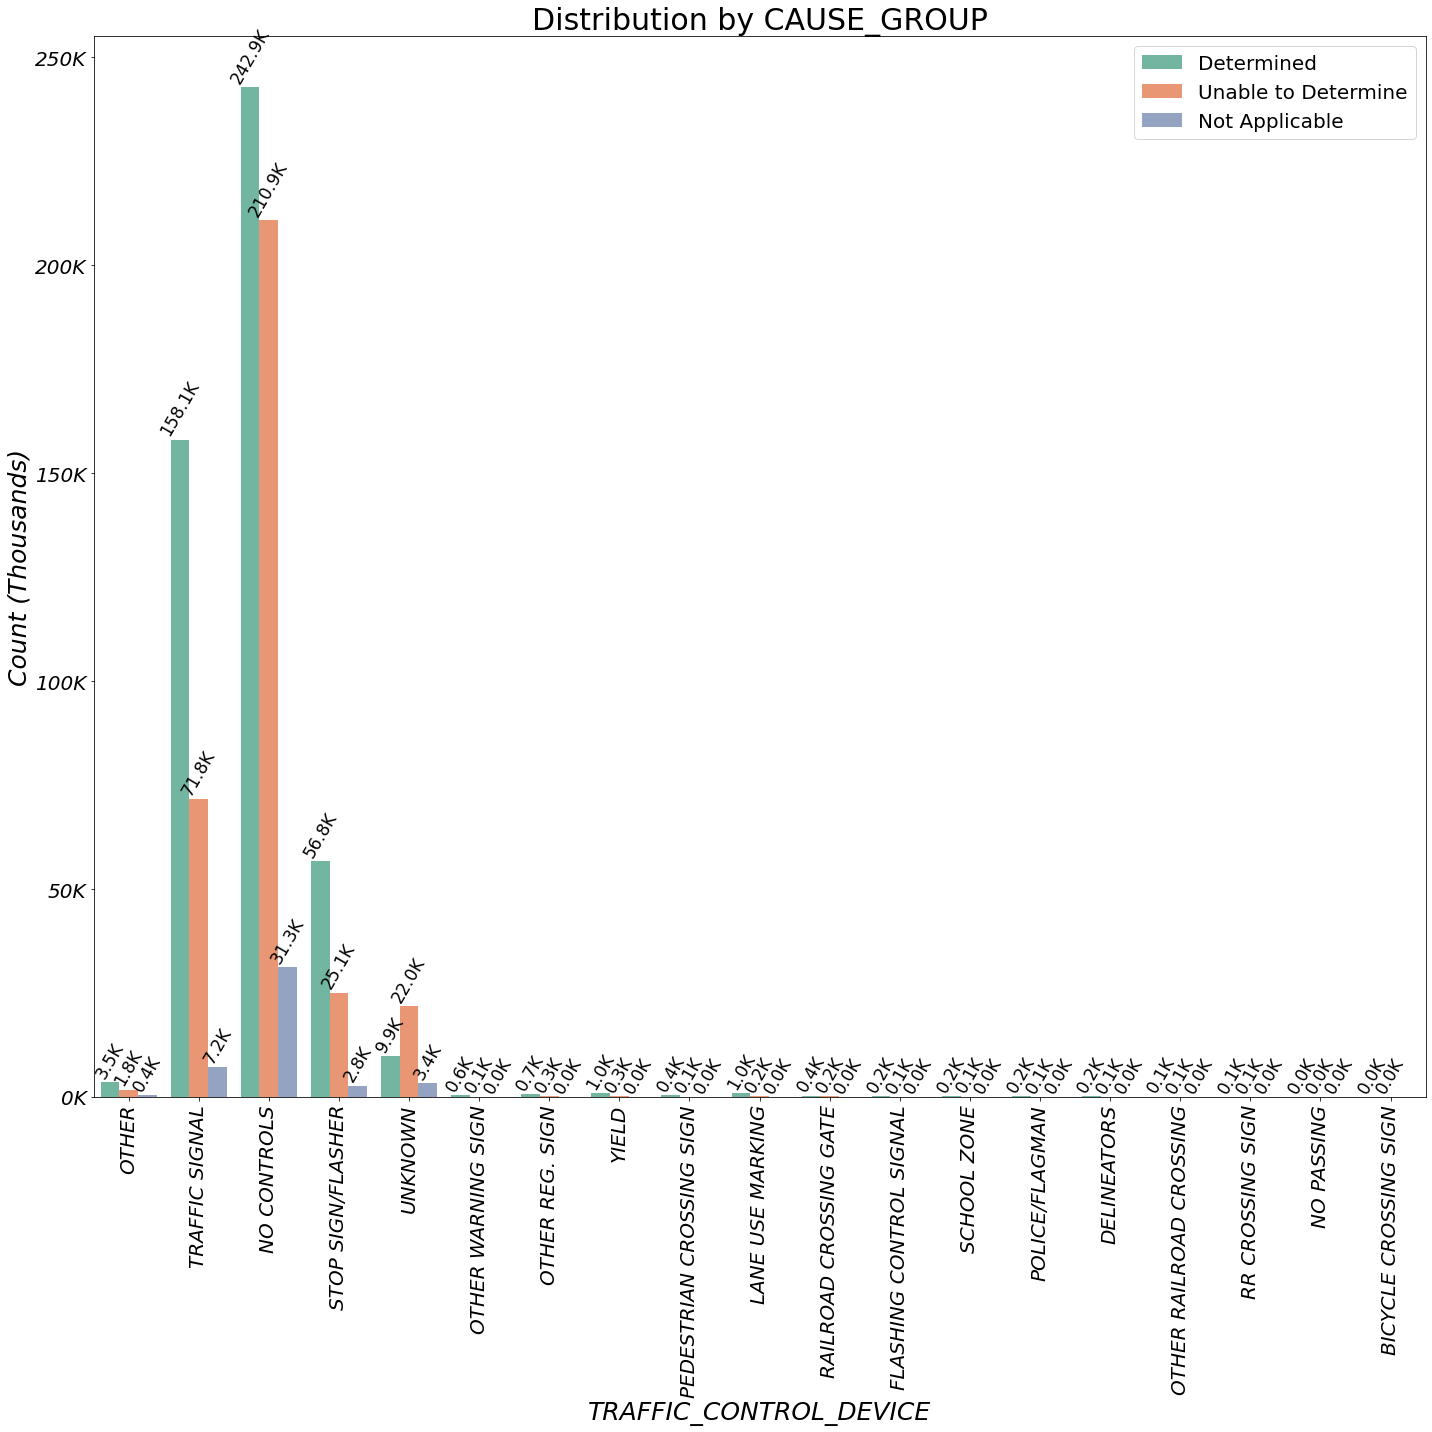

In [60]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'CAUSE_GROUP', 'Set2')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

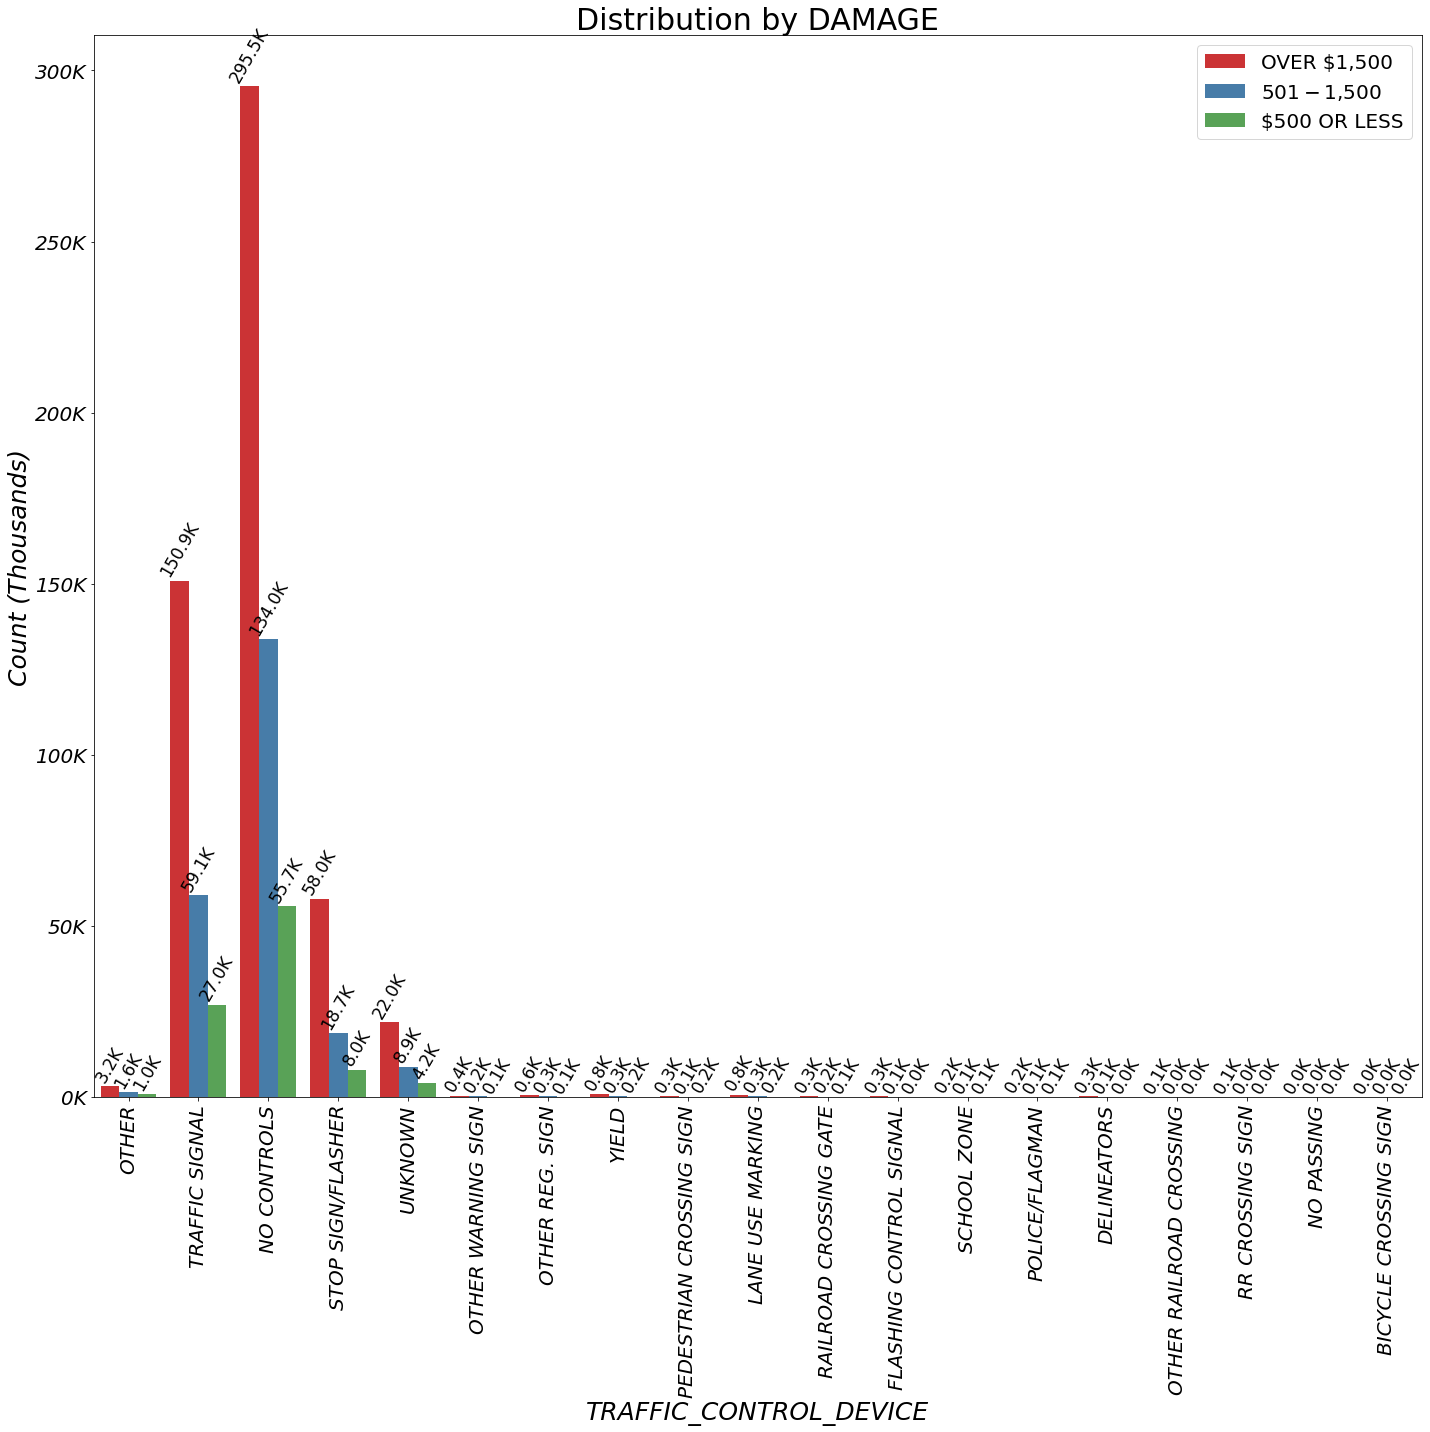

In [61]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

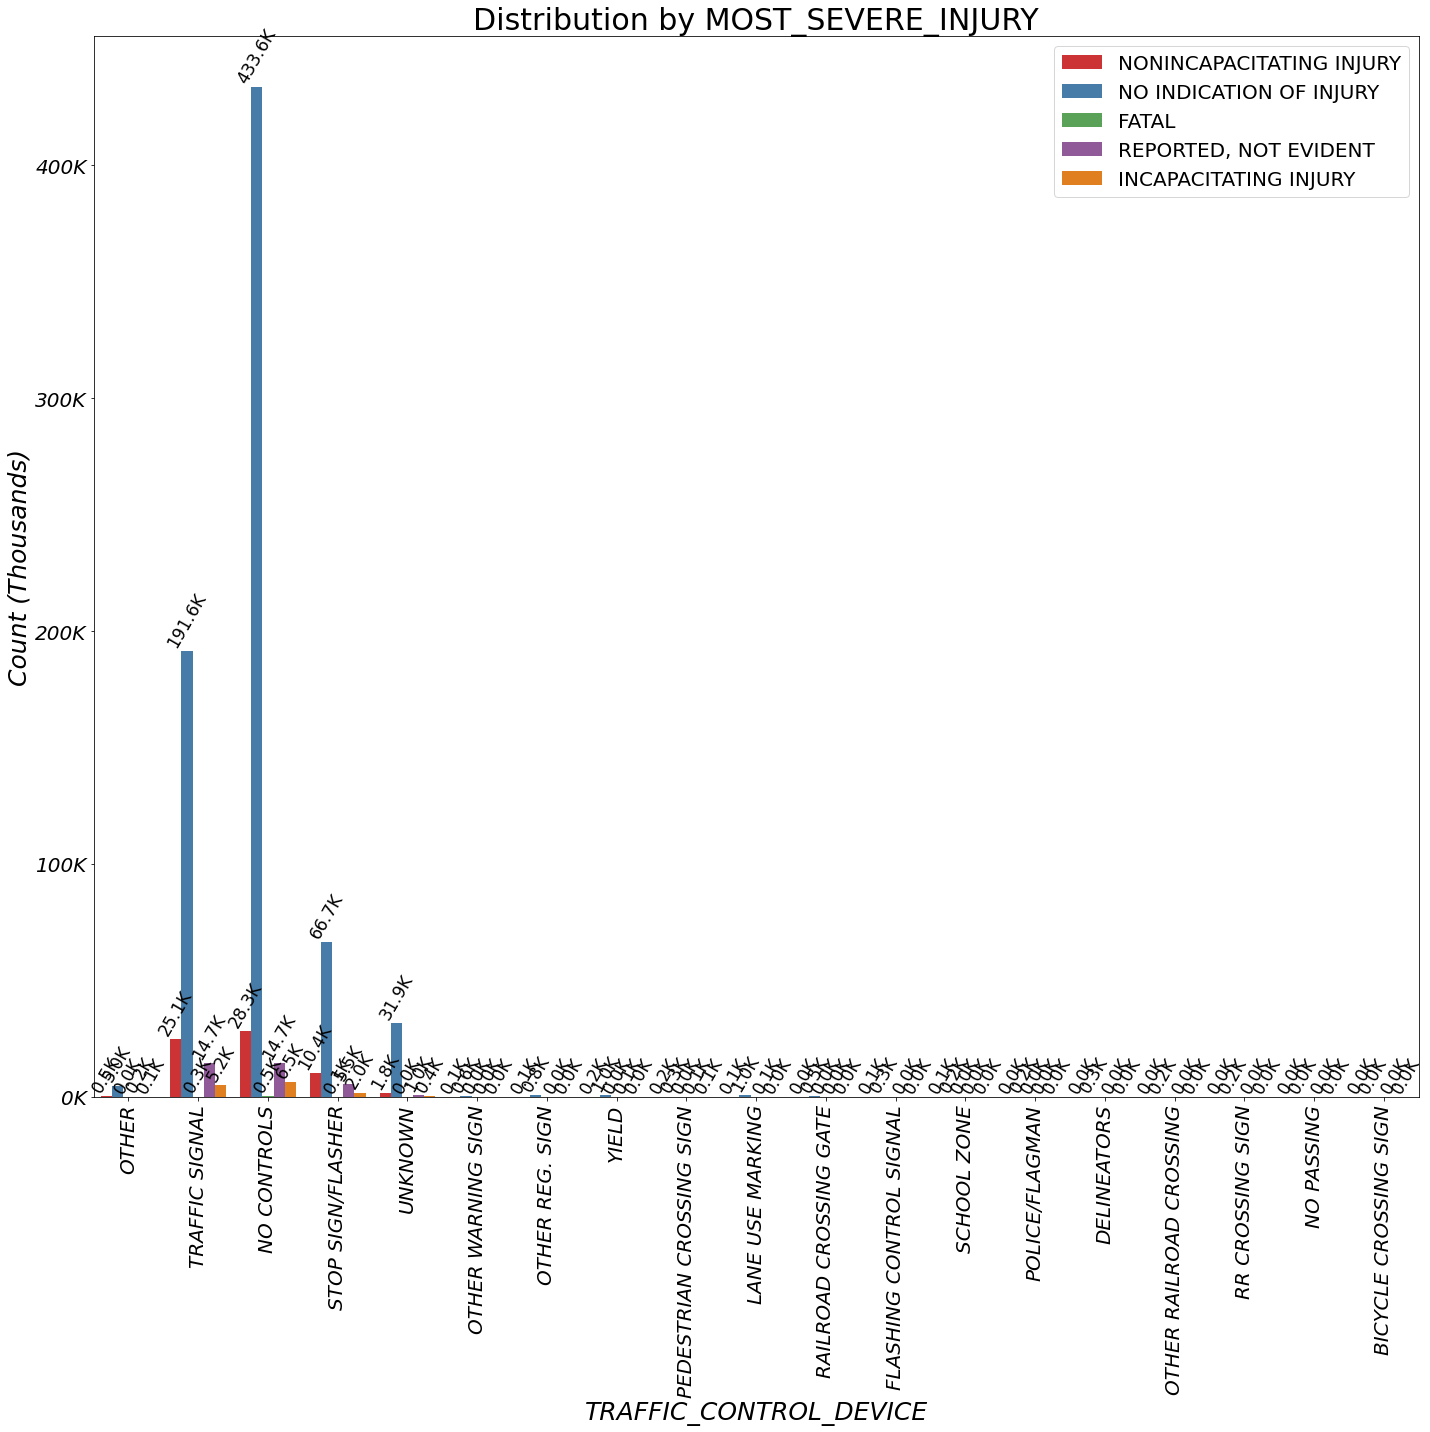

In [62]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

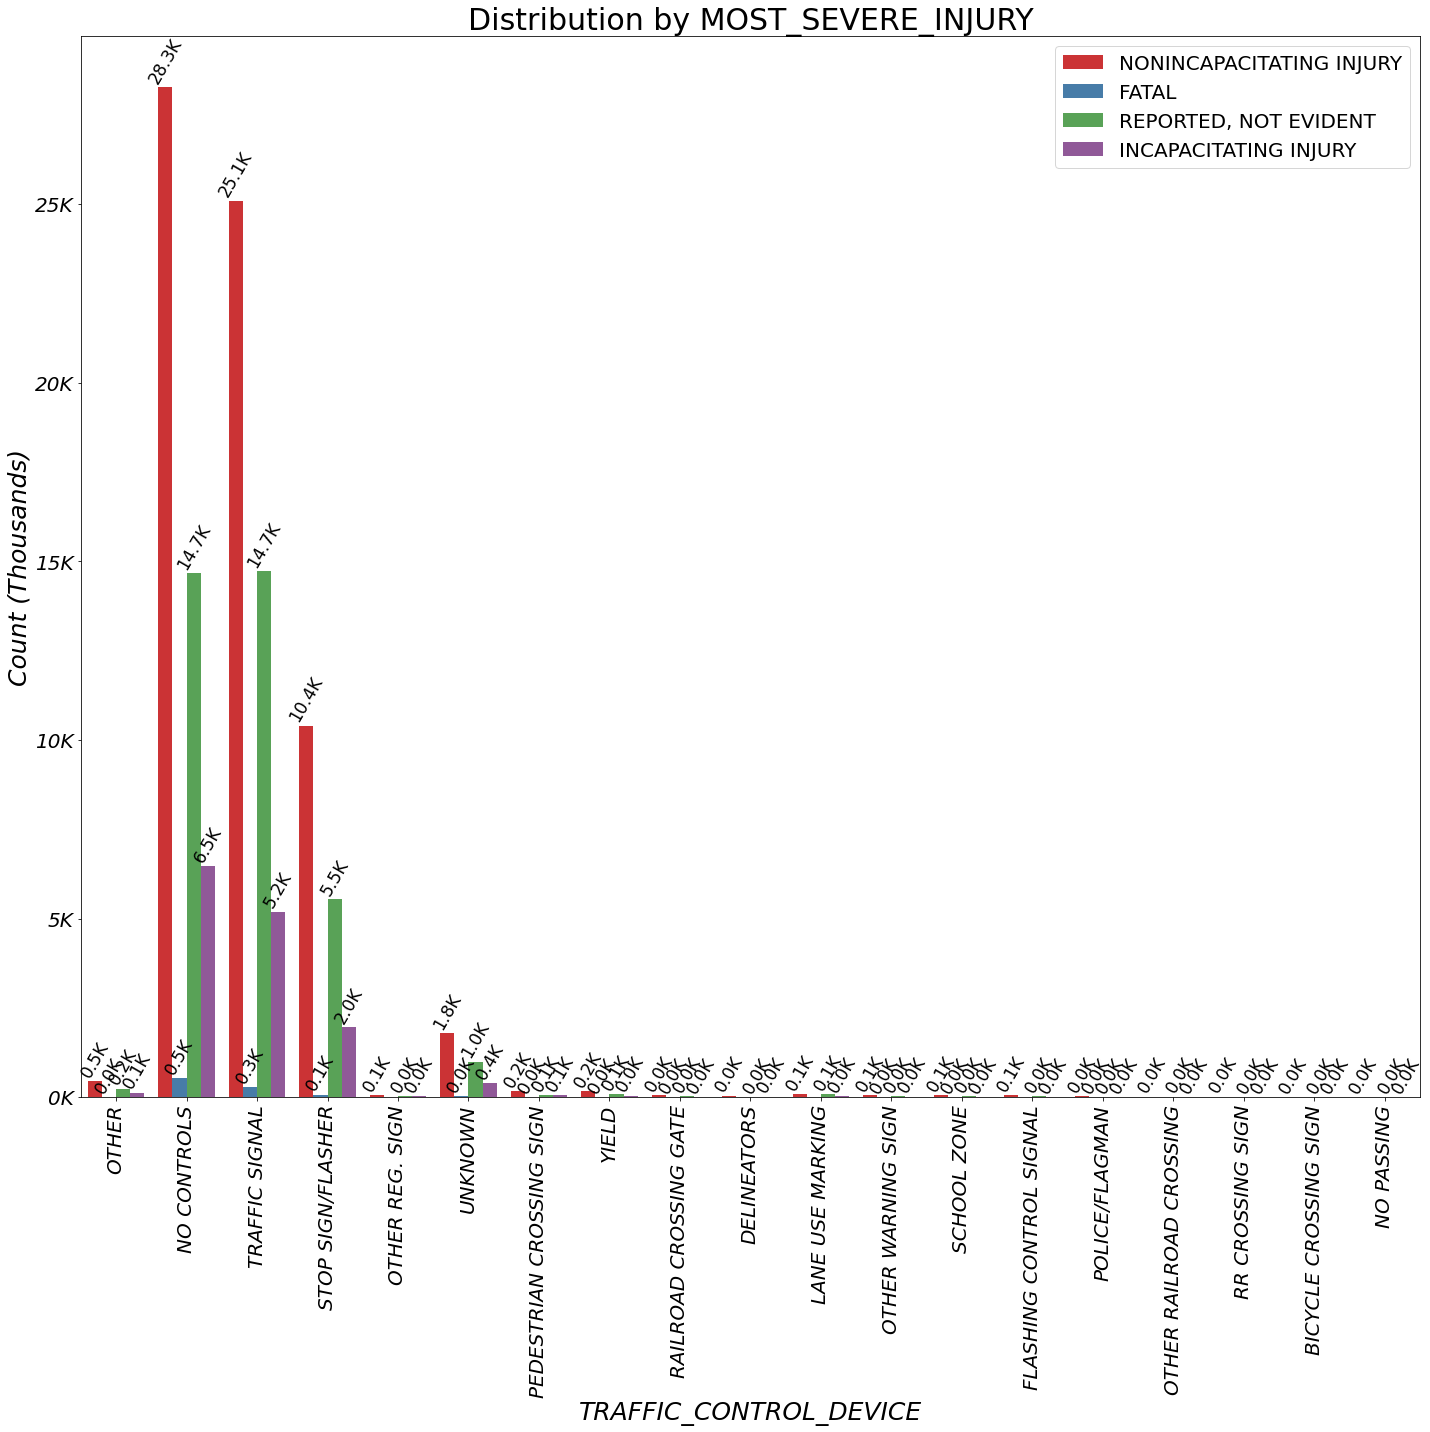

In [63]:
# filter out all non-injured crashes:
df_filtered = df_crashes[df_crashes['MOST_SEVERE_INJURY'] != 'NO INDICATION OF INJURY']

# count plot for 'CRASH_HOUR' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_filtered, 'TRAFFIC_CONTROL_DEVICE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages by Traffic Control Device.

* The most common types of Traffic Control Device are the Traffic Signal and the Stop Sign (intersecion-related).
* The most frequent Traffic Control Device is No Controls, meaning either parking lot or on the road 
* The fourth most common value is `Unknown`.
* Most fatalities occur without traffic controls.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Date Police Notified.

Let's look at the distribution of causes, damages, injuries for the crashes when police was not immediately notified. 

In [64]:
# convert 'CRASH_DATE' and 'DATE_POLICE_NOTIFIED' to datetime
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])
df_crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df_crashes['DATE_POLICE_NOTIFIED'])

df_crashes['time_difference_hours'] = abs(df_crashes['CRASH_DATE'] - \
                                          df_crashes['DATE_POLICE_NOTIFIED']).dt.total_seconds() / 3600

# categorize the time differences into ranges
bins = [0, 1, 4, 8, 12, float('inf')]  # edges of the bins
labels = ['<1 hr', '2-4 hrs', '5-8 hrs', '8-12 hrs', '>12 hrs']  # labels for each bin

# use pd.cut() to assign each time difference to a bin
df_crashes['reporting_delay_category'] = pd.cut(df_crashes['time_difference_hours'], \
                                                bins=bins, labels=labels, right=False)


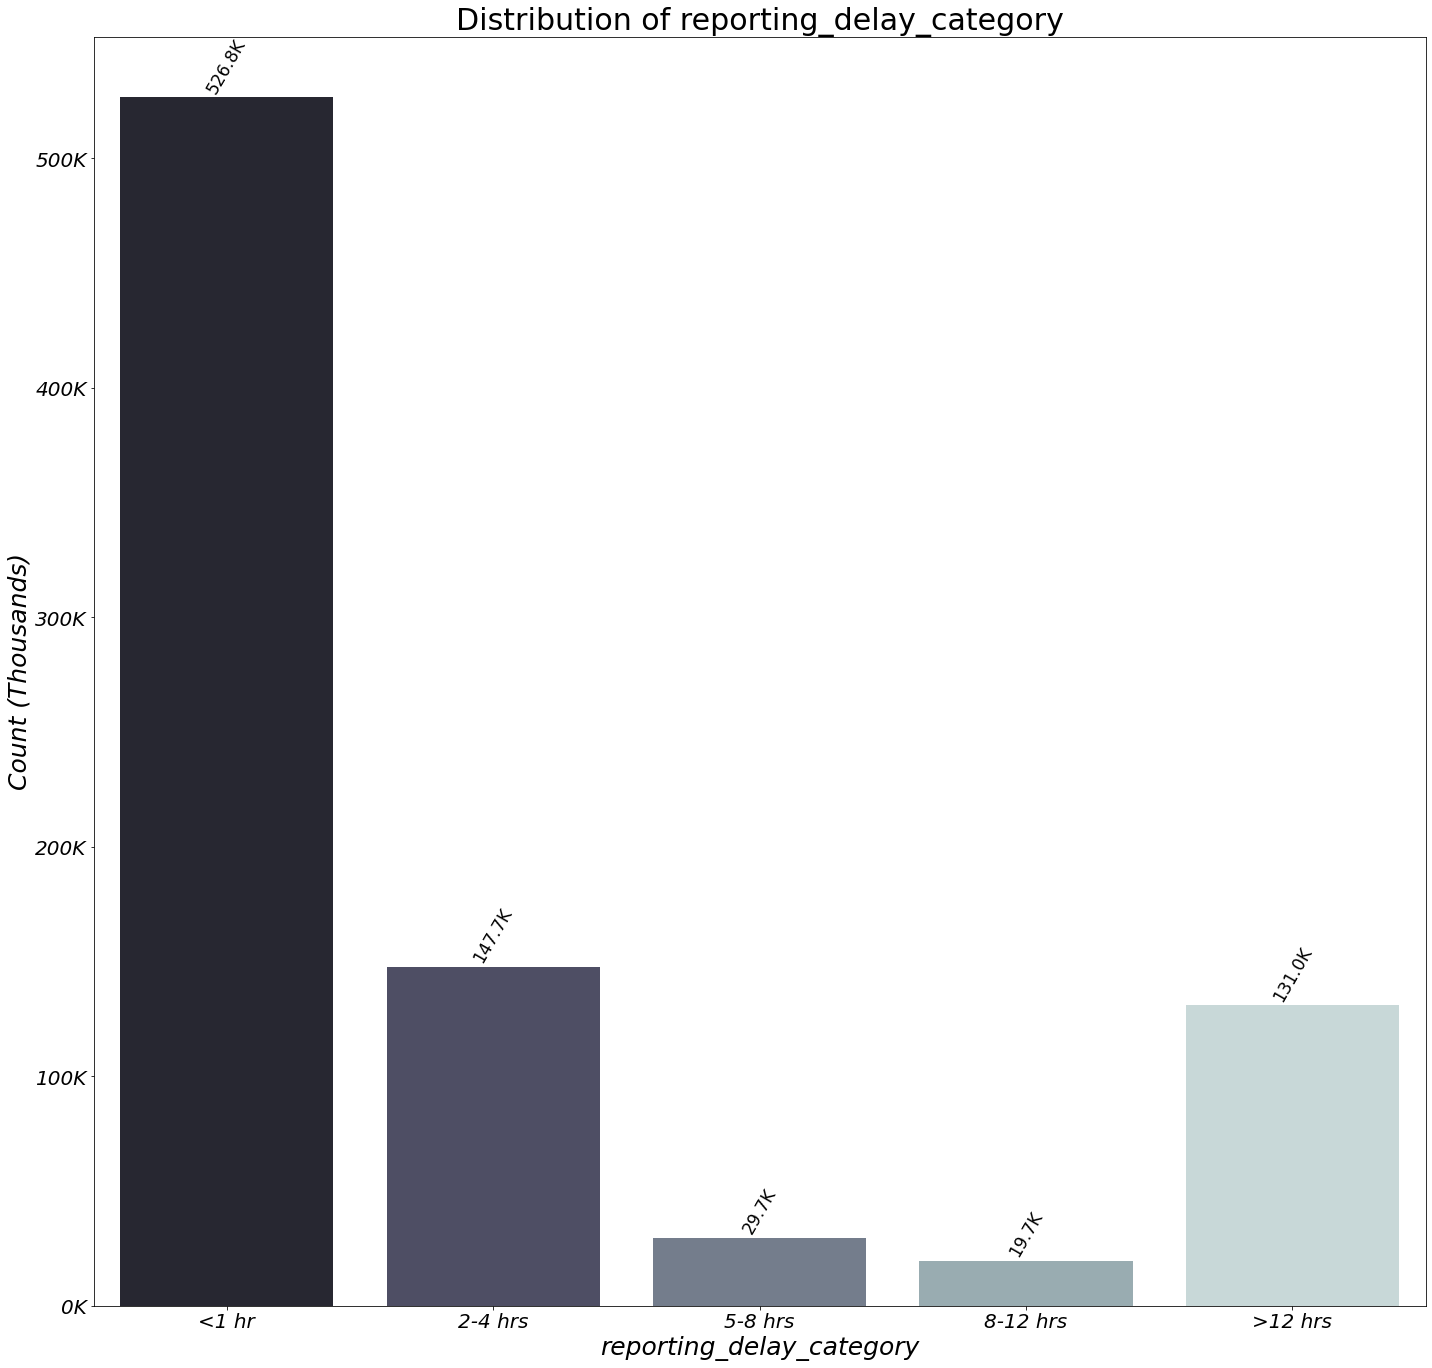

In [65]:
# count plot for 'reporting_delay_category'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

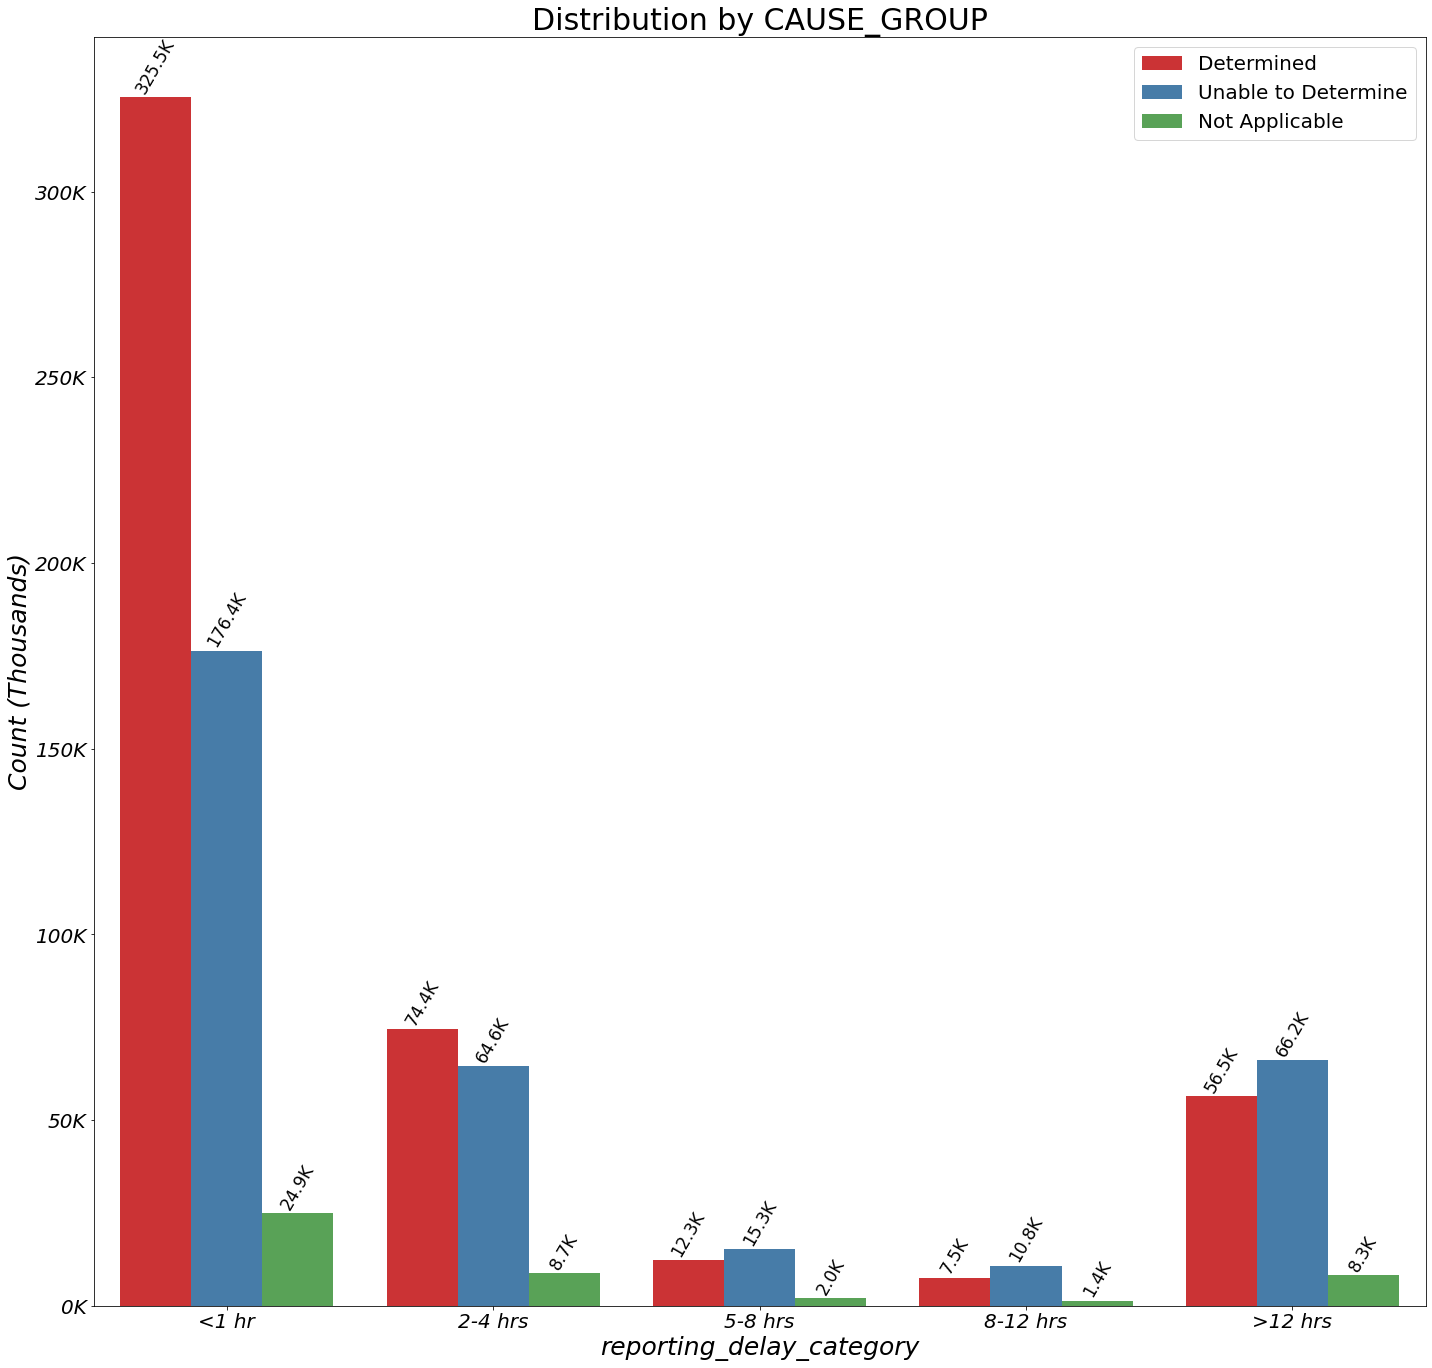

In [66]:
# count plot for 'reporting_delay_category' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'CAUSE_GROUP', 'Set1')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

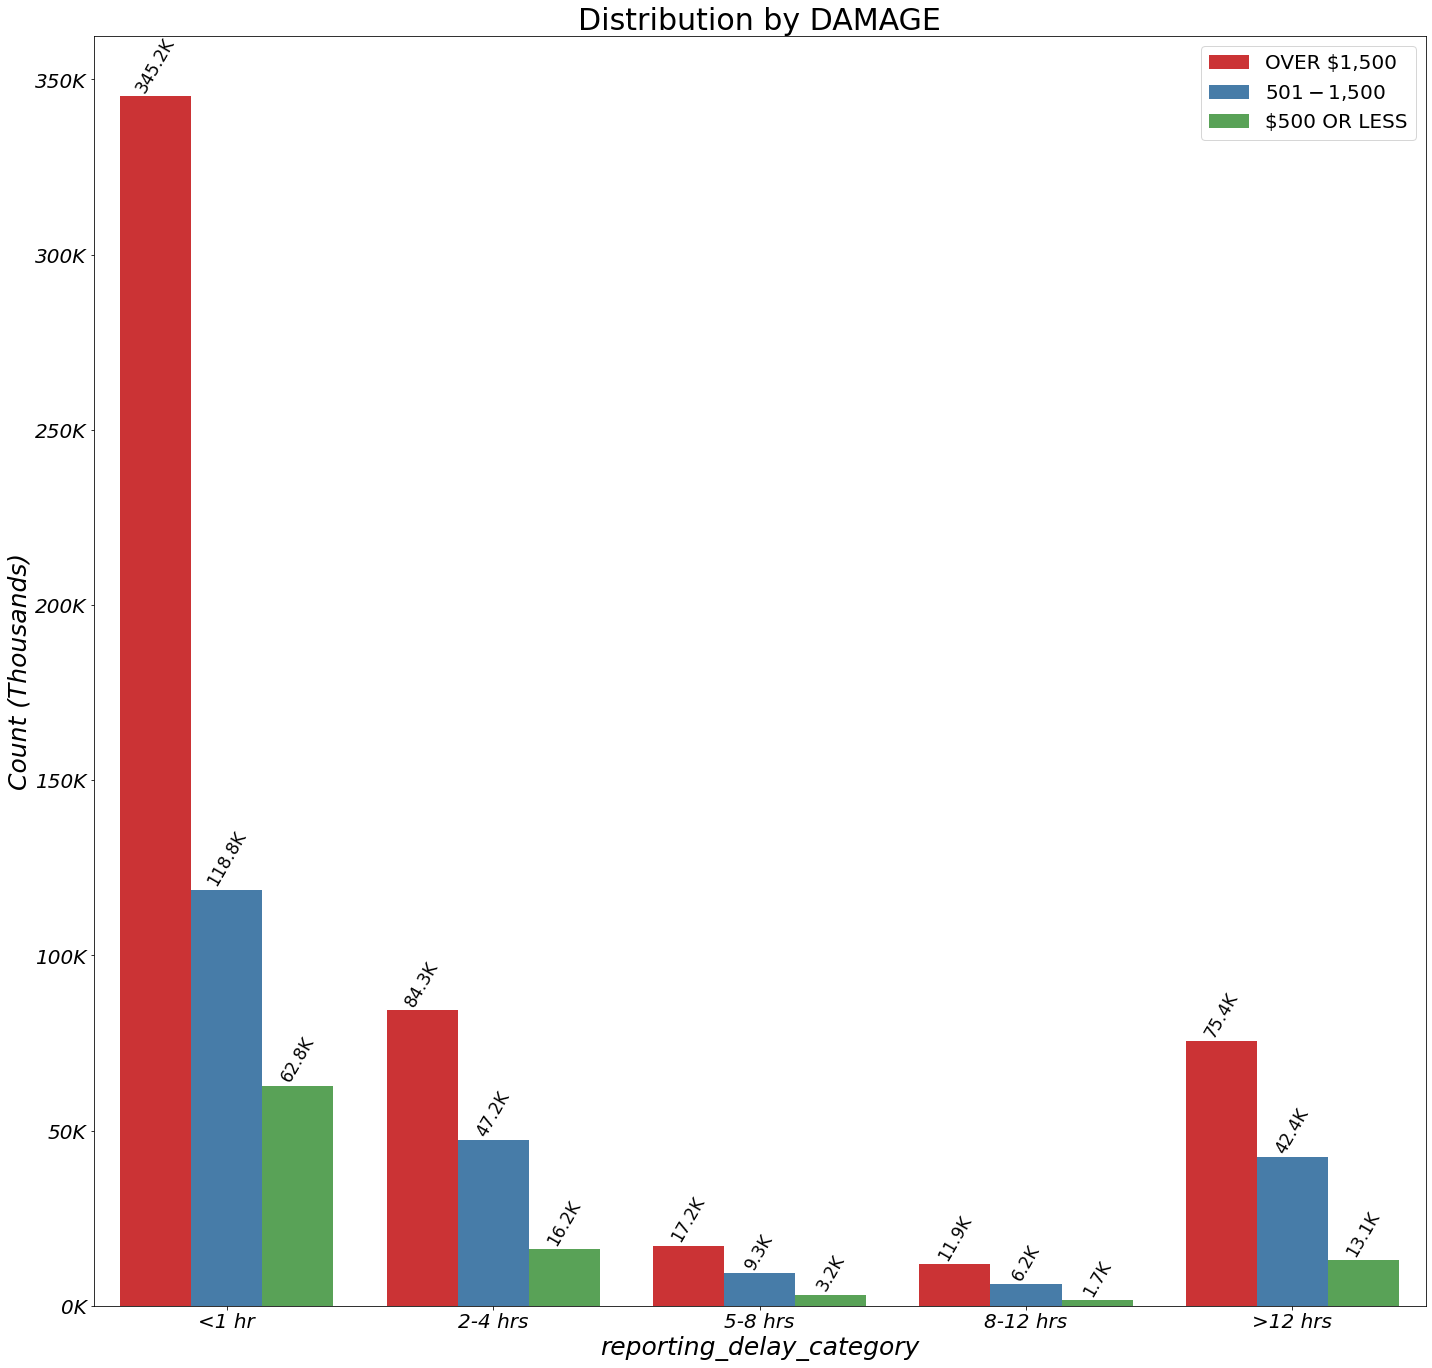

In [67]:
# count plot for 'reporting_delay_category' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

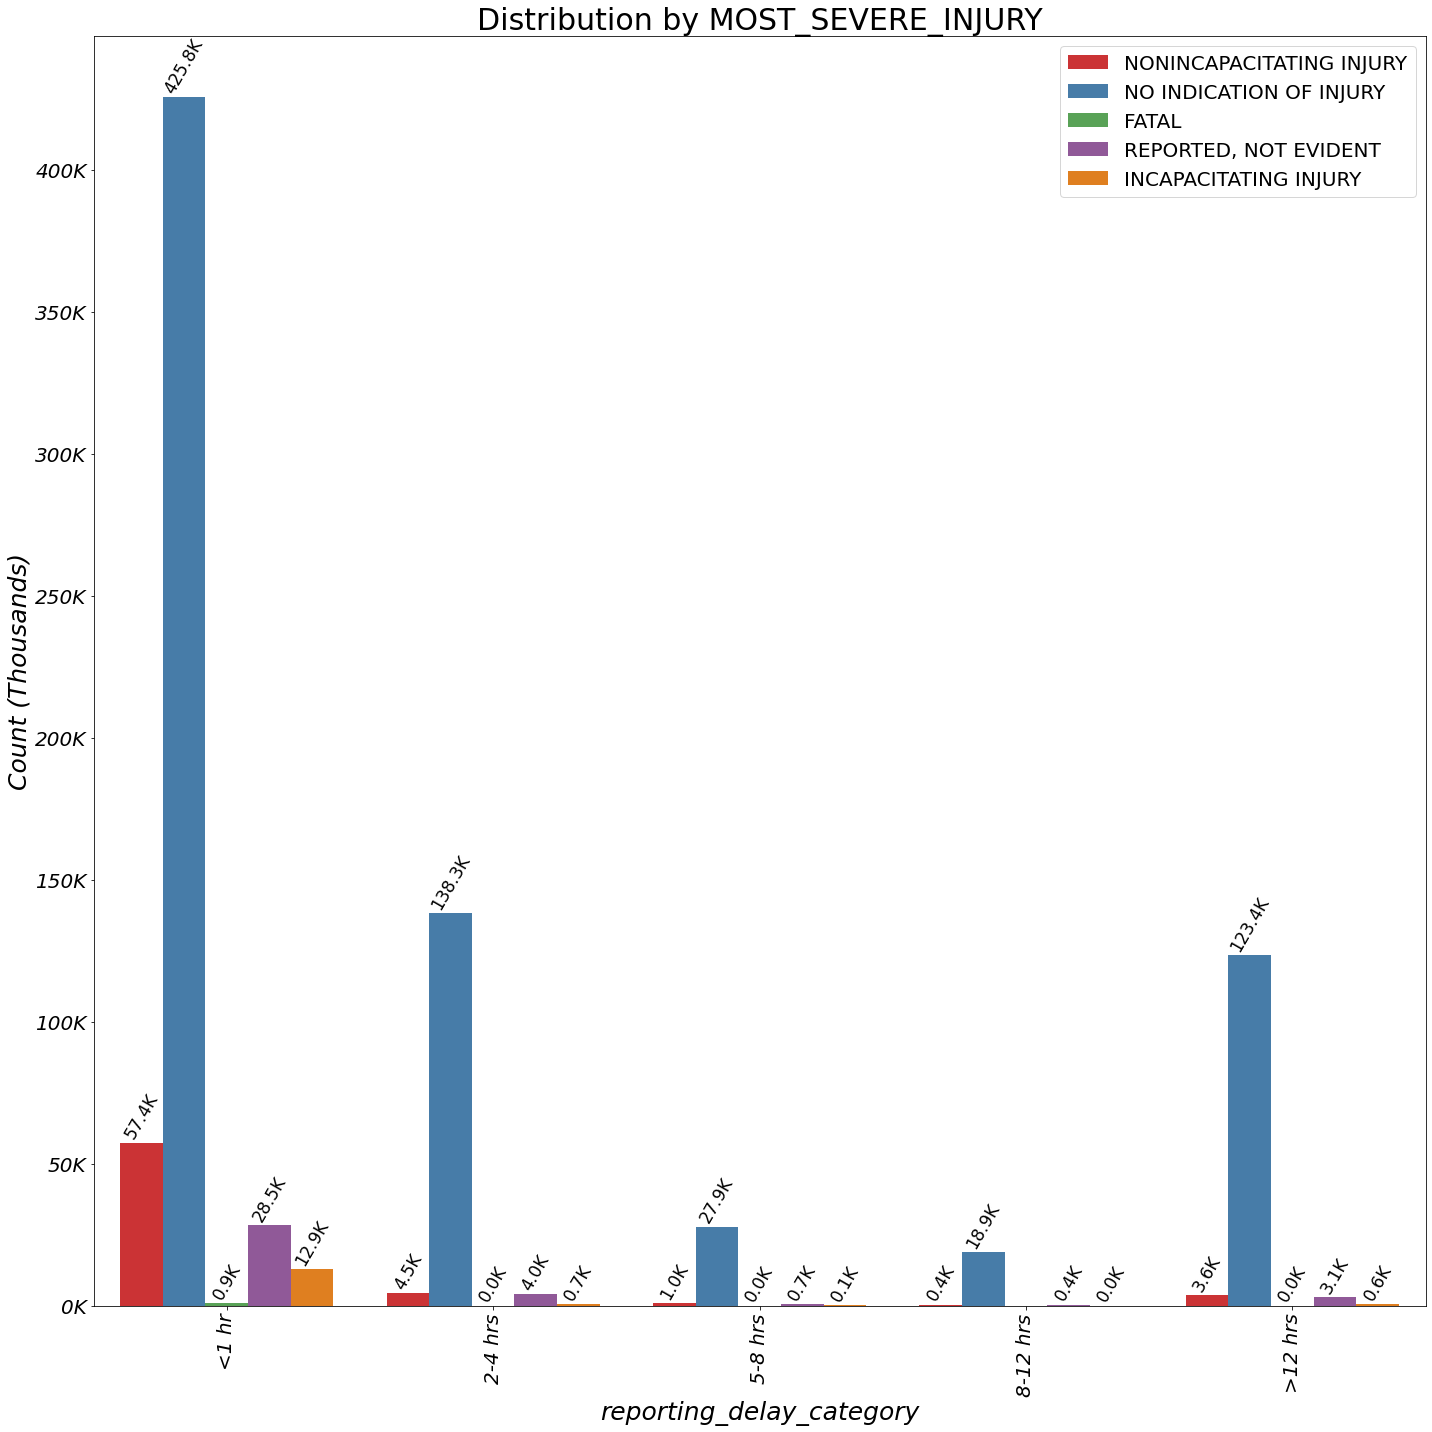

In [68]:
# count plot for 'reporting_delay_category' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

## 4. Overview of Crashes EDA.

Here are the following observations we can make about the `df_crashes` so far:

Date, Time, Daylight, Weather Conditions:

* Most of the crashes in the datset happen during business hours (7am - 11pm) at medium speed of 30-35 mph.
* Between the commute hours (7am - 7pm), the number of incapacitating ijuries increases. 
* Most of the crashes have no injuries, however between hours of 11 am-11 pm, there's a steady amount of incapacitating injuries. 
* Most of the crashes happen either in daylight or in darkness/streetlight.
* Most frequent weather is clear, second is rain.
* Sunday is the day with least crashes and Friday is the day with most crashes.
* As far as months, it's a steady distribution, except for slight uptick in May, June, October.
* Most of crashes are reported within 1 hour, 2-4 hours (parking accidents) and >12 hrs (probably parking accidents).
* Crashes reported after 12 hours have the most `Unable to Determine` causes.
  

Trafficway Type, Traffic Signal Type:

* Most crashes happen on undivided road, one-way road, or parking lot.
* Most reported are traffic signal/stop and no signal (road or parking lot).
* Parking lot trafficway and one-way streets have the most `Unable to Determine` causes.

First Crash Type:

* The most frequenct are rear-ending, and parked motor vehicle, followed by angle, turning, side-sweeping.
* Parked motor vehicle has the most `Unable to Determine` causes.


In [69]:
# displaying all columns 
df_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

### Proposed modifications to `df_crashes`.

* Check date entries in binary columns: if most of the valid entries are relatively new, then we keep the columns and convert missing values to 0 (default). If the valid entries are the oldest ones, then it would make sence to drop the columns due to being an artifact from older logging style. 
* Drop invalid speed limits.
* For columns with multiple categotical values, generalize and group similar items together as much as possible.
* For numeric columns, like hours, days, months, categorize time and month. For day of week, convert numbers to weekdays.
* For the speed limit column, group speed limit into larger categories, like under 5 mph, 5-15 mph, 15-25 mph, 25-35 mph, 35-45 mph, 45+ mph. 

### Applying proposed modifications to `df_crashes`.

In [70]:
# store columns to keep
cols_to_keep_df_crashes = ['CRASH_RECORD_ID', 'CRASH_DATE', 'posted_speed_limit_(mph)', 'reporting_delay_category', \
                          'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', \
                           'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROAD_DEFECT', \
                           'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', \
                           'WORK_ZONE_I', 'HIT_AND_RUN_I', 'NOT_RIGHT_OF_WAY_I', \
                           'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',\
                           'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',\
                           'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',\
                           'INJURIES_UNKNOWN', 'DOORING_I', 'INTERSECTION_RELATED_I',\
                           'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

df_crashes_slice = df_crashes[cols_to_keep_df_crashes].copy()
df_crashes_slice.columns = df_crashes_slice.columns.str.lower()

# display the updated column names
print(df_crashes_slice.columns)

Index(['crash_record_id', 'crash_date', 'posted_speed_limit_(mph)',
       'reporting_delay_category', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'road_defect', 'damage',
       'prim_contributory_cause', 'sec_contributory_cause', 'work_zone_i',
       'hit_and_run_i', 'not_right_of_way_i', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'dooring_i',
       'intersection_related_i', 'crash_hour', 'crash_day_of_week',
       'crash_month'],
      dtype='object')


In [71]:
# filter out other speed limits
df_crashes_slice = df_crashes_slice[df_crashes_slice['posted_speed_limit_(mph)'].isin(valid_speed_limits)]

### Explore range of dates in binary columns.
We have 5 binary columns that contain a mix of NaN and Y/N values. This can happen either because they were a new addition to logging process at some point and NaNs are artifacts of older reports. In this case, we'll keep the columns and perform cleanup. Other possibility is that these columns became deprecated at some point, so in this case we'll remove them.

We'll look at the distribution of non-nan values by year to make a decision. If we see an increase of non-nan entries in recent years, then these columns are valid.  

In [72]:
# clean binary columns
df_crashes_binary_cols = ['work_zone_i', 'hit_and_run_i', 'not_right_of_way_i', \
                          'dooring_i', 'intersection_related_i']

In [73]:
# filter out rows where any binary column has NaN
binary_df = df_crashes_slice[['crash_date'] + df_crashes_binary_cols].copy()

# extract the year from 'crash_date'
binary_df['crash_year'] = binary_df['crash_date'].dt.year

# loop through each binary column
for col in df_crashes_binary_cols:
    # drop rows where the current binary column has NaN values
    filtered_df = binary_df.dropna(subset=[col])
    
    # extract the year from 'crash_date'
    crash_year = filtered_df['crash_date'].dt.year
    
    # run value counts on the 'crash_year' column
    year_counts = filtered_df['crash_year'].value_counts()
    
    # display the result for the current binary column
    print(f"Value counts for 'crash_year' when '{col}' has no NaN values:")
    print(year_counts)
    print("~~~~~~~~~~~~~~~\n")  # add a blank line for readability between results

Value counts for 'crash_year' when 'work_zone_i' has no NaN values:
2018    877
2017    704
2019    619
2023    581
2021    506
2022    440
2020    429
2016    342
2024    248
2015     98
Name: crash_year, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'crash_year' when 'hit_and_run_i' has no NaN values:
2021    38816
2022    37129
2023    36483
2019    33395
2018    33039
2020    31910
2017    23168
2024    19299
2016    12005
2015     2479
2014        1
2013        1
Name: crash_year, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'crash_year' when 'not_right_of_way_i' has no NaN values:
2019    5820
2018    5505
2021    5220
2022    4970
2023    4640
2020    4603
2017    3571
2024    2488
2016    1875
2015     501
Name: crash_year, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'crash_year' when 'dooring_i' has no NaN values:
2018    450
2019    379
2023    335
2021    307
2022    290
2017    289
2020    258
2024    204
2016    117
2015     33
Name: crash_year, dtype: int64
~~~~~~~~

Looks like the binary columns were added into digital logging database after 2015 and can be important. We'll replace NaNs with 0 (No).

In [74]:
# replace Y with 1, everything else 0
df_crashes_slice[df_crashes_binary_cols] = \
    df_crashes_slice[df_crashes_binary_cols].applymap(lambda x: 1 if x == 'Y' else 0)

In [75]:
# check 
df_crashes_slice[df_crashes_binary_cols].value_counts()

work_zone_i  hit_and_run_i  not_right_of_way_i  dooring_i  intersection_related_i
0            0              0                   0          0                         420353
             1              0                   0          0                         209178
             0              0                   0          1                         147990
             1              0                   0          1                          36057
             0              1                   0          0                          24142
             1              1                   0          0                           9833
1            0              0                   0          0                           2403
0            0              0                   1          0                           1435
                            1                   0          1                           1179
1            0              0                   0          1                            69

In [76]:
# rename columns 
# map old column names to new column names by removing '_i'
new_column_names = {col: col.replace('_i', '') for col in df_crashes_binary_cols}

# Rename the columns in the DataFrame
df_crashes_slice = df_crashes_slice.rename(columns=new_column_names)

#### Cleaning up all categorical columns one by one, starting with `traffic_control_device`.

In [77]:
# all categorical columns
df_crashes_categorical_columns = ['traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'road_defect',
       'prim_contributory_cause', 'sec_contributory_cause']

In [78]:
# traffic control device
df_crashes_slice['traffic_control_device'].value_counts()

NO CONTROLS                 484972
TRAFFIC SIGNAL              236945
STOP SIGN/FLASHER            84706
UNKNOWN                      35179
OTHER                         5806
YIELD                         1264
LANE USE MARKING              1226
OTHER REG. SIGN                977
OTHER WARNING SIGN             692
PEDESTRIAN CROSSING SIGN       566
RAILROAD CROSSING GATE         554
FLASHING CONTROL SIGNAL        351
DELINEATORS                    341
SCHOOL ZONE                    320
POLICE/FLAGMAN                 289
OTHER RAILROAD CROSSING        188
RR CROSSING SIGN               172
NO PASSING                      52
BICYCLE CROSSING SIGN           30
Name: traffic_control_device, dtype: int64

In [79]:
# define the mapping to clean up or group the values
traffic_control_device_map = {
    'NO CONTROLS': 'No Controls',
    'TRAFFIC SIGNAL': 'Traffic Signal',
    'STOP SIGN/FLASHER': 'Stop Sign',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'YIELD': 'Yield Sign',
    'LANE USE MARKING': 'Lane Marking',
    'OTHER REG. SIGN': 'Other',
    'OTHER WARNING SIGN': 'Other',
    'PEDESTRIAN CROSSING SIGN': 'Pedestrian Xing',
    'RAILROAD CROSSING GATE': 'RR Xing',
    'FLASHING CONTROL SIGNAL': 'Flashing Signal',
    'DELINEATORS': 'Delineators',
    'SCHOOL ZONE': 'School Zone',
    'POLICE/FLAGMAN': 'Police or Flagman',
    'OTHER RAILROAD CROSSING': 'RR Xing',
    'RR CROSSING SIGN': 'RR Xing',
    'NO PASSING': 'No Passing Sign',
    'BICYCLE CROSSING SIGN': 'Bicycle Xing'
}
# apply the mapping to the column
df_crashes_slice['traffic_control_device'] = \
df_crashes_slice['traffic_control_device'].replace(traffic_control_device_map)

In [80]:
# traffic control device check
df_crashes_slice['traffic_control_device'].value_counts()

No Controls          484972
Traffic Signal       236945
Stop Sign             84706
Unknown               35179
Other                  7475
Yield Sign             1264
Lane Marking           1226
RR Xing                 914
Pedestrian Xing         566
Flashing Signal         351
Delineators             341
School Zone             320
Police or Flagman       289
No Passing Sign          52
Bicycle Xing             30
Name: traffic_control_device, dtype: int64

#### Cleaning up  `device_condition` column.

In [81]:
# traffic control device condition
df_crashes_slice['device_condition'].value_counts()

NO CONTROLS                 490559
FUNCTIONING PROPERLY        292177
UNKNOWN                      58561
OTHER                         6510
FUNCTIONING IMPROPERLY        3975
NOT FUNCTIONING               2463
WORN REFLECTIVE MATERIAL       289
MISSING                         96
Name: device_condition, dtype: int64

In [82]:
# define the mapping to clean up or group the values
device_condition_map = {
    'NO CONTROLS': 'No Controls',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'FUNCTIONING PROPERLY': 'Functioning',    
    'FUNCTIONING IMPROPERLY': 'Malfunctioning',
    'NOT FUNCTIONING': 'Not Functioning',
    'WORN REFLECTIVE MATERIAL': 'Reflective Material',
    'MISSING': 'Missing'
}
# apply the mapping to the column
df_crashes_slice['device_condition'] = df_crashes_slice['device_condition'].replace(device_condition_map)

In [83]:
# traffic control device condition
df_crashes_slice['device_condition'].value_counts()

No Controls            490559
Functioning            292177
Unknown                 58561
Other                    6510
Malfunctioning           3975
Not Functioning          2463
Reflective Material       289
Missing                    96
Name: device_condition, dtype: int64

#### Cleaning up  `weather_condition` column.

In [84]:
# weather condition
df_crashes_slice['weather_condition'].value_counts()

CLEAR                       670716
RAIN                         75071
UNKNOWN                      47914
SNOW                         28392
CLOUDY/OVERCAST              25170
OTHER                         2681
FREEZING RAIN/DRIZZLE         1728
FOG/SMOKE/HAZE                1345
SLEET/HAIL                    1010
BLOWING SNOW                   443
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: weather_condition, dtype: int64

In [85]:
# define the mapping to clean up or group the values
weather_condition_map = {
    'CLEAR': 'Clear',
    'RAIN': 'Rain',
    'SNOW': 'Snow',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'CLOUDY/OVERCAST': 'Cloudy',
    'FREEZING RAIN/DRIZZLE': 'Drizzle',
    'SLEET/HAIL': 'Sleet',
    'FOG/SMOKE/HAZE': 'Haze',
    'BLOWING SNOW': 'Blizzard',
    'BLOWING SAND, SOIL, DIRT': 'Dust Storm',
    'SEVERE CROSS WIND GATE': 'Crosswind'
}
# apply the mapping to the column
df_crashes_slice['weather_condition'] = df_crashes_slice['weather_condition'].replace(weather_condition_map)

In [86]:
# weather condition
df_crashes_slice['weather_condition'].value_counts()

Clear         670716
Rain           75071
Unknown        47914
Snow           28392
Cloudy         25170
Other           2681
Drizzle         1728
Haze            1345
Sleet           1010
Blizzard         443
Crosswind        153
Dust Storm         7
Name: weather_condition, dtype: int64

#### Cleaning up  `lighting_condition` column.

In [87]:
# lighting condition
df_crashes_slice['lighting_condition'].value_counts()

DAYLIGHT                  548958
DARKNESS, LIGHTED ROAD    187130
DARKNESS                   40338
UNKNOWN                    39576
DUSK                       24384
DAWN                       14244
Name: lighting_condition, dtype: int64

In [88]:
# define the mapping to clean up or group the values
lighting_condition_map = {
    'DAYLIGHT': 'Daylight',
    'DARKNESS, LIGHTED ROAD': 'Lighted Road',
    'DARKNESS': 'Dark',
    'UNKNOWN': 'Unknown',
    'DUSK': 'Dusk',
    'DAWN': 'Dawn'
}
# apply the mapping to the column
df_crashes_slice['lighting_condition'] = df_crashes_slice['lighting_condition'].replace(lighting_condition_map)

In [89]:
# lighting condition
df_crashes_slice['lighting_condition'].value_counts()

Daylight        548958
Lighted Road    187130
Dark             40338
Unknown          39576
Dusk             24384
Dawn             14244
Name: lighting_condition, dtype: int64

#### Cleaning up  `first_crash_type` column.

In [90]:
# first crash type 
df_crashes_slice['first_crash_type'].value_counts()

PARKED MOTOR VEHICLE            198349
REAR END                        190082
SIDESWIPE SAME DIRECTION        130749
TURNING                         122425
ANGLE                            92975
FIXED OBJECT                     39955
PEDESTRIAN                       19981
PEDALCYCLIST                     13129
SIDESWIPE OPPOSITE DIRECTION     11975
REAR TO FRONT                     8547
OTHER OBJECT                      8488
HEAD ON                           7276
REAR TO SIDE                      5067
OTHER NONCOLLISION                2673
REAR TO REAR                      1778
ANIMAL                             614
OVERTURNED                         521
TRAIN                               46
Name: first_crash_type, dtype: int64

In [91]:
# define the mapping to clean up or group the values
first_crash_map = {
    'PARKED MOTOR VEHICLE'            : 'Parked',
    'REAR END'                        : 'Rear End',
    'SIDESWIPE SAME DIRECTION'        : 'Sideswipe Same',
    'TURNING'                         : 'Turning',
    'ANGLE'                           : 'Angle', 
    'FIXED OBJECT'                    : 'Object',
    'PEDESTRIAN'                      : 'Pedestrian',
    'PEDALCYCLIST'                    : 'Cyclist',
    'SIDESWIPE OPPOSITE DIRECTION'    : 'Sideswipe Opposite',
    'REAR TO FRONT'                   : 'Rear to Front',
    'OTHER OBJECT'                    : 'Object',
    'HEAD ON'                         : 'Head On',
    'REAR TO SIDE'                    : 'Rear to Side',
    'OTHER NONCOLLISION'              : 'Other',
    'REAR TO REAR'                    : 'Rear to Rear',
    'ANIMAL'                          : 'Animal',
    'OVERTURNED'                      : 'Overturned',
    'TRAIN'                           : 'Train'
}
# apply the mapping to the column
df_crashes_slice['first_crash_type'] = df_crashes_slice['first_crash_type'].replace(first_crash_map)

In [92]:
# first crash type 
df_crashes_slice['first_crash_type'].value_counts()

Parked                198349
Rear End              190082
Sideswipe Same        130749
Turning               122425
Angle                  92975
Object                 48443
Pedestrian             19981
Cyclist                13129
Sideswipe Opposite     11975
Rear to Front           8547
Head On                 7276
Rear to Side            5067
Other                   2673
Rear to Rear            1778
Animal                   614
Overturned               521
Train                     46
Name: first_crash_type, dtype: int64

#### Cleaning up  `trafficway_type` column.

In [93]:
# trafficway type
df_crashes_slice['trafficway_type'].value_counts()

NOT DIVIDED                        369585
DIVIDED - W/MEDIAN (NOT RAISED)    135837
ONE-WAY                            108645
PARKING LOT                         58045
FOUR WAY                            56579
DIVIDED - W/MEDIAN BARRIER          48590
OTHER                               23245
ALLEY                               14103
T-INTERSECTION                      11308
UNKNOWN                              9974
CENTER TURN LANE                     6127
DRIVEWAY                             2773
RAMP                                 2679
UNKNOWN INTERSECTION TYPE            2590
FIVE POINT, OR MORE                  1243
Y-INTERSECTION                       1216
TRAFFIC ROUTE                        1010
NOT REPORTED                          624
ROUNDABOUT                            280
L-INTERSECTION                        177
Name: trafficway_type, dtype: int64

In [94]:
# define the mapping to clean up or group the values
trafficway_map = {
    'NOT DIVIDED': 'Not Divided',
    'DIVIDED - W/MEDIAN (NOT RAISED)': 'Divided, Median',
    'ONE-WAY': 'One-Way',
    'PARKING LOT': 'Parking Lot',
    'FOUR WAY': 'Intersection, Four-Way',
    'DIVIDED - W/MEDIAN BARRIER': 'Divided, Barrier',
    'OTHER': 'Other',
    'ALLEY': 'Alley',
    'T-INTERSECTION': 'Intersection, T',
    'UNKNOWN': 'Unknown',
    'CENTER TURN LANE': 'Center Turn Lane',
    'DRIVEWAY': 'Driveway',
    'RAMP': 'Ramp',
    'UNKNOWN INTERSECTION TYPE': 'Intersection, Unknown',
    'FIVE POINT, OR MORE': 'Intersection, Five-Point or More',
    'Y-INTERSECTION': 'Intersection, Y',
    'TRAFFIC ROUTE': 'Traffic Route',
    'NOT REPORTED': 'Unknown',
    'ROUNDABOUT': 'Roundabout',
    'L-INTERSECTION': 'Intersection, L'
}

# apply the mapping to the column
df_crashes_slice['trafficway_type'] = df_crashes_slice['trafficway_type'].replace(trafficway_map)

In [95]:
# trafficway type
df_crashes_slice['trafficway_type'].value_counts()

Not Divided                         369585
Divided, Median                     135837
One-Way                             108645
Parking Lot                          58045
Intersection, Four-Way               56579
Divided, Barrier                     48590
Other                                23245
Alley                                14103
Intersection, T                      11308
Unknown                              10598
Center Turn Lane                      6127
Driveway                              2773
Ramp                                  2679
Intersection, Unknown                 2590
Intersection, Five-Point or More      1243
Intersection, Y                       1216
Traffic Route                         1010
Roundabout                             280
Intersection, L                        177
Name: trafficway_type, dtype: int64

#### Cleaning up  `road_defect` column.

In [96]:
# road_defect type
df_crashes_slice['road_defect'].value_counts()

NO DEFECTS           684221
UNKNOWN              153897
RUT, HOLES             6211
OTHER                  4651
WORN SURFACE           3504
SHOULDER DEFECT        1513
DEBRIS ON ROADWAY       633
Name: road_defect, dtype: int64

In [97]:
# define the mapping to clean up or group the values
road_defect_map = {
    'NO DEFECTS':'No Defects',
    'UNKNOWN': 'Unknown',
    'OTHER':'Other',
    'RUT, HOLES': 'Surface Defect',
    'WORN SURFACE':'Surface Defect',
    'SHOULDER DEFECT':'Shoulder Defect',
    'DEBRIS ON ROADWAY':'Debris'
}
# apply the mapping to the column
df_crashes_slice['road_defect'] = df_crashes_slice['road_defect'].replace(road_defect_map)

In [98]:
# road_defect type
df_crashes_slice['road_defect'].value_counts()

No Defects         684221
Unknown            153897
Surface Defect       9715
Other                4651
Shoulder Defect      1513
Debris                633
Name: road_defect, dtype: int64

#### Categorizing up `crash_hour`, `crash_day`, `crash_month`, adding crash year column.

We'll start with splitting hours into five categories: morning, afternoon, late afternoon, evening, late evening, night. Having more than 4 categories is driven by data distribution and data origins (busy urban area), where multiple commute waves (and associated increase in traffic accidents) exist.

In [99]:
# function to categorize the hour into time of day
def categorize_time_of_day(hour):
    if 7 < hour <= 11:
        return 'Morning'
    elif 11 < hour <= 14:
         return 'Afternoon'
    elif 14 < hour <= 17:
        return 'Late Afternoon'    
    elif 18 < hour <= 21:
        return 'Evening'
    elif 21 < hour <= 23:
        return 'Late Evening'    
    else:
        return 'Night'

# apply the categorization to the 'CRASH_HOUR' column
df_crashes_slice['time_of_day'] = df_crashes_slice['crash_hour'].apply(categorize_time_of_day)

# display the result
print(df_crashes_slice[['crash_hour', 'time_of_day']].head())

   crash_hour     time_of_day
0          12       Afternoon
1          14       Afternoon
2          17  Late Afternoon
3           8         Morning
4          10         Morning


In [100]:
# create a mapping dictionary for weekdays
weekday_mapping = {
    1: 'Sunday',    
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# replace the numeric weekdays with the day names
df_crashes_slice['day'] = df_crashes_slice['crash_day_of_week'].map(weekday_mapping)

# display the updated df
df_crashes_slice[['crash_day_of_week', 'day']].head()

crash_day_of_week       day
0                  6    Friday
1                  7  Saturday
2                  6    Friday
3                  3   Tuesday
4                  6    Friday

In [101]:
# create a mapping dictionary for months to seasons
month_to_season = {
    1: 'Winter',  2: 'Winter',  3: 'Spring',
    4: 'Spring',  5: 'Spring',  6: 'Summer',
    7: 'Summer',  8: 'Summer',  9: 'Fall',
    10: 'Fall',  11: 'Fall',  12: 'Winter'
}

# replace the numeric months with the corresponding seasons
df_crashes_slice['season'] = df_crashes_slice['crash_month'].map(month_to_season)

# display the updated df
df_crashes_slice[['crash_month', 'season']].head()

crash_month  season
0            8  Summer
1            7  Summer
2            8  Summer
3           11    Fall
4            8  Summer

In [102]:
# add year
df_crashes_slice['year'] = df_crashes_slice['crash_date'].dt.year

In [103]:
# drop old columns
df_crashes_slice.drop(columns=['crash_hour', 'crash_day_of_week', 'crash_month', 'crash_date'], inplace=True)

#### Categorizing `Posted Speed Limit (mph)`.

Our choise of bins reflects data distribution in the determined vs undetermined crash cause distribution.

In [104]:
# specify the bins and labels
bins = [-float('inf'), 5, 15, 25, 35, 50, float('inf')] 
labels = ['slow (<5 mph)', '5-15 mph', '20-25 mph', '30-35 mph', '40-50 mph', '50+ mph'] 
# Apply pd.cut() to categorize the 'Posted Speed Limit (mph)' column
df_crashes_slice['speed_limit'] = pd.cut(df_crashes_slice['posted_speed_limit_(mph)'], \
                                         bins=bins, labels=labels, right=False)

# display the updated DataFrame with the new speed category column
df_crashes_slice[['posted_speed_limit_(mph)', 'speed_limit']].head()

posted_speed_limit_(mph) speed_limit
0                        15   20-25 mph
1                        30   30-35 mph
2                        30   30-35 mph
3                        25   30-35 mph
4                        20   20-25 mph

In [105]:
# drop the 'posted_speed_limit_(mph)'
df_crashes_slice.drop(columns='posted_speed_limit_(mph)', inplace=True)

#### Cleaning up  `prim_contributory_cause`, `sec_contributory_cause` columns.

In [106]:
# road_defect type
df_crashes_slice['prim_contributory_cause'].value_counts()

UNABLE TO DETERMINE                                                                 333195
FAILING TO YIELD RIGHT-OF-WAY                                                        94072
FOLLOWING TOO CLOSELY                                                                82782
NOT APPLICABLE                                                                       45295
IMPROPER OVERTAKING/PASSING                                                          42396
FAILING TO REDUCE SPEED TO AVOID CRASH                                               35982
IMPROPER BACKING                                                                     33389
IMPROPER LANE USAGE                                                                  30547
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  28868
IMPROPER TURNING/NO SIGNAL                                                           28512
DISREGARDING TRAFFIC SIGNALS                                                         16719

In [107]:
# intersect to use common causes 
primary_causes = set(df_crashes_slice['prim_contributory_cause'])
secondary_causes = set(df_crashes_slice['sec_contributory_cause'])

# find the intersection (common causes)
common_causes = primary_causes & secondary_causes

common_causes

{'ANIMAL',
 'BICYCLE ADVANCING LEGALLY ON RED LIGHT',
 'CELL PHONE USE OTHER THAN TEXTING',
 'DISREGARDING OTHER TRAFFIC SIGNS',
 'DISREGARDING ROAD MARKINGS',
 'DISREGARDING STOP SIGN',
 'DISREGARDING TRAFFIC SIGNALS',
 'DISREGARDING YIELD SIGN',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'EQUIPMENT - VEHICLE CONDITION',
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
 'EXCEEDING AUTHORIZED SPEED LIMIT',
 'EXCEEDING SAFE SPEED FOR CONDITIONS',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'FOLLOWING TOO CLOSELY',
 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'IMPROPER OVERTAKING/PASSING',
 'IMPROPER TURNING/NO SIGNAL',
 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
 'NOT APPLICABLE',
 'OBSTRUCTED CROSSWALKS',


In [108]:
#  mapping to group or generalize contributory causes
cause_map = {
    'ANIMAL': 'Animal',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Bicycle',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distracted Driving',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Disregarding Traffic Control',
    'DISREGARDING ROAD MARKINGS': 'Disregarding Traffic Control',
    'DISREGARDING STOP SIGN': 'Disregarding Traffic Control',
    'DISREGARDING TRAFFIC SIGNALS': 'Disregarding Traffic Control',
    'DISREGARDING YIELD SIGN': 'Disregarding Traffic Control',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distracted Driving',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distracted Driving',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distracted Driving',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Improper Driving',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Experience',
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle Equipment',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'Evasive Action',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speeding',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speeding',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speeding',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Failure to Yield',
    'FOLLOWING TOO CLOSELY': 'Following Too Closely',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Alcohol/Drugs',
    'IMPROPER BACKING': 'Improper Driving',
    'IMPROPER LANE USAGE': 'Improper Driving',
    'IMPROPER OVERTAKING/PASSING': 'Improper Driving',
    'IMPROPER TURNING/NO SIGNAL': 'Improper Driving',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Motorcycle',
    'NOT APPLICABLE': 'Not Applicable',
    'OBSTRUCTED CROSSWALKS': 'Road Obstruction',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless Driving',
    'PASSING STOPPED SCHOOL BUS': 'Improper Passing',
    'PHYSICAL CONDITION OF DRIVER': 'Driver Condition',
    'RELATED TO BUS STOP': 'Roadway Conditions',
    'ROAD CONSTRUCTION/MAINTENANCE': 'Roadway Conditions',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Roadway Conditions',
    'TEXTING': 'Distracted Driving',
    'TURNING RIGHT ON RED': 'Improper Turning',
    'UNABLE TO DETERMINE': 'Unable to Determine',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Alcohol/Drugs',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Obstructed Vision',
    'WEATHER': 'Weather'
}

# apply the mapping to 'prim_contributory_cause', sec_contributory_cause columns
df_crashes_slice['prim_contributory_cause'] = df_crashes_slice['prim_contributory_cause'].replace(cause_map)
df_crashes_slice['sec_contributory_cause'] = df_crashes_slice['sec_contributory_cause'].replace(cause_map)

In [109]:
# display the updated prim_contributory_cause
df_crashes_slice['prim_contributory_cause'].value_counts()

Unable to Determine             333195
Improper Driving                139451
Failure to Yield                 94072
Following Too Closely            82782
Not Applicable                   45295
Speeding                         39646
Disregarding Traffic Control     29088
Driver Experience                28868
Weather                          12638
Distracted Driving               11148
Reckless Driving                 10842
Vehicle Equipment                 5298
Driver Condition                  5047
Alcohol/Drugs                     4855
Obstructed Vision                 4845
Roadway Conditions                4315
Evasive Action                    1563
Animal                             725
Improper Turning                   652
Improper Passing                   107
Road Obstruction                    93
Bicycle                             82
Motorcycle                          23
Name: prim_contributory_cause, dtype: int64

In [110]:
# display the updated sec_contributory_cause
df_crashes_slice['sec_contributory_cause'].value_counts()

Not Applicable                  351836
Unable to Determine             308387
Improper Driving                 42685
Speeding                         34565
Failure to Yield                 27117
Driver Experience                26359
Following Too Closely            22510
Weather                           9663
Disregarding Traffic Control      7904
Reckless Driving                  5340
Distracted Driving                5003
Obstructed Vision                 2660
Driver Condition                  2591
Alcohol/Drugs                     2410
Roadway Conditions                2208
Vehicle Equipment                 1732
Evasive Action                     453
Animal                             409
Improper Turning                   330
Bicycle                            229
Road Obstruction                    91
Improper Passing                    90
Motorcycle                          58
Name: sec_contributory_cause, dtype: int64

#### Final filtering/cleaning, when the primary cause is undetermined, replace it with secondary cause unless it's also undetermined. 

In [111]:
# replace 'Unable to Determine' or 'Not Applicable' in 'prim_contributory_cause' 
# if 'sec_contributory_cause' is neither 'Unable to Determine' nor 'Not Applicable'
df_crashes_slice['prim_contributory_cause'] = df_crashes_slice.apply(
    lambda row: row['sec_contributory_cause'] \
    if row['prim_contributory_cause'] in ['Unable to Determine', 'Not Applicable'] 
    and row['sec_contributory_cause'] not in ['Unable to Determine', 'Not Applicable'] 
    else row['prim_contributory_cause'],
    axis=1
)
# display the updated prim_contributory_cause
df_crashes_slice['prim_contributory_cause'].value_counts()

Unable to Determine             324845
Improper Driving                141173
Failure to Yield                 94825
Following Too Closely            83510
Not Applicable                   44181
Speeding                         40823
Driver Experience                30712
Disregarding Traffic Control     29375
Weather                          13528
Distracted Driving               11384
Reckless Driving                 11071
Vehicle Equipment                 5436
Driver Condition                  5418
Alcohol/Drugs                     5276
Obstructed Vision                 5003
Roadway Conditions                4559
Evasive Action                    1592
Animal                             807
Improper Turning                   668
Bicycle                            170
Improper Passing                   115
Road Obstruction                   113
Motorcycle                          46
Name: prim_contributory_cause, dtype: int64

In [112]:
# drop the 'sec_contributory_cause'
df_crashes_slice.drop(columns='sec_contributory_cause', inplace=True)

In [113]:
# drop nans
df_crashes_clean = df_crashes_slice.dropna()

In [114]:
# display rows x cols
df_crashes_clean.shape

(852750, 29)

In [115]:
# display first 5 rows
df_crashes_clean.head()

crash_record_id reporting_delay_category  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...                    <1 hr   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...                    <1 hr   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...                    <1 hr   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...                    <1 hr   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...                    <1 hr   

  traffic_control_device device_condition weather_condition  \
0                  Other      Functioning             Clear   
1         Traffic Signal      Functioning             Clear   
2            No Controls      No Controls             Clear   
3            No Controls      No Controls             Clear   
4            No Controls      No Controls             Clear   

  lighting_condition first_crash_type  trafficway_type road_defect  \
0           Daylight         Rear End            Other  No Defects   
1           Daylight           Parked  Divided, Median  No Defects   
2           Daylight          Cyclist      Not Divided  No Defects   
3           Daylight       Pedestrian          One-Way  No Defects   
4           Daylight           Object            Other  No Defects   

          damage  ... injuries_reported_not_evident  injuries_no_indication  \
0    OVER $1,500  ...                           0.0                     1.0   
1    OVER $1,500  ...                           0.0                     1.0   
2  $501 - $1,500  ...                           0.0                     1.0   
3    OVER $1,500  ...                           0.0                     1.0   
4    OVER $1,500  ...                           0.0                     1.0   

   injuries_unknown  dooring intersection_related     time_of_day       day  \
0               0.0        0                    0       Afternoon    Friday   
1               0.0        0                    0       Afternoon  Saturday   
2               0.0        0                    0  Late Afternoon    Friday   
3               0.0        0                    0         Morning   Tuesday   
4               0.0        0                    0         Morning    Friday   

   season  year  speed_limit  
0  Summer  2023    20-25 mph  
1  Summer  2023    30-35 mph  
2  Summer  2023    30-35 mph  
3    Fall  2019    30-35 mph  
4  Summer  2023    20-25 mph  

[5 rows x 29 columns]

In [116]:
# display columns
df_crashes_clean.columns

Index(['crash_record_id', 'reporting_delay_category', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'road_defect', 'damage',
       'prim_contributory_cause', 'work_zone', 'hit_and_run',
       'not_right_of_way', 'most_severe_injury', 'injuries_total',
       'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'dooring',
       'intersection_related', 'time_of_day', 'day', 'season', 'year',
       'speed_limit'],
      dtype='object')

#### `Unknown` , `Unable to determine`,  `Not Applicable`?
As a last bit of exploration, we want to check what other values coinside with `Unknown` values in columns that should not have `Unknown` and how it relates to `Unable to Determine` or `Not Applicable` crash cause.

#### Composing dataframes (damages, injury, reporting delay, primary cause) with value counts for each column. 

In [117]:
# columns with unusual `Unknown`
df_crashes_unknown_cols = ['traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition', 'trafficway_type', 'road_defect']

# initialize empty DataFrames for each category (damage, injury, delay, cause)
grouped_damage_counts = pd.DataFrame()
grouped_injury_counts = pd.DataFrame()
grouped_delay_counts = pd.DataFrame()
grouped_cause_counts = pd.DataFrame()

# Loop through each column in df_crashes_unknown_cols
for col in df_crashes_unknown_cols:
    # Filter rows where the current column has 'Unknown'
    df_filtered = df_crashes_clean[df_crashes_clean[col] == 'Unknown']
    
    # get value counts for each of the categories
    damage_counts = df_filtered['damage'].value_counts()
    injury_counts = df_filtered['most_severe_injury'].value_counts()
    delay_counts = df_filtered['reporting_delay_category'].value_counts()
    cause_counts = df_filtered['prim_contributory_cause'].value_counts()

    # add the value counts as columns in their respective grouped DataFrames
    grouped_damage_counts[col] = damage_counts
    grouped_injury_counts[col] = injury_counts
    grouped_delay_counts[col] = delay_counts
    grouped_cause_counts[col] = cause_counts

# fill NaN with 0 for missing values and ensure integer representation
grouped_damage_counts = grouped_damage_counts.fillna(0).astype(int)
grouped_injury_counts = grouped_injury_counts.fillna(0).astype(int)
grouped_delay_counts = grouped_delay_counts.fillna(0).astype(int)
grouped_cause_counts = grouped_cause_counts.fillna(0).astype(int)

#### Supplemental plotting function to display value distribution for each dataframe.

In [118]:
def hist_visual(grouped_df_counts, name_index):
    # reset index and melt the DataFrame for plotting
    grouped_counts_reset = grouped_df_counts.reset_index()
    # melt the DataFrame into long format
    df_melted = pd.melt(grouped_counts_reset, id_vars='index', \
                            var_name='Column', value_name='Count')

    # rename 'index' to name_index for clarity
    df_melted.rename(columns={'index': name_index}, inplace=True)

    # plot the histogram using seaborn's barplot
    fig, ax = plt.subplots(figsize=(12, 8))  
    sns.barplot(data=df_melted, x='Column', y='Count', hue=name_index, palette='Set1', ax=ax)

    # add plot titles, axis fonts, and size plot elements
    ax.set_xlabel('Columns (Unknown Categories)', fontsize=20, fontstyle='italic')
    ax.set_ylabel('Count (Thousands)', fontsize=20, fontstyle='italic')

    # format Y-axis to show values in thousands (10^3)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    
    # set ticks to be in italic
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, fontstyle='italic')
    plt.setp(ax.get_yticklabels(), fontsize=15, fontstyle='italic')

    # add title and legend
    ax.set_title('Histogram of Grouped Counts', fontsize=25)
    ax.legend(title=name_index)

    # adjust layout
    plt.tight_layout()

    # show the plot
    plt.show()

#### Visualize the counts with histograms: Damages.

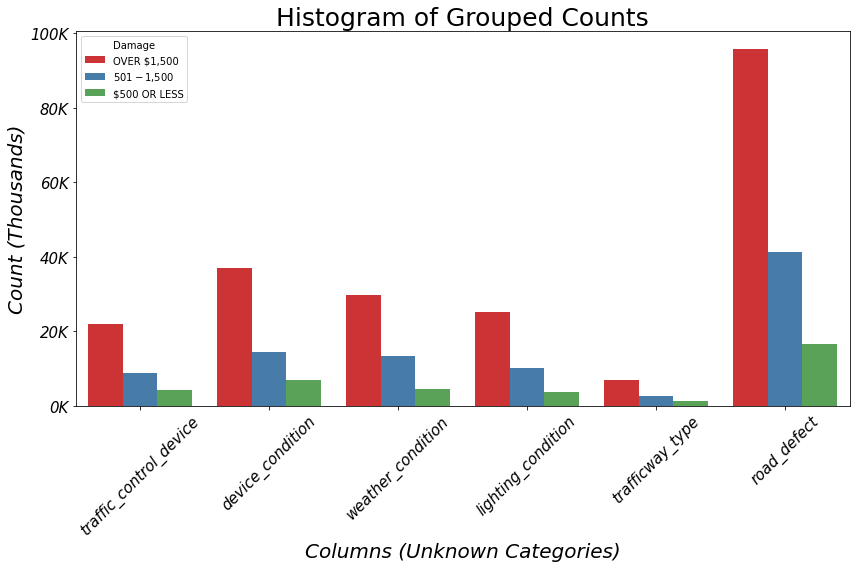

In [119]:
hist_visual(grouped_damage_counts, 'Damage')

#### Visualize the counts with histograms: Injuries.

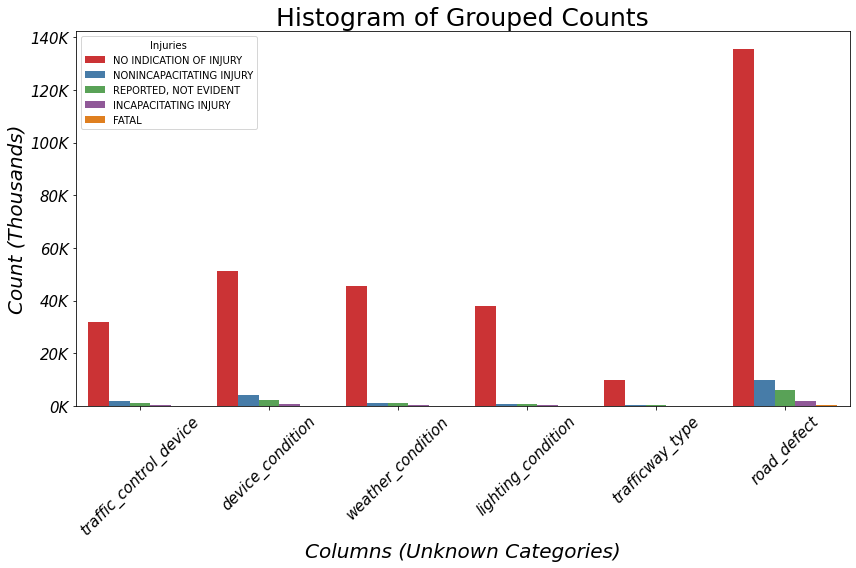

In [120]:
hist_visual(grouped_injury_counts, 'Injuries')

#### Visualize the counts with histograms: Reporting Delay.

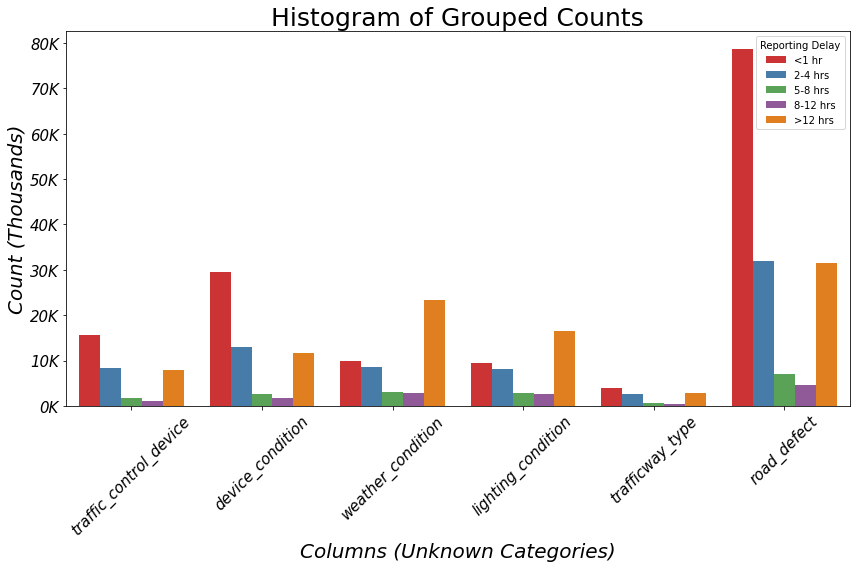

In [121]:
hist_visual(grouped_delay_counts, 'Reporting Delay')

#### Visualize the counts with histograms: Crash Cause.

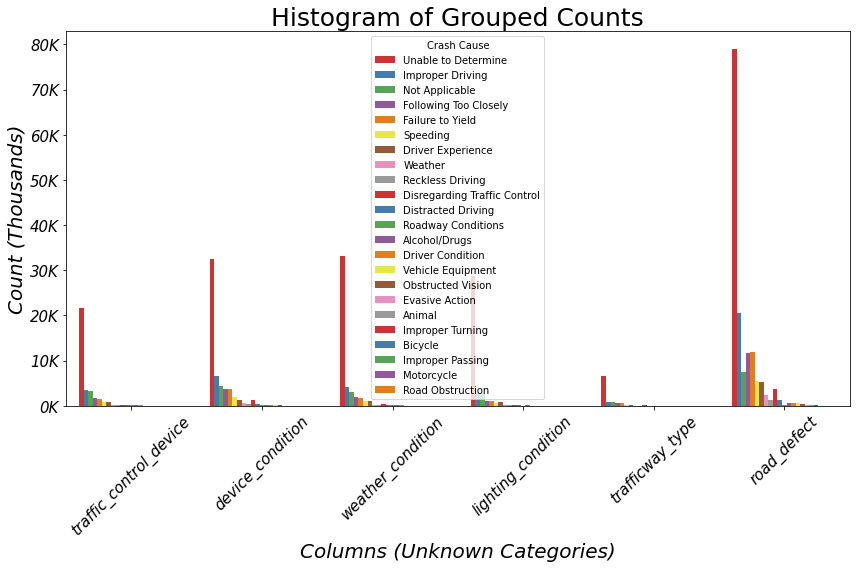

In [122]:
hist_visual(grouped_cause_counts, 'Crash Cause')

#### Print out counts.

In [123]:
# loop through each column with unknowns
for col in df_crashes_unknown_cols:
    # filter out all rows where 'TRAFFICWAY_TYPE' is not 'Unknown'
    df_filtered = df_crashes_clean[df_crashes_clean[col] == 'Unknown']    
    
    # run value counts on the 'year' column
    year_counts = df_filtered['year'].value_counts()
    # run value counts on the 'damage' column
    damage_counts = df_filtered['damage'].value_counts()
    # run value counts on the 'most_severe_injury' column
    injury_counts = df_filtered['most_severe_injury'].value_counts()
    # run value counts on the 'reporting_delay_category' column
    delay_counts = df_filtered['reporting_delay_category'].value_counts()
    # run value counts on the 'prim_contributory_cause' column
    cause_counts = df_filtered['prim_contributory_cause'].value_counts()
                                                                     
    # display the result for the current binary column
    print(f"Value counts for 'crash_year' when '{col}' has Unknown values:")
    print(year_counts)
    print("~~~~~~~~~~~~~~~\n")  # add a blank line for readability between results
    print(f"Value counts for 'damage_counts' when '{col}' has Unknown values:")
    print(damage_counts)
    print("~~~~~~~~~~~~~~~\n")  
                                   
    print(f"Value counts for 'injury_counts' when '{col}' has Unknown values:")
    print(injury_counts)
    print("~~~~~~~~~~~~~~~\n")  
    print(f"Value counts for 'delay_counts' when '{col}' has Unknown values:")
    print(delay_counts)
    print("~~~~~~~~~~~~~~~\n")  
    print(f"Value counts for 'cause_counts' when '{col}' has Unknown values:")
    print(cause_counts)
    print("~~~~~~~~~~~~~~~\n")                        

Value counts for 'crash_year' when 'traffic_control_device' has Unknown values:
2023    7482
2022    5112
2019    3907
2021    3846
2018    3645
2024    3610
2020    2849
2017    2302
2016    1944
2015     377
Name: year, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'damage_counts' when 'traffic_control_device' has Unknown values:
OVER $1,500      21961
$501 - $1,500     8912
$500 OR LESS      4201
Name: damage, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'injury_counts' when 'traffic_control_device' has Unknown values:
NO INDICATION OF INJURY     31859
NONINCAPACITATING INJURY     1799
REPORTED, NOT EVIDENT         995
INCAPACITATING INJURY         398
FATAL                          23
Name: most_severe_injury, dtype: int64
~~~~~~~~~~~~~~~

Value counts for 'delay_counts' when 'traffic_control_device' has Unknown values:
<1 hr       15723
2-4 hrs      8436
>12 hrs      7939
5-8 hrs      1836
8-12 hrs     1140
Name: reporting_delay_category, dtype: int64
~~~~~~~~~~~~~~~

Value cou

#### Brief conclusion about distribution of `Unknown` values:

* There's no visible dependence on `year`, so it's not an artifact of digitizing old reports or updating the report system.
* For all `Unknown` values in the columns, most damages are excessive, so there's no visible indication of underreporting the crashes with low to none damages.
* Most of `Unknown` values in the columns have no injuries (but so is most of the dataset), so we can't make any conclusion yet.
* We can see prevalence of delayed reporting (> 12hrs) for `Unknown` values in `weather_condition`, `lighting_condition`.
* We can see prevalence of `Unable to determine` in primary crash cause for all columns with the `Unknown` values.

### 4. 1. Recap of Traffic Crashes: `Crashes` EDA and Transformations.  

#### EDA.
* The City of Chicago crashes dataset contains information about medium-speed (30-35mph) crashes registered in urban environment. 
* Most crashes happen in clear weather during daylight or on a lit street.
* Most streets are well-maintained and have no road defects.
* Most traffic control devices are not present.
* Most crashes have no injuries and have excessive damages (over 1500USD).
* Most crashes happen on undivided roads, followed by mdeian-divided roads, various types of intersections, and parking garages.
* Most of the first crashes are either hitting parked vehicle or rear-ending.
* Crash number patterns by hour follow commute hours, with an uptic of crashes between 5 and 7 pm. 
* Crash number patterns by hour display steady amount of serious injuries between 11 am and 11 pm.  
* Crash number patterns by day display Sunday as the day with the least crashes and Friday the day with the most crashes.
* Crash number patterns by month mostly steady with slight uptick in May, June, and October.
* Most of crashes are reported within 1 hour, the second most reported is over 8 hours. Crashes reported after 8 hours have an increased number of `Unable to determine` cause.

#### Transformations.

* We started with the `df_crashes` 48 columns and 854910 data entries;
* Over 44% of `df_crashes[PRIM_CONTRIBUTORY_CAUSE]` was either undetermined (333195) or n/a (45295).
* Based on the data ranges in binary columns, we cleaned the values and replaced `nan`s with 0.
* For other categorical columns, we applied generalization, merging together similar categories.
* For the speed limit column, we replaced values 1-12 with 5mph increments and removed all odd rows with numbers not matching canonical speed limit values. We then generalized speed limit into wider bins based on distribution of determined vs undetermined crash causes.
* For the time, day, month columns, we created genral categories (time, month), for the day of the week, we replaced the number with the day name.
* We ended up with 852750 rows and 28 columns, `df_crashes_clean[prim_contributory_cause]` being undetermined in 324845 or n/a in 44181 rows.

#### Note on `Unknown` in categorical columns :

* We learned that `Unknown` is not related to historical reporting.
* We learned that `Unknown` is not related to the amount of damages.
* We learned that `Unknown` is not related to the extent of injuries.
* For weather and lighting conditions, `Unknown` strongly related to the delay in reporting.
* We learned that `Unable to determine` in primary crash cause dominates for all columns with the `Unknown` values.
* If we add up all `Unable to determine` in categorical columns with `Unknown` values, that would amount to 168359, or 1/2 of the entire dataset.

## 4. 2. Overview of Vehicle Crashes: People. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [124]:
df_people.head()

PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X   

   ...  EMS_RUN_NO     DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
1  ...         NaN              NONE  NOT OBSCURED             NORMAL   
2  ...         NaN  IMPROPER BACKING       UNKNOWN            UNKNOWN   
3  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
4  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   

  PEDPEDAL_ACTION PEDPEDAL_VISIBILITY PEDPEDAL_LOCATION        BAC_RESULT  \
0             NaN                 NaN               NaN  TEST NOT OFFERED   
1             NaN                 NaN               NaN  TEST NOT OFFERED   
2             NaN                 NaN               NaN  TEST NOT OFFERED   
3             NaN                 NaN               NaN  TEST NOT OFFERED   
4             NaN                 NaN               NaN  TEST NOT OFFERED   

  BAC_RESULT VALUE CELL_PHONE_USE  
0              NaN            NaN  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  

[5 rows x 29 columns]

In [125]:
df_people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [126]:
display_categorical_vals(df_people)

Column 'PERSON_ID' has unique values: ['O749947' 'O871921' 'O10018' ... 'P411567' 'P411568' 'P411569']
Column 'PERSON_TYPE' has unique values: ['DRIVER' 'PASSENGER' 'PEDESTRIAN' 'BICYCLE' 'NON-MOTOR VEHICLE'
 'NON-CONTACT VEHICLE']
Column 'CRASH_RECORD_ID' has unique values: ['81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554932773284e51271e820d7a3c2398fa53636ac3b5b9004d27ee725ff26cfe65ce9b7869b67572e8f17d'
 'af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568963d242f4b42bd91abfe2e5a046370df528b37a30d594ab2921c37f38f59f7db8863e2e2fa3e9dfa1f'
 '71162af7bf22799b776547132ebf134b5b438dcf3dac6b1ccc744e423da96652f8b51ba415f677df81aa76b994674618744fa0547e1216f32cf320324dcc732e'
 ...
 '5b94999fd7e8057a65771acc3a7811ce625a6715196aa8099efb0c76cf4b5f3c8fcdb967c8800f451b6bddbc6445d4f7002be951f1b21ac60112939c89675009'
 '4795d2b77a415c8f891bcf60f64eaacfc70b7b4d3b38f7514083e3894d86f297c8377ee7e2a7b53b843514233deca1e94cc9495a7e2ca0bb7d7e7bc42c044023'
 'aedab45aa3253b963b77823a1e5a20cbdce25cf524486d9d5623cd0d6

### Displaying percent NaNs in each column.

In [127]:
# display NaNs for df_people
display_df_nans(df_people)

              Column Name      % NaN
0          CELL_PHONE_USE  99.938263
1        BAC_RESULT VALUE  99.889736
2              EMS_RUN_NO  98.311477
3     PEDPEDAL_VISIBILITY  98.082107
4       PEDPEDAL_LOCATION  98.078539
5         PEDPEDAL_ACTION  98.078485
6              EMS_AGENCY  89.864706
7                HOSPITAL  83.608877
8                 SEAT_NO  79.765261
9   DRIVERS_LICENSE_CLASS  51.160084
10  DRIVERS_LICENSE_STATE  41.440063
11                ZIPCODE  33.143666
12                    AGE  29.169279
13                   CITY  27.228322
14                  STATE  26.135488
15          DRIVER_VISION  20.443760
16          DRIVER_ACTION  20.413717
17             BAC_RESULT  20.362687
18     PHYSICAL_CONDITION  20.359225
19             VEHICLE_ID   2.015532
20        AIRBAG_DEPLOYED   1.938827
21                    SEX   1.673182
22               EJECTION   1.242196
23       SAFETY_EQUIPMENT   0.278695
24  INJURY_CLASSIFICATION   0.039152
25            PERSON_TYPE   0.000000
2

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: People` has 29 columns and 1877321 data entries;
* The dataset has a primary kery `PERSON_ID` and two non-primary keys:`CRASH_RECORD_ID`, `VEHICLE_ID`.
* The dataset contains information about the vehicle occupants. 

Columns that can contribute to identifying primary cause would contain information about physical condition (vision, health, BAC), experience (driver's age and drivers licence details), cellphone use.

### Proposed course of action for `df_people`.

We'll select a subset of columns related to driver's age, sex, out-of-state license, vision, action, physical condition, use of cell phone. We'll keep columns related to airbag deployment and hospital trip. 

Based on % NaNs and value distributions in drivers license class column, we'll have to omit it.

### Selecting a subset of columns from `df_people`.

In [128]:
# selecting columns of interest
cols_of_interest = ['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'STATE', 'SEX', 'AGE',\
       'DRIVERS_LICENSE_STATE', 'SAFETY_EQUIPMENT',\
       'AIRBAG_DEPLOYED', 'HOSPITAL','DRIVER_ACTION', 'DRIVER_VISION',\
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',\
       'PEDPEDAL_LOCATION', 'BAC_RESULT']

In [129]:
# selecting subset of original data frame
df_people_slice = df_people[cols_of_interest].copy()
df_people_slice.columns = df_people_slice.columns.str.lower()

### People EDA: cleaning categorical columns: `hospital`.

In [130]:
df_people_slice['hospital'].value_counts().head(40)

REFUSED                      101754
DNA                           38287
NONE                          20868
99                             7364
DECLINED                       7016
UNIVERSITY OF CHICAGO          5713
REFUSED EMS                    4358
HOLY CROSS                     4182
UNKNOWN                        3911
STROGER                        3731
NORTHWESTERN                   2942
COMMUNITY FIRST                2905
MT SINAI                       2894
ILLINOIS MASONIC               2386
UNK                            2298
WEST SUBURBAN                  2116
LITTLE COMPANY OF MARY         1937
TRINITY                        1933
CHRIST                         1703
ROSELAND                       1679
EMS REFUSED                    1663
MT. SINAI                      1644
JACKSON PARK                   1574
CHRIST HOSPITAL                1537
NORWEGIAN                      1488
ST BERNARD                     1459
U OF C                         1436
LORETTO                     

The values in this column come from the on scene report and have greater variability in them.
We'll define a decline pattern as the one containing keywords `99`, `Unknown`, `DNA`, `refuse`, `decline` and replace all values matching decline pattern with 0. 

In [131]:
# define the pattern to match the values you want to set to 0
decline_pattern = 'refuse|decline|unk|99|DNA|unknown|none'

# Use .loc to update values that match the pattern
df_people_slice.loc[df_people_slice['hospital'].str.contains(decline_pattern, \
                                                             case=False, na=False), 'hospital'] = 0

# set all other values to 1
df_people_slice.loc[df_people_slice['hospital'] != 0, 'hospital'] = 1
# replace NaNs with 0
df_people_slice['hospital'] = df_people_slice['hospital'].fillna(0)

In [132]:
df_people_slice['hospital'].value_counts()

1    1676211
0     201110
Name: hospital, dtype: int64

### People EDA: cleaning categorical columns: `airbag_deployed`.

In [133]:
df_people_slice['airbag_deployed'].value_counts()

DID NOT DEPLOY                            950455
NOT APPLICABLE                            390430
DEPLOYMENT UNKNOWN                        375875
DEPLOYED, FRONT                            58857
DEPLOYED, COMBINATION                      47379
DEPLOYED, SIDE                             17012
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       915
Name: airbag_deployed, dtype: int64

In [134]:
# mapping for generalizing the values
generalization_mapping = {
    'DID NOT DEPLOY': 'No',
    'NOT APPLICABLE': 'Not Applicable',
    'DEPLOYMENT UNKNOWN': 'Unknown',
    'DEPLOYED, FRONT': 'Yes',
    'DEPLOYED, COMBINATION': 'Yes',
    'DEPLOYED, SIDE': 'Yes',
    'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'Yes'
}

# apply the generalization
df_people_slice['airbag_deployed'] = df_people_slice['airbag_deployed'].replace(generalization_mapping)
# replace NaNs with Uknown
df_people_slice['airbag_deployed'] = df_people_slice['airbag_deployed'].fillna('Unknown')

In [135]:
df_people_slice['airbag_deployed'].value_counts()

No                950455
Unknown           412273
Not Applicable    390430
Yes               124163
Name: airbag_deployed, dtype: int64

### People EDA: cleaning categorical columns: `driver_action`.

In [136]:
df_people_slice['driver_action'].value_counts()

NONE                                 532842
UNKNOWN                              378104
FAILED TO YIELD                      135964
OTHER                                134116
FOLLOWED TOO CLOSELY                  87961
IMPROPER BACKING                      44179
IMPROPER TURN                         39273
IMPROPER LANE CHANGE                  38420
IMPROPER PASSING                      33450
DISREGARDED CONTROL DEVICES           26431
TOO FAST FOR CONDITIONS               22216
WRONG WAY/SIDE                         6001
IMPROPER PARKING                       5511
OVERCORRECTED                          2860
EVADING POLICE VEHICLE                 2356
CELL PHONE USE OTHER THAN TEXTING      2190
EMERGENCY VEHICLE ON CALL              1386
TEXTING                                 586
STOPPED SCHOOL BUS                      179
LICENSE RESTRICTIONS                     65
Name: driver_action, dtype: int64

In [137]:
# mapping table
generalization_mapping = {
    'NONE': 'None',
    'UNKNOWN': 'Unknown',
    'FAILED TO YIELD': 'Disregarding Controls/Signs',
    'OTHER': 'Other',
    'FOLLOWED TOO CLOSELY': 'Distance',
    'IMPROPER BACKING': 'Improper Manouver',
    'IMPROPER TURN': 'Improper Manouver',
    'IMPROPER LANE CHANGE': 'Improper Manouver',
    'IMPROPER PASSING': 'Improper Manouver',
    'DISREGARDED CONTROL DEVICES': 'Disregarding Controls/Signs',
    'TOO FAST FOR CONDITIONS': 'Speeding',
    'WRONG WAY/SIDE': 'Wrong Way',
    'IMPROPER PARKING': 'Improper Manouver',
    'OVERCORRECTED': 'Improper Manouver',
    'EVADING POLICE VEHICLE': 'Evading',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distraction',
    'EMERGENCY VEHICLE ON CALL': 'Other',
    'TEXTING': 'Distraction',
    'STOPPED SCHOOL BUS': 'School Bus',
    'LICENSE RESTRICTIONS': 'License Restrictions'
}
# apply the generalization
df_people_slice['driver_action'] = df_people_slice['driver_action'].replace(generalization_mapping)
# replace NaNs with Uknown
df_people_slice['driver_action'] = df_people_slice['driver_action'].fillna('Unknown')

In [138]:
df_people_slice['driver_action'].value_counts()

Unknown                        761335
None                           532842
Improper Manouver              163693
Disregarding Controls/Signs    162395
Other                          135502
Distance                        87961
Speeding                        22216
Wrong Way                        6001
Distraction                      2776
Evading                          2356
School Bus                        179
License Restrictions               65
Name: driver_action, dtype: int64

### People EDA: cleaning categorical columns: `driver_vision`.

In [139]:
df_people_slice['driver_vision'].value_counts()

NOT OBSCURED              750633
UNKNOWN                   707186
OTHER                      14759
MOVING VEHICLES             8383
PARKED VEHICLES             5163
WINDSHIELD (WATER/ICE)      4047
BLINDED - SUNLIGHT          1763
TREES, PLANTS                591
BUILDINGS                    524
BLINDED - HEADLIGHTS         159
BLOWING MATERIALS            103
HILLCREST                     97
EMBANKMENT                    83
SIGNBOARD                     35
Name: driver_vision, dtype: int64

In [140]:
# mapping for generalizing the values
generalization_mapping = {
    'NOT OBSCURED': 'Clear',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'MOVING VEHICLES': 'Obscured',
    'PARKED VEHICLES': 'Obscured',
    'WINDSHIELD (WATER/ICE)': 'Obscured, windshield',
    'BLINDED - SUNLIGHT': 'Blinded',
    'TREES, PLANTS': 'Obscured',
    'BUILDINGS': 'Obscured',
    'BLINDED - HEADLIGHTS': 'Blinded',
    'BLOWING MATERIALS': 'Obscured, windshield',
    'HILLCREST': 'Obscured',
    'EMBANKMENT': 'Obscured',
    'SIGNBOARD': 'Obscured'
}

# apply the generalization
df_people_slice['driver_vision'] = df_people_slice['driver_vision'].replace(generalization_mapping)
# replace NaNs with Unknown
df_people_slice['driver_vision'] = df_people_slice['driver_vision'].fillna('Unknown')

In [141]:
df_people_slice['driver_vision'].value_counts()

Unknown                 1090981
Clear                    750633
Obscured                  14876
Other                     14759
Obscured, windshield       4150
Blinded                    1922
Name: driver_vision, dtype: int64

### People EDA: cleaning categorical columns: `physical_condition`.

In [142]:
df_people_slice['physical_condition'].value_counts()

NORMAL                          970573
UNKNOWN                         496973
IMPAIRED - ALCOHOL                6344
REMOVED BY EMS                    5439
OTHER                             4351
FATIGUED/ASLEEP                   3934
EMOTIONAL                         3783
ILLNESS/FAINTED                   1354
HAD BEEN DRINKING                 1083
IMPAIRED - DRUGS                   707
IMPAIRED - ALCOHOL AND DRUGS       389
MEDICATED                          183
Name: physical_condition, dtype: int64

In [143]:
# mapping for generalizing the values
generalization_mapping = {
    'NORMAL': 'Normal',
    'UNKNOWN': 'Unknown',
    'IMPAIRED - ALCOHOL': 'Impaired',
    'IMPAIRED - DRUGS': 'Impaired',
    'IMPAIRED - ALCOHOL AND DRUGS': 'Impaired',
    'MEDICATED': 'Impaired',
    'HAD BEEN DRINKING': 'Impaired',
    'FATIGUED/ASLEEP': 'Fatigue',
    'EMOTIONAL': 'Distressed',
    'ILLNESS/FAINTED': 'Illness',
    'REMOVED BY EMS': 'Other',
    'OTHER': 'Other'
}

# apply the generalization
df_people_slice['physical_condition'] = df_people_slice['physical_condition'].replace(generalization_mapping)
# replace NaNs with Unknown
df_people_slice['physical_condition'] = df_people_slice['physical_condition'].fillna('Unknown')

In [144]:
df_people_slice['physical_condition'].value_counts()

Normal        970573
Unknown       879181
Other           9790
Impaired        8706
Fatigue         3934
Distressed      3783
Illness         1354
Name: physical_condition, dtype: int64

### People EDA: cleaning categorical columns: `pedpedal_action`, `pedpedal_visibility`,`pedpedal_location`.

In [145]:
df_people_slice['pedpedal_action'].value_counts()

CROSSING - WITH SIGNAL                               7306
WITH TRAFFIC                                         5519
UNKNOWN/NA                                           4579
OTHER ACTION                                         4164
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         2406
CROSSING - NO CONTROLS (AT INTERSECTION)             2033
NO ACTION                                            1986
CROSSING - AGAINST SIGNAL                            1720
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)    1165
NOT AT INTERSECTION                                  1120
AGAINST TRAFFIC                                      1066
STANDING IN ROADWAY                                   826
TURNING LEFT                                          530
PARKED VEHICLE                                        431
ENTER FROM DRIVE/ALLEY                                343
WORKING IN ROADWAY                                    242
TURNING RIGHT                                         232
INTOXICATED PE

In [146]:
# mapping
generalization_mapping = {
    'CROSSING - WITH SIGNAL': 'Crossing',
    'WITH TRAFFIC': 'With traffic',
    'UNKNOWN/NA': 'Unknown',
    'OTHER ACTION': 'Other',
    'CROSSING - NO CONTROLS (NOT AT INTERSECTION)': 'Crossing',
    'CROSSING - NO CONTROLS (AT INTERSECTION)': 'Crossing, intersection',
    'NO ACTION': 'Other',
    'CROSSING - AGAINST SIGNAL': 'Crossing',
    'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)': 'Crossing',
    'NOT AT INTERSECTION': 'Crossing',
    'AGAINST TRAFFIC': 'Against traffic',
    'STANDING IN ROADWAY': 'Standing',
    'TURNING LEFT': 'Turning',
    'PARKED VEHICLE': 'Stationary',
    'ENTER FROM DRIVE/ALLEY': 'Other',
    'WORKING IN ROADWAY': 'Moving',
    'TURNING RIGHT': 'Turning',
    'INTOXICATED PED/PEDAL': 'Other',
    'PLAYING IN ROADWAY': 'Moving',
    'PLAYING/WORKING ON VEHICLE': 'Moving',
    'TO/FROM DISABLED VEHICLE': 'Moving',
    'SCHOOL BUS (WITHIN 50 FT.)': 'School Bus',
    'WAITING FOR SCHOOL BUS': 'School Bus'
}

# apply the generalization
df_people_slice['pedpedal_action'] = df_people_slice['pedpedal_action'].replace(generalization_mapping)
# replace NaNs with `Unknown`
df_people_slice['pedpedal_action'] = df_people_slice['pedpedal_action'].fillna('Unknown')

In [147]:
df_people_slice['pedpedal_action'].value_counts()

Unknown                   1845827
Crossing                    13717
Other                        6688
With traffic                 5519
Crossing, intersection       2033
Against traffic              1066
Standing                      826
Turning                       762
Stationary                    431
Moving                        423
School Bus                     29
Name: pedpedal_action, dtype: int64

In [148]:
df_people_slice['pedpedal_visibility'].value_counts()

NO CONTRASTING CLOTHING    28341
CONTRASTING CLOTHING        4678
OTHER LIGHT SOURCE USED     2067
REFLECTIVE MATERIAL          919
Name: pedpedal_visibility, dtype: int64

In [149]:
# replace 'NO CONTRASTING CLOTHING' with 0 and everything else with 1
df_people_slice['pedpedal_visibility'] = df_people_slice['pedpedal_visibility'].apply(lambda x: \
                                                                                      0 if x == 'NO CONTRASTING CLOTHING' else 1)
# replace NaNs with 0
df_people_slice['pedpedal_visibility'] = df_people_slice['pedpedal_visibility'].fillna(0)

In [150]:
df_people_slice['pedpedal_visibility'].value_counts()

1    1848980
0      28341
Name: pedpedal_visibility, dtype: int64

In [151]:
df_people_slice['pedpedal_location'].value_counts()

IN ROADWAY         15809
IN CROSSWALK       12046
UNKNOWN/NA          3026
NOT IN ROADWAY      1602
BIKEWAY             1554
BIKE LANE           1302
DRIVEWAY ACCESS      518
SHOULDER             215
Name: pedpedal_location, dtype: int64

In [152]:
# define mapping for generalizing the values
generalization_mapping = {
    'IN ROADWAY': 'Roadway',
    'IN CROSSWALK': 'Crosswalk',
    'UNKNOWN/NA': 'Unknown',
    'NOT IN ROADWAY': 'Not in Roadway',
    'BIKEWAY': 'Bike Lane/Shoulder',
    'BIKE LANE': 'Bike Lane/Shoulder',
    'DRIVEWAY ACCESS': 'Driveway',
    'SHOULDER': 'Bike Lane/Shoulder'
}

# apply the generalization 
df_people_slice['pedpedal_location'] = df_people_slice['pedpedal_location'].replace(generalization_mapping)
# replace NaNs with `Unknown`
df_people_slice['pedpedal_location'] = df_people_slice['pedpedal_location'].fillna('Unknown')

In [153]:
df_people_slice['pedpedal_location'].value_counts()

Unknown               1844275
Roadway                 15809
Crosswalk               12046
Bike Lane/Shoulder       3071
Not in Roadway           1602
Driveway                  518
Name: pedpedal_location, dtype: int64

### People EDA: cleaning categorical columns: `safety_equpment`.

In [154]:
df_people_slice['safety_equipment'].value_counts()

USAGE UNKNOWN                                 884771
SAFETY BELT USED                              878540
NONE PRESENT                                   62997
SAFETY BELT NOT USED                           10227
HELMET NOT USED                                 9066
CHILD RESTRAINT USED                            7822
CHILD RESTRAINT - FORWARD FACING                4732
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      3530
CHILD RESTRAINT - TYPE UNKNOWN                  2479
CHILD RESTRAINT - REAR FACING                   2149
DOT COMPLIANT MOTORCYCLE HELMET                 1407
HELMET USED                                     1358
BOOSTER SEAT                                    1230
CHILD RESTRAINT NOT USED                         837
NOT DOT COMPLIANT MOTORCYCLE HELMET              262
SHOULD/LAP BELT USED IMPROPERLY                  254
WHEELCHAIR                                       231
CHILD RESTRAINT USED IMPROPERLY                  152
STRETCHER                                     

In [155]:
# mapping for generalizing
generalization_mapping = {
    'USAGE UNKNOWN': 'Unknown',
    'SAFETY BELT USED': 'Used',
    'NONE PRESENT': 'None',
    'SAFETY BELT NOT USED': 'Not Used',
    'HELMET NOT USED': 'Not Used',
    'CHILD RESTRAINT USED': 'Used',
    'CHILD RESTRAINT - FORWARD FACING': 'Used',
    'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'Used',
    'CHILD RESTRAINT - TYPE UNKNOWN': 'Used',
    'CHILD RESTRAINT - REAR FACING': 'Used',
    'DOT COMPLIANT MOTORCYCLE HELMET': 'Used',
    'HELMET USED': 'Used',
    'BOOSTER SEAT': 'Used',
    'CHILD RESTRAINT NOT USED': 'Not Used',
    'NOT DOT COMPLIANT MOTORCYCLE HELMET': 'Not Used',
    'SHOULD/LAP BELT USED IMPROPERLY': 'Not Used',
    'WHEELCHAIR': 'Other',
    'CHILD RESTRAINT USED IMPROPERLY': 'Not Used',
    'STRETCHER': 'Other'
}
# apply the generalization 
df_people_slice['safety_equipment'] = df_people_slice['safety_equipment'].replace(generalization_mapping)
# replace NaNs with `Unknown`
df_people_slice['safety_equipment'] = df_people_slice['safety_equipment'].fillna('Unknown')

In [156]:
df_people_slice['safety_equipment'].value_counts()

Used        903247
Unknown     890003
None         62997
Not Used     20798
Other          276
Name: safety_equipment, dtype: int64

### People EDA: cleaning categorical columns: `bac_result`.

In [157]:
df_people_slice['bac_result'].value_counts()

TEST NOT OFFERED                   1473357
TEST REFUSED                         15477
TEST PERFORMED, RESULTS UNKNOWN       3572
TEST TAKEN                            2642
Name: bac_result, dtype: int64

In [158]:
# mapping for generalizing
generalization_mapping = {
    'TEST NOT OFFERED': 'Not Offered',
    'TEST REFUSED': 'Refused',
    'TEST TAKEN': 'Taken',
    'TEST PERFORMED, RESULTS UNKNOWN': 'Taken',
    'nan': 'Not Offered'
}
# apply the generalization 
df_people_slice['bac_result'] = df_people_slice['bac_result'].replace(generalization_mapping)

# impute NaNs with `Not Offered`
df_people_slice['bac_result'] = df_people_slice['bac_result'].fillna('Not Offered')

In [159]:
df_people_slice['bac_result'].value_counts()

Not Offered    1855630
Refused          15477
Taken             6214
Name: bac_result, dtype: int64

### People EDA: creating a binary column if driver is out of state.

In [ ]:
# create a new binary column 'out_of_state' where 1 means the driver is out of state, and 0 means they are in-state
df_people_slice['driver_out_of_state'] = df_people_slice.apply(lambda row: \
                                                        1 if row['state'] != row['drivers_license_state'] \
                                                        else 0, axis=1)
# impute NaNs with `0`
df_people_slice['driver_out_of_state'] = df_people_slice['driver_out_of_state'].fillna(0)

In [ ]:
df_people_slice['driver_out_of_state'].value_counts()

### People EDA: categorizing driver's age.

First, we'll take a look at age distribution.

In [ ]:
# count plot for 'reporting_delay_category'
fig, ax = countplot_df_crashes(df_people_slice, 'age')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

#### Data issues: negative age and out-of limits age.
Confirm with `value_counts()`:

In [ ]:
df_people_slice['age'].value_counts()

#### Data cleaning: use absolute value of age, check age count after 90.
We'll expect to see a number of ages over 90, what we're looking for is a steady decline as age goes up.
We also want to be sure there's no uptick in age 99 (code for unknown).

In [ ]:
# replace age with abs(age)
df_people_slice['age'] = df_people_slice['age'].abs()

In [ ]:
#get the value counts for all ages over 90
df_people_slice[df_people_slice['age'] > 90]['age'].value_counts()

One minor fix, we'll replace age 177 with age 77.

In [ ]:
# replace 177 age with 77
df_people_slice.loc[df_people_slice['age'] == 177, 'age'] = 77

In [ ]:
# count plot for 'reporting_delay_category'
fig, ax = countplot_df_crashes(df_people_slice, 'age')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

In [ ]:
# replace NaNs with 'Unknown'
df_people_slice['age'] = df_people_slice['age'].fillna('Unknown')

We'll stop with `age` for now, we'll perform more EDA once this dataset is merged with the crashes to allowing us better categorization.

### People EDA: cleaning `sex` column.

In [ ]:
# replace NaNs with 'Unknown'
df_people_slice['sex'] = df_people_slice['age'].fillna('X')

### People EDA: selecting a non-passenger subset.
We'll select a subset of columns, remove NaNs from the subset, confirm with the output.
We'll also remove all entries related to passengers.

In [ ]:
df_people_slice['person_type'].value_counts()

In [ ]:
# mapping for generalizing
generalization_mapping = {
    'DRIVER': 'Driver',
    'PASSENGER': np.nan,
    'PEDESTRIAN': 'Pedestrian',
    'BICYCLE': 'Cyclist',
    'NON-CONTACT VEHICLE': np.nan,
    'NON-MOTOR VEHICLE': np.nan
}
# apply the generalization 
df_people_slice['person_type'] = df_people_slice['person_type'].replace(generalization_mapping)

In [ ]:
df_people_slice['person_type'].value_counts()

### People EDA: selecting subset for future analysis and dropping NaNs.

In [ ]:
df_people_slice.columns

In [ ]:
# cols to keep_keep
people_cols_to_keep = ['person_type', 'crash_record_id', 'vehicle_id', 'sex', 'age', 'safety_equipment',
       'airbag_deployed', 'hospital', 'driver_action', 'driver_vision',
       'physical_condition', 'pedpedal_action', 'pedpedal_visibility',
       'pedpedal_location', 'bac_result', 'driver_out_of_state']

df_to_keep = df_people_slice[people_cols_to_keep]
df_people_clean = df_to_keep.dropna().copy()

In [ ]:
df_people_clean.shape

### Recapping of people EDA and cleaning.

* We started with  29 columns and 1877321 rows.  After cleaning, we ended with 16 columns and 1459439 rows, losing 418 thousand entries mostly related to passenger `person_type`.
* This dataset shows signs of incomplete logging, with multiple columns conyaining large amount of NaNs.
* Our cleaning mostly involved applying generalization to categories `safety_equipment`,
       `airbag_deployed`, `driver_action`, `driver_vision`,
       `physical_condition`, `pedpedal_action`, `pedpedal_visibility`,
       `pedpedal_location`, `bac_result` and imputing NaNs with appropriate entries.
* We created two binary columns: whenever the driver is out of state and whenever there was an ambulance trip.
* We dropped all passenger entries.
* We only cleaned `age`, we'll apply categorization once we merge it with other datasets.

## 4. 3. Overview of Vehicle Crashes: Vehicles. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [ ]:
df_vehicles.head()

In [ ]:
df_vehicles.columns

In [ ]:
display_categorical_vals(df_vehicles)

In [ ]:
display_df_nans(df_vehicles)

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: Vehicle` has 71 columns and 1743922 data entries;
* The dataset has a primary kery `CRASH_UNIT_ID` and two non-primary keys:`CRASH_RECORD_ID`, `VEHICLE_ID`.
* The dataset contains information about the vehicle, such as make, model, defect. 

Columns that can contribute to identifying primary cause would contain information about the number of passengers, vehicle details, and driver's manouvers before the crash.

### Proposed course of action for `df_vehicles`.

We'll select a subset of columns related to vehicle's make, model, type, defects.
We'll consider total length,number of axles, number of occupants, travel direction, first contact point, manouver before crash.  

### Selecting a subset of columns from `df_vehicles`.

In [ ]:
cols_of_interest = ['CRASH_RECORD_ID', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'EXCEED_SPEED_LIMIT_I', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT','WIDE_LOAD_I', 'HAZMAT_PRESENT_I']

# selecting subset of original data frame
df_vehicles_slice = df_vehicles[cols_of_interest].copy()
df_vehicles_slice.columns = df_vehicles_slice.columns.str.lower()

### Vehicles EDA and Cleaning: `unit_type`.

In [ ]:
# value counts for unit_type
df_vehicles_slice['unit_type'].value_counts()

In [ ]:
# mapping for generalized values
generalization_mapping = {
    'DRIVER': 'Driver',
    'PARKED': 'Parked',
    'PEDESTRIAN': 'Pedestrian',
    'BICYCLE': 'Cyclist',
    'DRIVERLESS': 'Other',
    'NON-MOTOR VEHICLE': 'Other',
    'NON-CONTACT VEHICLE': 'Other',
    'DISABLED VEHICLE': 'Other',
    'EQUESTRIAN': 'Other'
}

# apply the generalization
df_vehicles_slice['unit_type'] = df_vehicles_slice['unit_type'].replace(generalization_mapping)

In [ ]:
df_vehicles_slice['unit_type'].value_counts()

### Vehicles EDA and Cleaning: `make`, `model`.

We'll expect to see variations of various manufacturers, that's why we list all makes over 1000 first.

In [ ]:
# convert names to title 
df_vehicles_slice['make'] = df_vehicles_slice['make'].str.title()

df_vehicles_slice['make'].value_counts()[df_vehicles_slice['make'].value_counts() > 1000]

In [ ]:
df_vehicles_slice['make'].value_counts()[(df_vehicles_slice['make'].value_counts() < 1000) & 
                                         (df_vehicles_slice['make'].value_counts() > 100)]

In [ ]:
# replace duplicate values for Lincoln
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace('Lincoln-Continental', 'Lincoln')

# replace duplicate values for Lincoln
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace(['International Harvester Company', \
                                                              'International Harvester Co.', \
                                                              'International Harvester'], 'Intl.Harvester')

# replace Amtran Corp, Gensis Buses with Genesis
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace('Amtran Corp, Gensis Buses', 'Genesis')

# replace homemade with 'Unknown'
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace('(Homemade Motorcycle, Moped.Etc.)', 'Unknown')

# replace Cooper with 'Mini'
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace('Cooper', 'Mini')

# replace Am General/Hummer with 'Hummer'
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace('Am General/Hummer', 'Hummer')


# replace 'Utility Trailer' with 'Unknown'
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace(['Utility Trailer', \
                                                               'Utility'], 'Unknown')

# reduce make to first word only
df_vehicles_slice['make'] = df_vehicles_slice['make'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# get the value counts of the 'make' column
make_counts = df_vehicles_slice['make'].value_counts()

# fill NaN values with a placeholder like 'Unknown'
df_vehicles_slice['make'] = df_vehicles_slice['make'].fillna('Unknown')

# replace values with less than 50 occurrences, safely handling missing keys
df_vehicles_slice['make'] = df_vehicles_slice['make'].apply(
    lambda x: 'Unknown' if make_counts.get(x, 0) < 50 else x
)

In [ ]:
# check new values
df_vehicles_slice['make'].value_counts()

Looks like we accidentally cut parts of some car makes, we'll fix it later when we update the `model`.

We'll have same expectations about the `model` column having redundant values, we'll list all models with more than 10000 entries first.

In [ ]:
df_vehicles_slice['model'].value_counts()[df_vehicles_slice['model'].value_counts() > 10000]

#### Potential issue: `make` is unknown and `model` has vehicle make in it.

* We'll create a set of all unique makes and check against the models.
* We'll add a supplemental function that will try to mach the model with a make and add match in a new column.
* We'll replace all Unknown makes with the matched makes.

In [ ]:
# convert names to title 
df_vehicles_slice['model'] = df_vehicles_slice['model'].str.title()

In [ ]:
# replace OTHER (EXPLAIN IN NARRATIVE) with 'Unknown'
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace('Other (Explain In Narrative)', \
                                                                'Unknown')
# replace Motorized with 'Unknown'
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace('Motorized', 'Unknown')
# fill NaNs with 'Unknown'
df_vehicles_slice['model'] = df_vehicles_slice['model'].fillna('Unknown')

In [ ]:
# create a set of unique makes
unique_makes = set(df_vehicles_slice['make'])

In [ ]:
# function to find a partial match between model and set of makes
def partial_match_model_with_make(model, makes):
    for make in makes:
        if isinstance(model, str) and make.lower() in model.lower():
            return make
    return 'Unknown'

# apply the function to the 'model' column and store results in a new column
df_vehicles_slice['matched_make'] = df_vehicles_slice['model'].apply(\
                                                                     lambda model: \
                                                                     partial_match_model_with_make(model,\
                                                                                                   unique_makes))

In [ ]:
# filter the df where 'matched_make' is not 'Unknown'
filtered_df = df_vehicles_slice[df_vehicles_slice['matched_make'] != 'Unknown']

# do value counts on the 'make' column for the filtered rows
filtered_df['make'].value_counts()

In [ ]:
# replace 'Unknown' make with matched make
df_vehicles_slice.loc[df_vehicles_slice['make'] == 'Unknown', 'make'] = df_vehicles_slice['matched_make']

In [ ]:
# set display option to show all rows
pd.set_option('display.max_rows', None)
df_vehicles_slice['make'].value_counts()

In [ ]:
# fix incorrectly converted names 

make_to_replace = {'(Homemade': 'Unknown', 
                  '(Unlisted': 'Unknown', 
                  'Truck': 'Unknown',
                   'Van': 'Unknown', 
                   'Motor': 'Unknown',
                   'International': 'Intl.Trailer',
                   'General': 'GMC',
                   'Yukon': 'GMC',
                   'Transit':' Ford'
                   'Deere,': 'Deere',
                   'Dart,': 'Dart',
                   'Range':'Range Rover',
                   'Land':'Land Rover',
                   'New':'New Flyer',
                   'Sprinter':'Mercedes-Benz',
                   'Alpha':'Alfa-Romeo',
                   'Alfa':'Alfa-Romeo',
                   'Mini': 'Mini Cooper',
                   'Cooper':'Mini Cooper', 
                   'Blue':'Bluebird',
                   'Fleet':'Fleetcraft',
                   'Great':'Great Dane',
                   'Suburban':'Chevrolet'
                  }
# apply replacement map
df_vehicles_slice['make'] = df_vehicles_slice['make'].replace(make_to_replace)

In [ ]:
df_vehicles_slice['make'].value_counts()

#### Going back to `models`:

#### Cleaning steps:

* Replace Make+Model with Model.
* Replace generalized make or body type with 'Unknown'.
* Use `isinstance` function to check if model matches the make, if it does, add a new column `matched_make`.
* Do `value_counts()` of the `make` to see if we can add more missing info.
* For all models with `matched_make`, set model to `Unknown`. 

In [ ]:
# fix instances of make-model with model:
models_to_replace = {'Nissan Altima':'Altima',
                     'Nissan Maxima':'Maxima',
                     'Mazda3':'3',
                     'Mazda6':'6',
                     'Truck': 'Unknown',
                     'Van': 'Unknown',
                     'Ford-Truck,Van,Suv, Etc': 'Unknown',
                     'General Motors Corp.':'Unknown',
                     'Motorcycle':'Unknown',
                     'Open Body':'Unknown',
                     'Blue Bird Body Co.': 'Unknown',
}
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace(models_to_replace)

In [ ]:
# replace 'model' with 'Unknown' where 'matched_make' is not 'Unknown'
df_vehicles_slice.loc[df_vehicles_slice['matched_make'] != 'Unknown', 'model'] = 'Unknown'

In [ ]:
df_vehicles_slice['model'].value_counts()[(df_vehicles_slice['model'].value_counts() > 1000)]

#### Supplemental function that will remove `(content) /content ` from model names.

In [ ]:
# import regexp
import re

# function to apply the replacement rule
def clean_model(model):
    if isinstance(model, str):
        # if the model contains a number (like Ram 1500 Van), keep the first word and the number
        if re.search(r'\d+', model):
            # Find the first word and the first number with its suffix (e.g., 'Econoline E-450')
            match = re.match(r'(\w+ \w*\d+)', model)
            return match.group(1) if match else model.split()[0]
        else:
            # for models without numbers, keep only the first word
            return model.split()[0]
    return model

# apply the function to the 'model' column
df_vehicles_slice['model'] = df_vehicles_slice['model'].apply(clean_model)

In [ ]:
df_vehicles_slice['model'].value_counts()[(df_vehicles_slice['model'].value_counts() > 1000)]

In [ ]:
# replace 'Cooper' with Unknown
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace('Cooper', 'Unknown')

In [ ]:
df_vehicles_slice['model'].value_counts()[(df_vehicles_slice['model'].value_counts() < 1000)]

In [ ]:
# fix Audi  with Unknown
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace('Quattro', 'Unknown')
# fix (Reconstructed with Unknown
df_vehicles_slice['model'] = df_vehicles_slice['model'].replace('(Reconstructed', 'Unknown')

In [ ]:
# replace values with less than 10 occurrences with Unknown
df_vehicles_slice['model'] = df_vehicles_slice['model'].apply(
    lambda x: 'Unknown' if make_counts.get(x, 0) < 50 else x)

In [ ]:
df_vehicles_slice['model'].value_counts()

In [ ]:
pd.reset_option('display.max_rows')

### Vehicles EDA: cleaning `VEHICLE_DEFECT`, `VEHICLE_TYPE`, `VEHICLE_USE`, `VEHICLE_YEAR`.

### Vehicles EDA: cleaning `OCCUPANT_CNT`, `TOTAL_VEHICLE_LENGTH`, `AXLE_CNT`.

### Vehicles EDA: cleaning `TRAVEL_DIRECTION`, `MANEUVER`, `FIRST_CONTACT_POINT`. 

### Vehicles EDA: cleaning `TOWED_I`, `EXCEED_SPEED_LIMIT_I`, `WIDE_LOAD_I`, `HAZMAT_PRESENT_I`.

In [ ]:
df_vehicles_slice['vehicle_defect'].value_counts()

### Proposed columns to drop for each dataset.

### Observarions after loading the datasets.

* `Traffic Crashes: Crashes` -- 48 columns, 854910 data entries;
* `Traffic Crashes: People` -- 29 columns, 1877321 data entries;
* `Traffic Crashes: Vehicles` -- 71 columns, 1743922 data entries;


| Contributing Factors                         | Primary Cause                                                                                                               | Relevant Columns                                                    |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| Speed-related, weather condition-related:    | FAILING TO REDUCE SPEED TO AVOID CRASH, EXCEEDING AUTHORIZED SPEED LIMIT, EXCEEDING SAFE SPEED FOR CONDITIONS                 | POSTED_SPEED_LIMIT, 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'EXCEED_SPEED_LIMIT_I' |
| Weather-related, vision-related              | WEATHER, VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                                                | 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'DRIVER_VISION'          |
| Disregarding traffic signs or road markings  | DISREGARDING STOP SIGN, DISREGARDING TRAFFIC SIGNALS, DISREGARDING OTHER TRAFFIC SIGNS, DISREGARDING ROAD MARKINGS, DISREGARDING YIELD SIGN | "INTERSECTION_RELATED_I', 'DRIVER_ACTION', 'NOT_RIGHT_OF_WAY_I', 'TRAVEL_DIRECTION', 'MANEUVER'" |
| Improper vehicle operation                   | IMPROPER OVERTAKING/PASSING, IMPROPER LANE USAGE, IMPROPER TURNING/NO SIGNAL, IMPROPER BACKING, TURNING RIGHT ON RED, OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, DRIVING ON WRONG SIDE/WRONG WAY, FOLLOWING TOO CLOSELY, RELATED TO BUS STOP, BICYCLE ADVANCING LEGALLY ON RED LIGHT, FAILING TO YIELD RIGHT-OF-WAY | 'NOT_RIGHT_OF_WAY_I', POSTED_SPEED_LIMIT, 'FIRST_CRASH_TYPE', 'CRASH_TYPE', 'DRIVER_ACTION', 'TRAVEL_DIRECTION', 'MANEUVER' |
| Driving experience                           | DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                                                          | 'DRIVER_ACTION', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'LIC_PLATE_STATE' |
| Distraction Outside                          | DISTRACTION - FROM OUTSIDE VEHICLE, EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, ANIMAL                                 | 'DRIVER_ACTION'                                                    |
| Distraction Inside                           | DISTRACTION - FROM INSIDE VEHICLE, CELL PHONE USE OTHER THAN TEXTING, DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.) | 'DRIVER_ACTION', 'CELL_PHONE_USE', 'NUM_PASSENGERS'                |
| Physical condition of Driver (or DUI)        | PHYSICAL CONDITION OF DRIVER, UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED), HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE) | 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT', 'BAC_RESULT_VALUE' |
| Vehicle malfunction                          | EQUIPMENT - VEHICLE CONDITION                                                                                                | 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE' |
| Road malfunction                             | ROAD CONSTRUCTION/MAINTENANCE, ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                                      | "WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT'" |



In addition to this table, we'll add `FIRST_CONTACT_POINT`.

In [ ]:
cols_to_drop_df_crashes = ['CRASH_DATE', 'CRASH_DATE_EST_I', \
                           'REPORT_TYPE', 'HIT_AND_RUN_I', \
                           'DATE_POLICE_NOTIFIED', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I',
       'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN',
       'LATITUDE', 'LONGITUDE', 'LOCATION']

In [ ]:
df_crashes_compact = df_crashes.drop(columns=cols_to_drop_df_crashes)
df_crashes_compact.columns

In [ ]:
cols_to_drop_df_people = ['PERSON_ID', 'CITY', 'ZIPCODE', 'SEX', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'CRASH_DATE']
df_people_compact = df_people.drop(columns=cols_to_drop_df_people)
df_people_compact.columns

In [ ]:
cols_to_drop_df_vehicle = ['CRASH_UNIT_ID', 'CRASH_DATE', 'CMRC_VEH_I',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       'TRAILER2_LENGTH',
       'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
       'MCS_OUT_OF_SERVICE_I', 'GVWR',
       'HAZMAT_PRESENT_I', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT',
       'VEHICLE_CONFIG', 'HAZMAT_CLASS']
df_vehicles_compact = df_vehicles.drop(columns=cols_to_drop_df_vehicle)
df_vehicles_compact.columns

### Merging three datasets into one.

In [ ]:
# merging crashes with vehicles
merged_crashes_vehicles = pd.merge(left=df_crashes_compact,\
                                   right = df_vehicles_compact, left_on='CRASH_RECORD_ID', right_on="CRASH_RECORD_ID")
# merging with people
df = pd.merge(left=merged_crashes_vehicles, right=df_people_compact,\
              left_on = 'VEHICLE_ID', right_on='VEHICLE_ID')
print(df.shape)
df.head()

## 5. Data Cleaning.

## 6. Data Transformation.

## 7. Modelling.

## 8. Results.

## . Conclusion.